# EXTERNAL DATASET

Este dataset contiene información complementaria obtenida de fuentes externas al CIBIl. Refleja indicadores financieros individuales capaces de optimizar el modelo. A continuación se deja una breve descripción de todas las variables:

**PROPECTID**: Un identificador único asignado a cada cliente.

**time_since_recent_payment**: Indica el tiempo transcurrido desde que el cliente realizó su último pago.

**time_since_first_deliquency**: Muestra el tiempo transcurrido desde la primera vez que el cliente se atrasó en un pago.

**time_since_recent_deliquency**: Indica el tiempo transcurrido desde la última vez que el cliente se atrasó en un pago.

**num_times_delinquent**: Cuenta el número total de veces que el cliente ha incumplido con sus pagos.

**max_delinquency_level**: Muestra el nivel máximo de morosidad alcanzado por el cliente (por ejemplo, 90 días de retraso).

**max_recent_level_of_deliq**: Indica el nivel máximo de morosidad en el período más reciente.

**num_deliq_6mts, num_deliq_12mts, num_deliq_6_12mts**: Cuentan el número de incumplimientos en los últimos 6 meses, 12 meses y entre 6 y 12 meses, respectivamente.

**max_deliq_6mts, max_deliq_12mts**: Muestran el nivel máximo de morosidad en los últimos 6 y 12 meses, respectivamente.

**num_times_30p_dpd, num_times_60p_dpd**: Cuentan el número de veces que el cliente ha estado más de 30 y 60 días, respectivamente, por encima de la fecha de pago.

**num_std, num_std_6mts, num_std_12mts**: Cuentan el número total de pagos realizados a tiempo y en los últimos 6 y 12 meses, respectivamente.

**num_sub, num_sub_6mts, num_sub_12mts**: Cuentan el número total de pagos parciales o incompletos y en los últimos 6 y 12 meses, respectivamente.

**num_dbt, num_dbt_6mts, num_dbt_12mts**: Cuentan el número total de pagos dudosos y en los últimos 6 y 12 meses, respectivamente.

**num_lss, num_lss_6mts, num_lss_12mts**: Cuentan el número total de cuentas consideradas como pérdidas y en los últimos 6 y 12 meses, respectivamente.

**recent_level_of_deliq**: Indica el nivel de morosidad más reciente del cliente.

**tot_enq**: Cuenta el número total de consultas realizadas por el cliente sobre su historial crediticio.

**CC_enq, PL_enq**: Cuentan el número de consultas específicas sobre tarjetas de crédito y préstamos personales, respectivamente.

**CC_enq_L6m, CC_enq_L12m, PL_enq_L6m, PL_enq_L12m**: Cuentan el número de consultas sobre tarjetas de crédito y préstamos personales en los últimos 6 y 12 meses, respectivamente.

**time_since_recent_enq**: Indica el tiempo transcurrido desde la última consulta realizada por el cliente.

**enq_L12m, enq_L6m, enq_L3m**: Cuentan el número total de consultas en los últimos 12, 6 y 3 meses, respectivamente.

**MARITALSTATUS**: Indica el estado civil del cliente.

**EDUCATION**: Indica el nivel educativo del cliente.

**AGE**: Indica la edad del cliente.

**GENDER**: Indica el género del cliente.

**NETMONTHLYINCOME**: Indica el ingreso mensual neto del cliente.

**Time_With_Curr_Empr**: Indica el tiempo que el cliente lleva trabajando en su empleo actual.

**pct_of_active_TLs_ever**: Indica el porcentaje de cuentas activas en la historia del cliente.

**pct_opened_TLs_L6m_of_L12m**: Indica el porcentaje de cuentas abiertas en los últimos 6 meses sobre las de los últimos 12 meses.

**pct_currentBal_all_TL**: Indica el porcentaje de saldo pendiente sobre el total de préstamos.

**CC_utilization, PL_utilization**: Indican la utilización de tarjetas de crédito y préstamos personales, respectivamente.

**CC_Flag, PL_Flag, HL_Flag, GL_Flag**: Son indicadores que señalan si el cliente tiene una tarjeta de crédito, préstamo personal, hipoteca o préstamo sobre oro, respectivamente.

**last_prod_enq2, first_prod_enq2**: Indican el último y primer producto financiero consultado por el cliente.

**Credit_Score**: Indica la puntuación de crédito asignada al cliente.

**Approved_Flag**: Indica si la solicitud de crédito del cliente fue aprobada o rechazada.

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from modulos.eda import *
from matplotlib.ticker import FixedLocator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import seaborn as sns
from itertools import combinations
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import pearsonr, skew, boxcox, chi2_contingency
from IPython.display import Markdown, display
pd.set_option('display.max_columns', None)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'External_Cibil_Dataset.plk')
external = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
external.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(external, 5))
print("="*100)

# Resumen estadístico de los datos numéricos
print(external.describe())
print("="*100)

# Resumen estadístico de los datos categóricos
print(external.describe(include='object'))


   PROSPECTID time_since_recent_payment time_since_first_deliquency  \
0           1                     549.0                        35.0   
1           2                      47.0                         NaN   
2           3                     302.0                        11.0   
3           4                       NaN                         NaN   
4           5                     583.0                         NaN   
5         ...                       ...                         ...   
6       51332                      15.0                        24.0   
7       51333                      57.0                         NaN   
8       51334                      32.0                         NaN   
9       51335                      58.0                         NaN   
10      51336                      74.0                         NaN   

   time_since_recent_deliquency num_times_delinquent max_delinquency_level  \
0                          15.0                   11                 

In [4]:
# Función que muestra la estructura de cada variable
for col in external.columns.tolist():
    describe_columna(external, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: time_since_recent_payment  -  Tipo de datos: float64
Número de valores nulos: 4291  -  Número de valores distintos: 2434
Valores más frecuentes:
51.0 	 606
49.0 	 605
63.0 	 604
52.0 	 580
54.0 	 570
59.0 	 567
67.0 	 555
50.0 	 554
66.0 	 548
47.0 	 542
Columna: time_since_first_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
35.0 	 1855
34.0 	 596
33.0 	 563
7.0 	 488
9.0 	 475
29.0 	 471
31.0 	 468
6.0 	 467
5.0 	 466
8.0 	 459
Columna: time_since_recent_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
2.0 	 1224
3.0 	 1091
4.0 	 1016
5.0 	 853
6.0 	 792
7.0 	 649
8.0 	 642
9.0 	 593
10.0 	 516
1.0 	 515
Columna:

In [5]:
# Tipificamos valores que deben estar como booleanos
bool_features = []

for col in external.columns:  
    if ('Flag' in col) & (len(col) < 8):
        bool_features.append(col)

external[bool_features] = external[bool_features].astype('bool')

## 1.1. Selección de variables

Se decidió combinar las variables *num_times_30p_dpd* y *num_times_60p_dpd* , ambas relacionadas con la mora, asignando un mayor peso a la de 60 días por su mayor gravedad. Hay que tener en cuenta que siempre que se incurrió en una mora de más de 60, previamente ya se había incurrido en la de 30. Para ello, se aplicó una ponderación que no solo refleja la importancia de cada tipo de mora, sino que también contribuye a la estandarización de los datos. La fórmula utilizada pondera los retrasos de 30 días con 0.25 y los de 60 días con 0.5, asegurando una escala homogénea. Con esto conseguimos darle más importancia a la más grave.

In [6]:
external['num_times_dpd'] = round(
    external.apply(
        lambda row: row['num_times_30p_dpd'] * 0.25 + row['num_times_60p_dpd'] * 0.5, axis=1
        ),0)

Al analizar las interacciones crediticias de los clientes, se identifican variables con periodicidad semestral, anual y total desde el inicio de los registros. Dado que el comportamiento financiero de una persona puede cambiar por factores como nuevos empleos, gastos imprevistos o eventos familiares, se optó por seleccionar la temporalidad anual. Esto permite implementar el modelo de manera recurrente y garantizar un horizonte temporal adecuado para un entorno de prueba. Además, esta selección ayuda a mitigar problemas de multicolinealidad, asegurando una mejor interpretación de los resultados.

In [7]:
# Se eliminan las variables con las carácterísticas descritas excepto dos que serán necesarias más adelante
external = external.drop([
    'num_deliq_6mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
    'num_std', 'num_sub', 'num_dbt',
    'num_dbt_6mts', 'num_lss', 'num_lss_6mts',
    'CC_enq', 'CC_enq_L6m', 'PL_enq', 
    'PL_enq_L6m', 'enq_L6m', 'enq_L3m', 
    'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever'
], axis=1)

## 2. Calidad del Dato

### 2.1. Valores Nulos

In [8]:
# Mostrar cuántos valores nulos hay por columna y su porcentaje
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0]

p_nulos = (q_nulos/len(external) * 100).round(2)

df_nulos = pd.DataFrame({'Cantidad': q_nulos,
                      'Porcentaje': p_nulos}
                     ).sort_values(by='Cantidad', ascending=False)

print(df_nulos)


                              Cantidad  Porcentaje
CC_utilization                   47636       92.79
PL_utilization                   44435       86.56
max_delinquency_level            35949       70.03
time_since_recent_deliquency     35949       70.03
time_since_first_deliquency      35949       70.03
max_unsec_exposure_inPct         23178       45.15
max_deliq_12mts                  10832       21.10
tot_enq                           6321       12.31
enq_L12m                          6321       12.31
CC_enq_L12m                       6321       12.31
PL_enq_L12m                       6321       12.31
time_since_recent_enq             6321       12.31
time_since_recent_payment         4291        8.36
pct_currentBal_all_TL               72        0.14


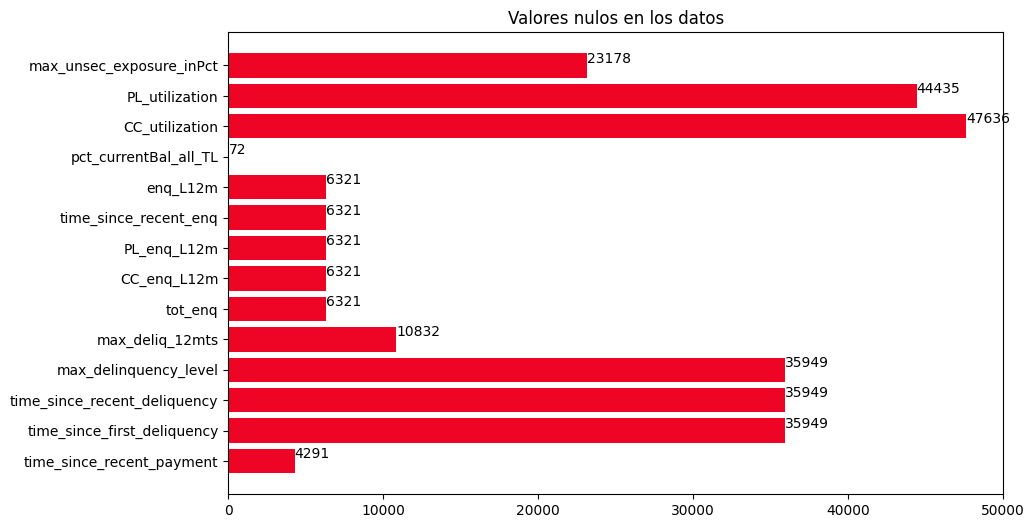

In [9]:
# Representamos mediante una gráfica de barras la cantidad de valores nulos por variable
plt.figure(figsize=(10, 6))
bars = plt.barh(y=q_nulos.index, width=q_nulos, color='#EE0424')

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='bottom')
plt.title('Valores nulos en los datos')

plt.show()

**A. CC_utilization / PL_utilization:** Ambas variables tienen un elevado numero de valores faltantes, pero es debido a que solo registra a aquellas personas que tienen una tarjeta de crédito o un préstamo personal aunque no lo hayan utilizado. Por lo tanto, se puede salvar ambas variables ya que los valores valtantes simplemente tienen una utilización de 0. Para determianar si un cliente dispone de ese producto están las variables CC_FLag y PL_Flag

In [10]:
# Se crea una función donde se realiza la comprobación en ambas variables
def print_flags(column_utilization, column_flag):
    filtered_data = external.dropna(subset=[column_utilization])
    print(filtered_data[column_flag].unique())

print_flags('CC_utilization', 'CC_Flag')
print("="*100)
print_flags('PL_utilization', 'PL_Flag')


[ True]
[ True]


In [11]:
# Reemplazar los valores NaN por 0 en ambas columnas
external['CC_utilization'] = external['CC_utilization'].fillna(0)
external['PL_utilization'] = external['PL_utilization'].fillna(0)

**B. max_delinquency_level**: Midel el nivel máximo de morosidad. Tiene un 70% de valores nulos. A su vez, disponemos de una variable similar *max_recent_level_of_deliq*, la cual expresa con una puntuación de 1-900 el nivel de morosidad mayor más reciente. Se procede a realizar un test de correlación de pearson para conocer si es rempazable

In [12]:
# Comprobamos mediante el test de pearson la correlación entre las variables
correlacion_pearson('max_delinquency_level', 'max_recent_level_of_deliq', external)

Correlación de Pearson: 0.82, P-valor: 0.0000
 La correlación es estadísticamente significativa.


La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa

In [13]:
# Se elimina la variable
external = external.drop('max_delinquency_level', axis=1)

**C. time_since_first_deliquency / time_since_recent_deliquency**: Nos encontramos con una situación similar a la primera. Los valores nulos podrían representar que nunca han incurrido en un delito de mora.

In [14]:
# Realizamos la comprobación en ambas variables
for col in ['time_since_first_deliquency', 'time_since_recent_deliquency']:
    max_delinquent = external[external[col].isnull()]['num_times_delinquent'].max()
    print(f"Máximo de 'num_times_delinquent' cuando {col} es nulo: {max_delinquent}")

Máximo de 'num_times_delinquent' cuando time_since_first_deliquency es nulo: 0
Máximo de 'num_times_delinquent' cuando time_since_recent_deliquency es nulo: 0


Afirmamos que los valores nulos son asignados a aquellos clientes que nunca han incurrido en mora.

In [15]:
def time_clasification(row):
    if pd.isna(row): 
        return 'Never'
    elif row < 10:
        return '0-9 days'
    elif row < 20:
        return '10-19 days'
    else:  # row >= 20
        return '20+ days'

# Aplicar la función a las columnas específicas
external['time_since_first_deliquency_class'] = external['time_since_first_deliquency'].apply(time_clasification)
external['time_since_recent_deliquency_class'] = external['time_since_recent_deliquency'].apply(time_clasification)


Se ha tomado la decisión de categorizar las variables para evitar la pérdida de información que nos puede proporcionar para la construcción de nuestro modelo

In [16]:
# Eliminamos las dos variables
external = external.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'], axis=1)

**D. max_unsec_exposure_inPct**: Debido a que consta con más de un 45% de valores nulos, además de valores atípicos que están fuera del rango natural. Tampoco existe forma de comprobar si los productos de que tienen contratados los clientes tienen una exposición no Garantizada. Se toma la decisión de descartar la variable.

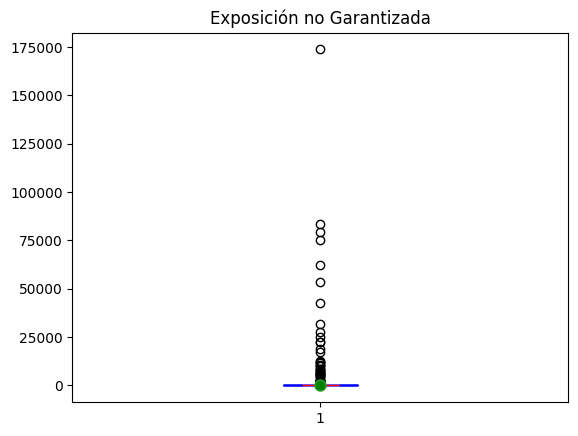

In [17]:
# Reprensentamos un boxplot para tener una visión de los valoes nulos
x = external['max_unsec_exposure_inPct'].dropna()

plt.boxplot(x, 
            notch=True, 
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'),
            showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='green', markersize=8))
plt.title('Exposición no Garantizada')
plt.show()

In [18]:
# Se elimina la variable
external = external.drop(['max_unsec_exposure_inPct'], axis=1)

**E. max_deliq_12mts**: Representa una caresterística con alrededor de un 20% de valores nulos. Las distribucion con la variable de *max_recent_level_of_deliq* son bastante similares. Por úlitmo, se comprueba la correlación entre ambas y debido a los resultados se decide eliminarla.

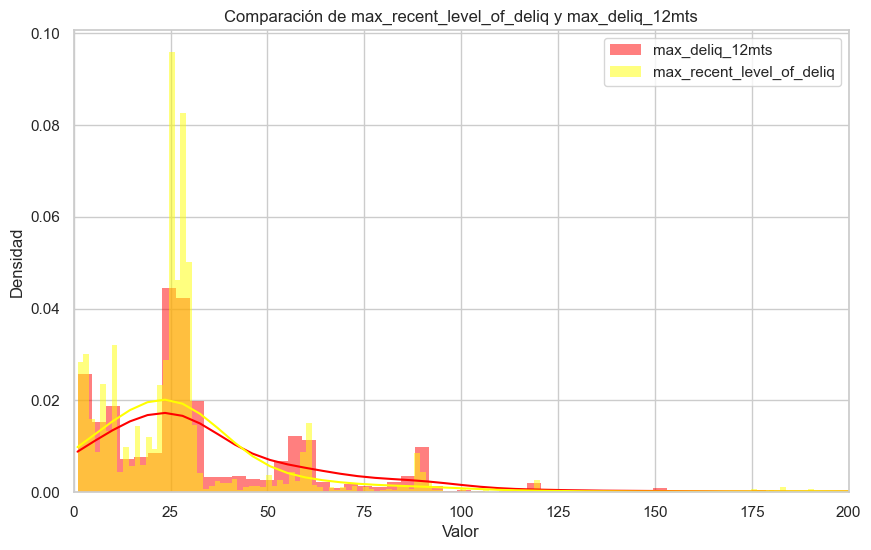

Correlación de Pearson: 0.75, P-valor: 0.0000
 La correlación es estadísticamente significativa.


In [19]:
# Representamos un histograma para conocer las distribuciones
x = external[(external['max_deliq_12mts'] > 0)].dropna(subset=['max_deliq_12mts'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.xlim(right=200)

sns.histplot(x['max_deliq_12mts'], kde=True, color='red', label='max_deliq_12mts', stat='density', linewidth=0)
sns.histplot(x['max_recent_level_of_deliq'], kde=True, color='yellow', label='max_recent_level_of_deliq', stat='density', linewidth=0)

plt.legend()
plt.title('Comparación de max_recent_level_of_deliq y max_deliq_12mts')
plt.xlabel('Valor')
plt.ylabel('Densidad')

plt.show()

# Comprobamos mediante el test de pearson la correlación entre las variables
correlacion_pearson('max_recent_level_of_deliq', 'max_deliq_12mts', x)

La correlación es moderada y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa. Como el porcentaje de valores negativos es alto se decide eliminar.

In [20]:
# Se elimina las variable max_deliq_12mts
external = external.drop(['max_deliq_12mts'], axis=1)

**F. tot_enq, CC_enq_L6m, CC_enq, CC_enq_L12m, PL_enq, enq_L12m, PL_enq_L6m, PL_enq_L12m, time_since_recent_enq, enq_L3m, enq_L6m, time_since_recent_payment, pct_currentBal_all_TL**: Todas estas vaiables representan características de cada cliente en referencia a las consultas sobre productos financieros. Sus valores están relacionados. Sustituimos todos los valores relacionados con los productos CC y PL por el valor 0 debido a que se llega a la conclusión de que son clientes que no han realizado ninguna consulta. Se sustituye por 1 la variable **tot_enq** debido a que mínimo han realizado una consulta a los productos *others*

In [21]:
# Observamos de nuevo la cantidad de valores nulos que tenemos por variable
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0].sort_values(ascending=False)

print(q_nulos)

tot_enq                      6321
CC_enq_L12m                  6321
PL_enq_L12m                  6321
enq_L12m                     6321
time_since_recent_enq        6321
time_since_recent_payment    4291
pct_currentBal_all_TL          72
dtype: int64


Confirmamos que todas las variables que representan algún aspecto relacionado con las **consultas(enq)** tienen la misma cantidad de valores nulos

In [22]:
# Creo un bucle para verificar que los valores no nulos de las variables enq tienen los mismos índices
contador = 0
while contador < 5:
    col1 = q_nulos.index[0]
    col2 = q_nulos.index[contador]
    col1_limpia = external.dropna(subset=[col1])
    col2_limpia = external.dropna(subset=[col2])
    
    ids_col1 = set(col1_limpia['PROSPECTID'])
    ids_col2 = set(col2_limpia['PROSPECTID'])
    
    if ids_col1 == ids_col2:
        print(f"Las columnas {col1} y {col2} tienen los mismos IDs después de eliminar los valores nulos.")
    else:
        print(f"Las columnas {col1} y {col2} tienen diferentes IDs después de eliminar los valores nulos.")
    print("="*100)
    contador += 1

Las columnas tot_enq y tot_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y time_since_recent_enq tienen los mismos IDs después de eliminar los valores nulos.


Confirmamos que todos los valores nulos de las variables **enq** pertenecen a las mismas observaciones

In [23]:
# Describimos las variables numéricas
external[external['tot_enq'].isnull()].describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count   6321.000000                4944.000000           6321.000000   
mean   25696.895744                 510.129450              0.876285   
std    14662.276736                 696.802393              2.922827   
min        4.000000                  10.000000              0.000000   
25%    13233.000000                  77.000000              0.000000   
50%    25369.000000                 221.000000              0.000000   
75%    38309.000000                 655.000000              0.000000   
max    51329.000000                5690.000000             39.000000   

       max_recent_level_of_deliq  num_deliq_12mts  num_times_30p_dpd  \
count                6321.000000      6321.000000        6321.000000   
mean                   11.093972         0.164373           0.575542   
std                    53.197138         0.842710           2.342243   
min                     0.000000         0.000000           0.000000   
25%                     0.000000         0.000000           0.000000   
50%                     0.000000         0.000000           0.000000   
75%                     0.000000         0.000000           0.000000   
max                   900.000000        11.000000          34.000000   

       num_times_60p_dpd  num_std_6mts  num_std_12mts  num_sub_6mts  \
count        6321.000000   6321.000000    6321.000000   6321.000000   
mean            0.411644      1.880873       4.251859      0.005062   
std             1.965723      3.686902       8.126716      0.152945   
min             0.000000      0.000000       0.000000      0.000000   
25%             0.000000      0.000000       0.000000      0.000000   
50%             0.000000      0.000000       0.000000      0.000000   
75%             0.000000      3.000000       7.000000      0.000000   
max            32.000000     60.000000     107.000000      8.000000   

       num_sub_12mts  num_dbt_12mts  num_lss_12mts  recent_level_of_deliq  \
count    6321.000000    6321.000000    6321.000000            6321.000000   
mean        0.013764       0.005062       0.000633               9.728524   
std         0.343060       0.190701       0.035573              46.954189   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.000000       0.000000       0.000000               0.000000   
50%         0.000000       0.000000       0.000000               0.000000   
75%         0.000000       0.000000       0.000000               0.000000   
max        20.000000      10.000000       2.000000             900.000000   

       tot_enq  CC_enq_L12m  PL_enq_L12m  time_since_recent_enq  enq_L12m  \
count      0.0          0.0          0.0                    0.0       0.0   
mean       NaN          NaN          NaN                    NaN       NaN   
std        NaN          NaN          NaN                    NaN       NaN   
min        NaN          NaN          NaN                    NaN       NaN   
25%        NaN          NaN          NaN                    NaN       NaN   
50%        NaN          NaN          NaN                    NaN       NaN   
75%        NaN          NaN          NaN                    NaN       NaN   
max        NaN          NaN          NaN                    NaN       NaN   

               AGE  NETMONTHLYINCOME  Time_With_Curr_Empr  \
count  6321.000000       6321.000000          6321.000000   
mean     34.434267      23499.518431           115.568423   
std       9.011868      14917.611391            78.851078   
min      21.000000          0.000000             5.000000   
25%      27.000000      15000.000000            63.000000   
50%      33.000000      20000.000000           101.000000   
75%      40.000000      28000.000000           146.000000   
max      77.000000     520000.000000           936.000000   

       pct_of_active_TLs_ever  pct_opened_TLs_L6m_of_L12m  \
count             6321.000000                 6321.000000   
mean       

In [24]:
# Describimos las variables objeto
external[external['tot_enq'].isnull()].describe(include='object')

MARITALSTATUS EDUCATION GENDER last_prod_enq2 first_prod_enq2  \
count           6321      6321   6321           6321            6321   
unique             2         7      2              1               1   
top          Married      12TH      M         others          others   
freq            4857      1897   5319           6321            6321   

       Approved_Flag time_since_first_deliquency_class  \
count           6321                              6321   
unique             4                                 4   
top               P2                             Never   
freq            4967                              5158   

       time_since_recent_deliquency_class  
count                                6321  
unique                                  4  
top                                 Never  
freq                                 5158

Observamos que las variables que representan el porcentaje de consultas tienen un **valor de 0**. Y que los últimas consultas que realizó fueron a los productos **others**.

In [25]:
# Bucle para sustituir los valores nulos de las variables enq por 0
for col in ["CC_enq_L12m", "enq_L12m", "PL_enq_L12m"]:
    external[col] = external[col].fillna(0)

# Sustituimos los valores nulos de 'time_since_recent_enq' por la media de las solicitudes de productos 'others'
mean_others = external.loc[external["last_prod_enq2"] == "others", "time_since_recent_enq"].mean()
external["time_since_recent_enq"] = external["time_since_recent_enq"].fillna(mean_others)

# Bucle para sustituir los valores de 'tot_enq' por 1
external["tot_enq"] = external["tot_enq"].fillna(1)

**G. time_since_recent_payment:** Se revisa que algunos tienen pagos registrados en los últimos 6 o, 12 o más meses. Se decide hacer una sustitución por los valores nulos en función de la franja de pago que tengan registrados.

In [26]:
# Revisamos las características estadísticasd de las variables
external[external['time_since_recent_payment'].isnull()].describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count   4291.000000                        0.0           4291.000000   
mean   25837.757166                        NaN              0.602890   
std    14828.647401                        NaN              2.456774   
min        4.000000                        NaN              0.000000   
25%    13010.000000                        NaN              0.000000   
50%    25562.000000                        NaN              0.000000   
75%    38796.500000                        NaN              0.000000   
max    51329.000000                        NaN             32.000000   

       max_recent_level_of_deliq  num_deliq_12mts  num_times_30p_dpd  \
count                4291.000000      4291.000000        4291.000000   
mean                    7.144955         0.147751           0.389420   
std                    42.907087         0.787775           1.966045   
min                     0.000000         0.000000           0.000000   
25%                     0.000000         0.000000           0.000000   
50%                     0.000000         0.000000           0.000000   
75%                     0.000000         0.000000           0.000000   
max                   900.000000        11.000000          31.000000   

       num_times_60p_dpd  num_std_6mts  num_std_12mts  num_sub_6mts  \
count        4291.000000   4291.000000    4291.000000        4291.0   
mean            0.271498      0.980890       2.069914           0.0   
std             1.611490      2.280577       5.015478           0.0   
min             0.000000      0.000000       0.000000           0.0   
25%             0.000000      0.000000       0.000000           0.0   
50%             0.000000      0.000000       0.000000           0.0   
75%             0.000000      0.000000       1.000000           0.0   
max            31.000000     28.000000      75.000000           0.0   

       num_sub_12mts  num_dbt_12mts  num_lss_12mts  recent_level_of_deliq  \
count    4291.000000    4291.000000         4291.0            4291.000000   
mean        0.000699       0.002330            0.0               6.379632   
std         0.026435       0.152658            0.0              38.157301   
min         0.000000       0.000000            0.0               0.000000   
25%         0.000000       0.000000            0.0               0.000000   
50%         0.000000       0.000000            0.0               0.000000   
75%         0.000000       0.000000            0.0               0.000000   
max         1.000000      10.000000            0.0             900.000000   

           tot_enq  CC_enq_L12m  PL_enq_L12m  time_since_recent_enq  \
count  4291.000000  4291.000000  4291.000000            4291.000000   
mean      2.304824     0.097646     0.306921             267.262525   
std       2.621913     0.522698     0.993544             335.281126   
min       1.000000     0.000000     0.000000               0.000000   
25%       1.000000     0.000000     0.000000              12.000000   
50%       1.000000     0.000000     0.000000             141.000000   
75%       3.000000     0.000000     0.000000             430.578429   
max      51.000000    14.000000    17.000000            3398.000000   

          enq_L12m          AGE  NETMONTHLYINCOME  Time_With_Curr_Empr  \
count  4291.000000  4291.000000       4291.000000          4291.000000   
mean      1.545094    32.634817      24669.508506           107.257283   
std       2.489513     8.931737      17072.921130            76.288717   
min       0.000000    21.000000          0.000000             3.000000   
25%       0.000000    25.000000      16000.000000            59.000000   
50%       1.000000    31.000000      22000.000000            87.000000   
75%       2.000000    38.000000      30000.000000           130.000000   
max      50.000000    77.000000     554640.000000           839.000000   

       pct_of_active_TLs_ever  pct_opened_TLs_L6m_of_L12m  \
count    

In [27]:
# Creamos un script para sustituir los valores nulos
x = external[external['time_since_recent_payment'].isnull()]

media_pago6 = external[external['time_since_recent_payment'] <= 180]['time_since_recent_payment'].mean()
mediana_pago12 = external[external['time_since_recent_payment'] > 180]['time_since_recent_payment'].median()

# Evitar errores con valores nulos
q6 = x['num_std_6mts'].fillna(0) + x['num_sub_6mts'].fillna(0)
q12 = x['num_std_12mts'].fillna(0) + x['num_sub_12mts'].fillna(0)

# Si ha realizado un pago en los últimos 6 meses, asignamos la media
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q6 > 0), 
    'time_since_recent_payment'
] = round(media_pago6, 0)

# Si ha realizado un pago entre 6 y 12 meses, asignamos la mediana (para evitar outliers)
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q12 > 0), 
    'time_since_recent_payment'
] = round(mediana_pago12, 0)

# Para el resto, si no se han registrado pagos, se asigna un valor basado en la distribución
# Muestreo aleatorio de los valores existentes (no nulos) de 'time_since_recent_payment'
external.loc[
    external['time_since_recent_payment'].isnull(), 
    'time_since_recent_payment'
] = np.random.choice(external['time_since_recent_payment'].dropna(), size=external['time_since_recent_payment'].isnull().sum())

In [28]:
# Se eliminan el resto de variables a corto plazo
external = external.drop(['num_std_6mts', 'num_sub_6mts'], axis=1)

**H. pct_currentBal_all_TL:** a esta variable le asignaremos la media de de sus valores evitando los valores atípicos que los manejaremos más adelante

In [29]:
# Creamos la constante  y la asignamos a los valores nulos
media_ins = external.loc[external['pct_currentBal_all_TL'] <= 1, 'pct_currentBal_all_TL'].mean()
external['pct_currentBal_all_TL'] = external['pct_currentBal_all_TL'].fillna(round(media_ins, 2))


### 2.3. Outliers

#### 2.3.1. Descripción Outliers

In [30]:
# Cambiamos todos aquellos valores float sin decimales a tipo int
float_columns = external.select_dtypes(include=['float']).columns
columns_to_convert = [col for col in float_columns if (external[col] % 1 == 0).all()]
external[columns_to_convert] = external[columns_to_convert].astype(int)
print(f"Columnas convertidas a int: {columns_to_convert}")

Columnas convertidas a int: ['time_since_recent_payment', 'tot_enq', 'CC_enq_L12m', 'PL_enq_L12m', 'enq_L12m', 'num_times_dpd']


In [31]:
# Creamos una variable con las variables numéricas
numeric_features = external.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID'])

In [32]:
# Creamos un diccionario para almacenar los outliers
outlier_count = {}

# Contamos los outliers
for column in numeric_features:
    Q1 = external[column].quantile(0.25)
    Q3 = external[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = external[(external[column] < lower_bound) | (external[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]

# Mostramos el recuento
print("Recuento de outliers por feature:")
for column, count in outlier_count.items():
    if count != 0:
        print(f"{column}: {count}")
    else:
        pass

Recuento de outliers por feature:
time_since_recent_payment: 8347
num_times_delinquent: 8457
max_recent_level_of_deliq: 8495
num_deliq_12mts: 8428
num_times_30p_dpd: 7991
num_times_60p_dpd: 4889
num_std_12mts: 9443
num_sub_12mts: 158
num_dbt_12mts: 40
num_lss_12mts: 25
recent_level_of_deliq: 10321
tot_enq: 3358
CC_enq_L12m: 5452
PL_enq_L12m: 3830
time_since_recent_enq: 2785
enq_L12m: 4097
AGE: 582
NETMONTHLYINCOME: 3106
Time_With_Curr_Empr: 4154
pct_currentBal_all_TL: 49
CC_utilization: 3128
PL_utilization: 6723
pct_PL_enq_L6m_of_L12m: 11100
pct_CC_enq_L6m_of_L12m: 3935
Credit_Score: 2106
num_times_dpd: 5381


In [33]:
# # Rango de valores para n_neighbors
# neighbors_range = range(400,1101, 100)
# outlier_counts = []

# # Evaluar LOF para diferentes valores de n_neighbors
# for n in neighbors_range:
#     lof = LocalOutlierFactor(n_neighbors=n)
#     y_pred = lof.fit_predict(external[numeric_features])
#     outliers = np.where(y_pred == -1)[0]
#     outlier_counts.append(len(outliers))

# # Graficar el número de outliers detectados en función de n_neighbors
# plt.figure(figsize=(10, 6))
# plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
# plt.title('Número de Outliers Detectados vs. n_neighbors')
# plt.xlabel('n_neighbors')
# plt.ylabel('Número de Outliers')
# plt.grid(True)
# plt.show()

# # Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
# outliers_dict = {}

# # Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
# for n, count in zip(neighbors_range, outlier_counts):
#     print(f"n_neighbors={n} -> Número de outliers: {count}")
#     outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# # Encontrar el valor de n_neighbors donde el count es máximo
# max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
# max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# # Imprimir el resultado
# print(f"El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}")

# # Crear el modelo LOF con el valor de n_neighbors donde count es máximo
# lof = LocalOutlierFactor(n_neighbors=max_n)

# # Ajustar el modelo y predecir
# y_pred = lof.fit_predict(external[numeric_features])

# # Obtener los índices de los outliers
# outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# # Filtrar los valores atípicos en el DataFrame
# outlier_values = external.iloc[outliers]

# outlier_values.describe()


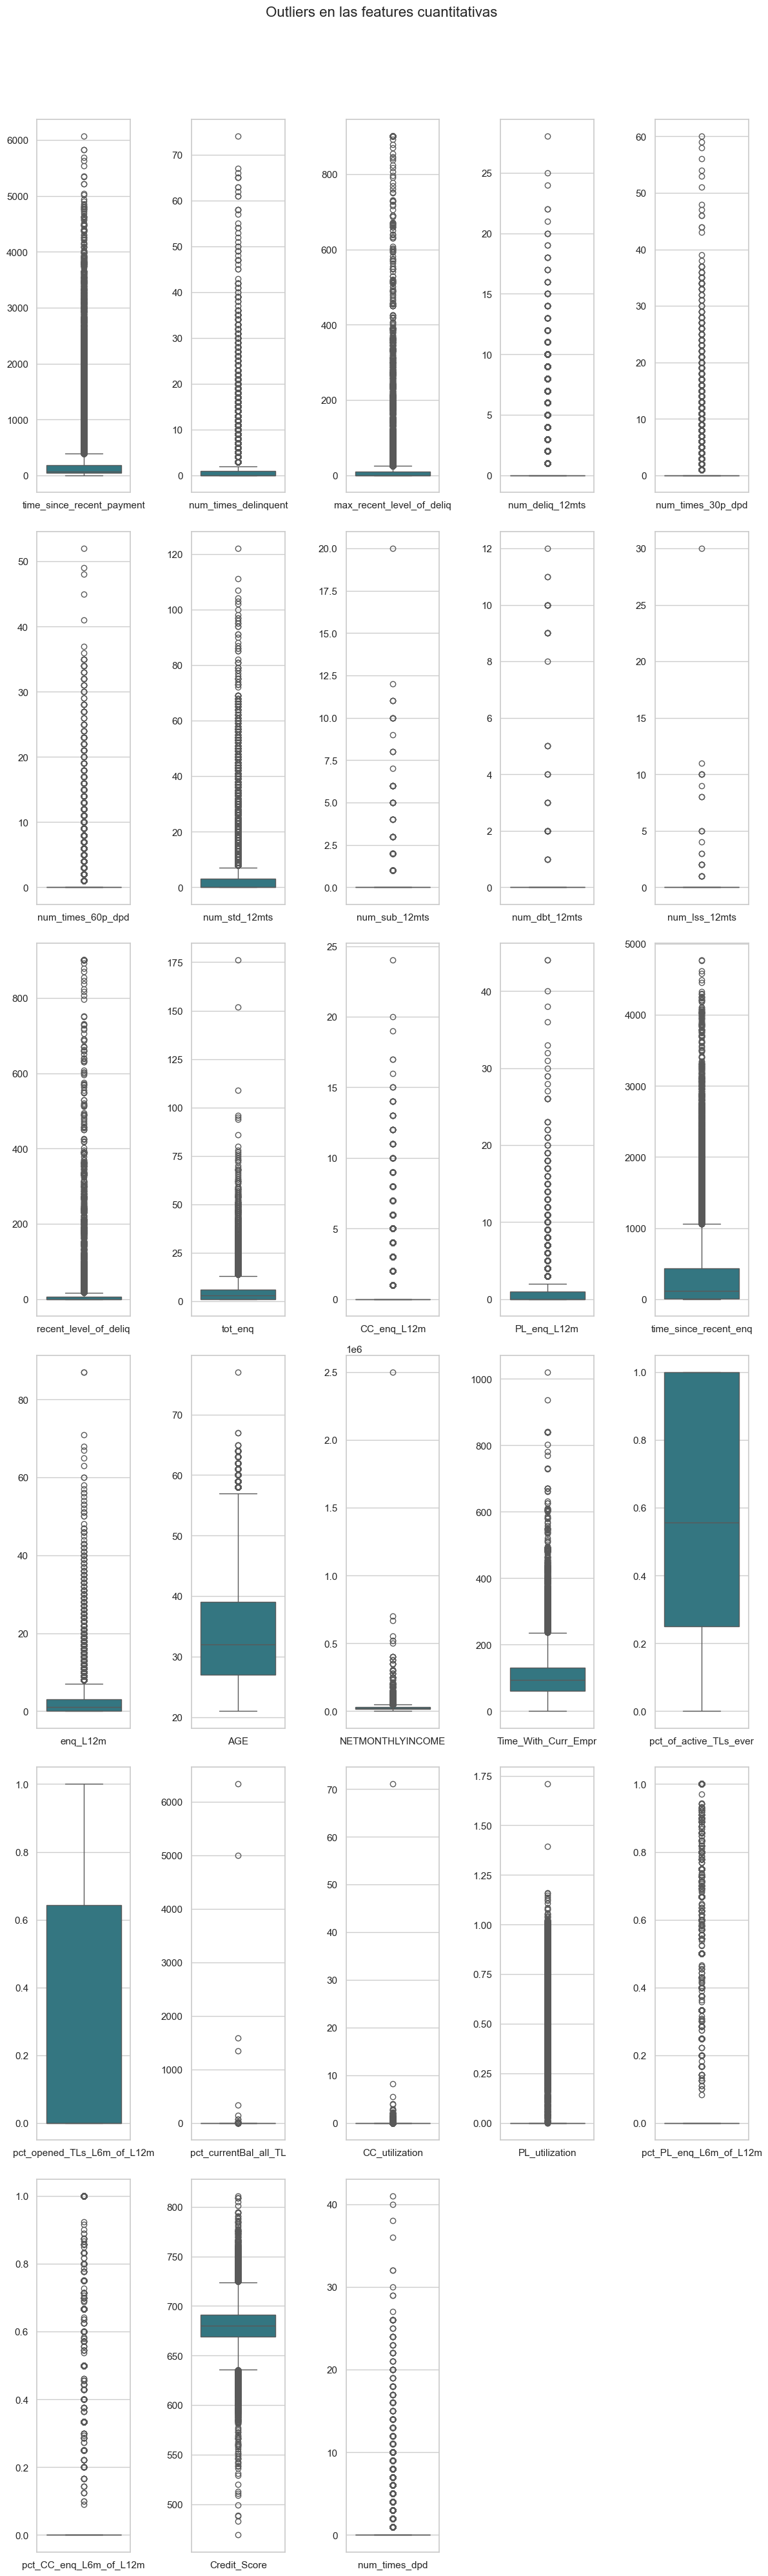

In [34]:
# Estilo
sns.set_palette("Set2")

color_viridis = sns.color_palette("viridis")[2]
plt.figure(figsize=(4.0 * 3, 4.0 * 15))


for i, column in enumerate(numeric_features):
    plt.subplot(9, 5, i + 1)
    sns.boxplot(data=external[[column]], color = color_viridis) 

# Show
plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Vemos que hay una alta proporción de outliers por lo que procedemos con su tratamiento

#### 2.3.2. Imputación de Outliers

Las variables **pct_currentBal_all_TL, CC_utilization y PL_utilization** deberían estar en un rango de 0 a 1 debido a que son porcentajes. Dicho esto, se procede a asignar el valor a la alta para tales valores atípicos.

In [35]:
# Crear una máscara para las filas donde la condición se cumple y asignarle el valor superior
pct_cols = ['pct_currentBal_all_TL', 'CC_utilization', 'PL_utilization']
for i in pct_cols:
    mask = external[i] > 1
    external.loc[mask, i] = 1

La variable **Time_With_Curr_Empr** está representada en meses. Por lo que es imposible que haya valores tan altos para edades tan bajas, lo que me hace llegar a la conclusión que esos valores están en días en vez de en meses. Realizaremos una operación con vectores y su correspondiente mascara para realizar un proceso de filtrado y reasignación de valores. Todos aquellos que tengan una cantidad de tiempo en su actual empleo superior a su tiempo activo se le imputará el valor que tienen formateado en meses.

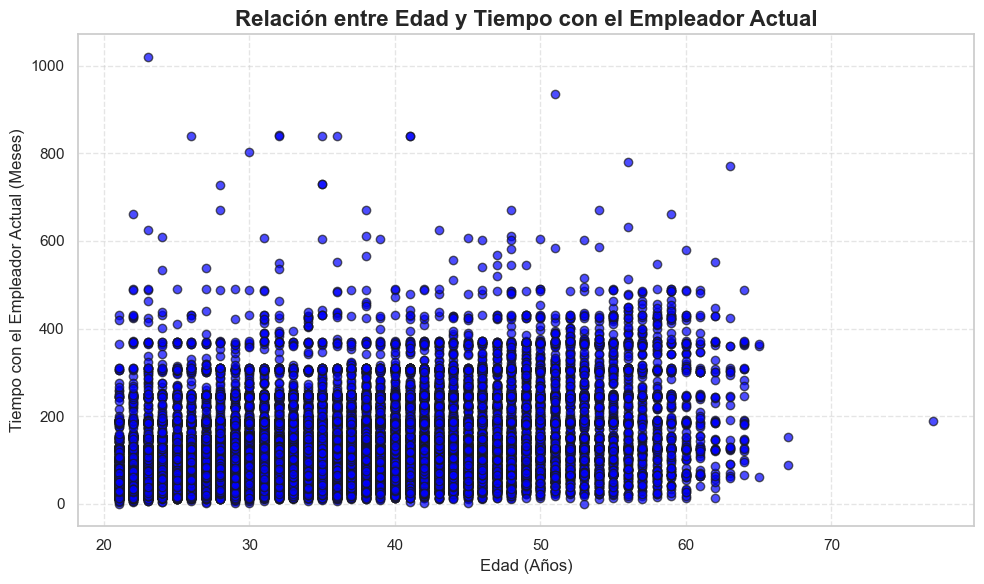

In [36]:
# Representamos la relación entre la edad y el tiempo que llevan en el actual empleo
plt.figure(figsize=(10, 6))
plt.scatter(data=external, x='AGE', y='Time_With_Curr_Empr', alpha=0.7, c='blue', edgecolors='k')
plt.title('Relación entre Edad y Tiempo con el Empleador Actual', fontsize=16, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [37]:
# Para calcular el tiempo activo
TIME_ACTIVE = external['AGE'] - 10
CURR_EMPL_YEAR = external['Time_With_Curr_Empr'] / 12

# Crear una máscara para las filas donde la condición se cumple
mask = CURR_EMPL_YEAR > TIME_ACTIVE

# Actualizar las filas específicas de forma vectorizada y redondear a 0 decimales
external.loc[mask, 'Time_With_Curr_Empr'] = (external.loc[mask, 'Time_With_Curr_Empr'] / 12).round(0).astype(int)

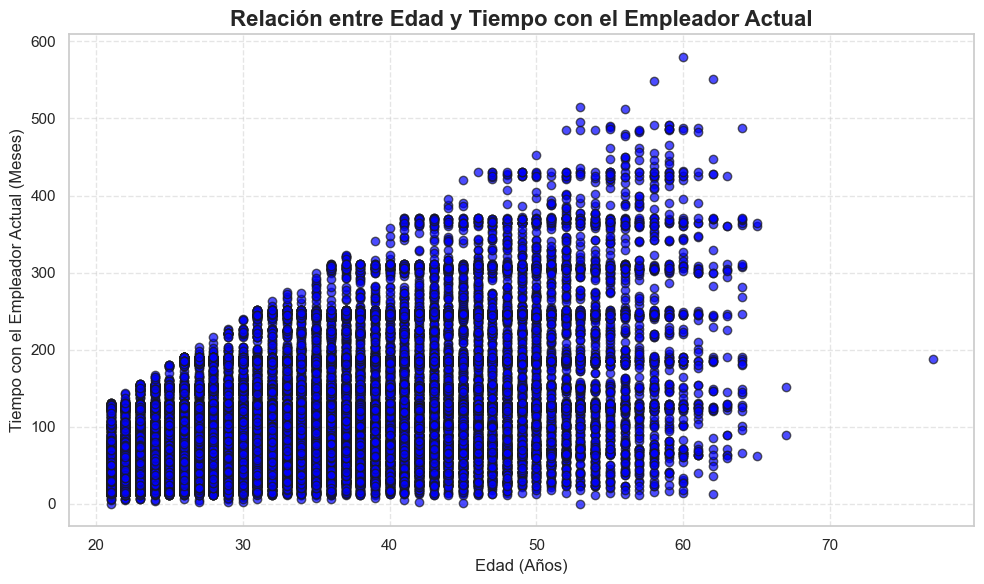

In [38]:
# Volvemos a representar para ver el cambio lógico de la representación
plt.figure(figsize=(10, 6))
plt.scatter(data=external, x='AGE', y='Time_With_Curr_Empr', alpha=0.7, c='blue', edgecolors='k')
plt.title('Relación entre Edad y Tiempo con el Empleador Actual', fontsize=16, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2.3.3. Transformación de las distribuciones

Para transformar las distribuciones de las variables, tomaremos la siguiente estrategia. Primero, identificamos las variables con una asimetría positiva significativa, definida por un umbral de asimetría mayor a 1. Para estas variables, aplicamos una transformación logarítmica, que comprime la escala de los valores grandes, reduce la cola derecha de la distribución y suaviza las variaciones extremas, mejorando la normalidad de las variables y su adecuación para modelos predictivos que asumen distribuciones simétricas. A continuación, las variables que tienen una distribución discreta serán escaladas utilizando un escalado robusto mediante RobustScaler, lo que permite minimizar el impacto de los valores atípicos manteniendo las relaciones entre los datos. Finalmente, las variables continuas serán transformadas mediante el método Box-Cox, el cual ajusta la forma de la distribución a una más normal, optimizando la precisión de los modelos estadísticos y la eficacia del análisis predictivo. Estas transformaciones combinadas preparan el conjunto de datos para análisis avanzados con mejores resultados.

In [ ]:
# Inicializar listas para variables transformadas
log_transformed = []
robust_scaled = []
boxcox_transformed = []

# Crear una copia del DataFrame original
prueba = external.copy()

# Iterar sobre las características numéricas
for col in numeric_features:
    series = prueba[col]
        
    # Si la asimetría es mayor que 1, aplicar transformación logarítmica
    if skew(series) > 1.5:
        prueba[col] = np.log1p(series)
        log_transformed.append(col)
    
    # Si es un entero, aplicar escalado robusto
    elif np.issubdtype(series.dtype, np.integer):
        r_scaler = RobustScaler()
        prueba[col] = r_scaler.fit_transform(series.values.reshape(-1, 1)).flatten()
        robust_scaled.append(col)
    
    # Si es un flotante, aplicar transformación Box-Cox
    else:
        
        if series.min() <= 0:
            series = series + 1
        prueba[col], _ = boxcox(series)
        boxcox_transformed.append(col)

# Imprimir las listas de variables transformadas
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con RobustScaler: {robust_scaled}')
print(f'Variables transformadas con Box-Cox: {boxcox_transformed}')


Variables transformadas con logaritmo: ['time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub_12mts', 'num_dbt_12mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'NETMONTHLYINCOME', 'CC_utilization', 'PL_utilization', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m', 'num_times_dpd']
Variables transformadas con RobustScaler: ['AGE', 'Time_With_Curr_Empr', 'Credit_Score']
Variables transformadas con Box-Cox: ['pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL']


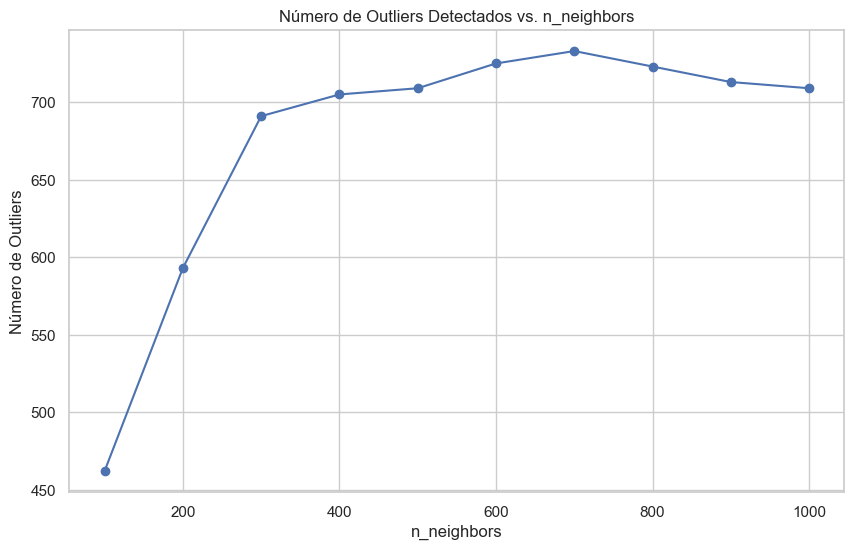

n_neighbors=100 -> Número de outliers: 462
n_neighbors=200 -> Número de outliers: 593
n_neighbors=300 -> Número de outliers: 691
n_neighbors=400 -> Número de outliers: 705
n_neighbors=500 -> Número de outliers: 709
n_neighbors=600 -> Número de outliers: 725
n_neighbors=700 -> Número de outliers: 733
n_neighbors=800 -> Número de outliers: 723
n_neighbors=900 -> Número de outliers: 713
n_neighbors=1000 -> Número de outliers: 709
El valor de n_neighbors con el máximo número de outliers (733) es: 700


In [40]:
# Rango de valores para n_neighbors
neighbors_range = range(100,1001, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(prueba[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f"n_neighbors={n} -> Número de outliers: {count}")
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f"El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}")

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(prueba[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = prueba.iloc[outliers]

In [41]:
# Reemplazar valores outliers por la mediana de las filas normales
for column in numeric_features:
    # Calcular la mediana de los valores normales
    median_value = prueba.loc[y_pred == 1, column].median()
    
    # Reemplazar los valores de los outliers con la mediana
    prueba.loc[outliers, column] = median_value

# Verificar los valores tras la imputación
prueba.describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count  51336.000000               51336.000000          51336.000000   
mean   25668.500000                   4.694979              0.442016   
std    14819.571046                   1.097775              0.797338   
min        1.000000                   1.609438              0.000000   
25%    12834.750000                   3.988984              0.000000   
50%    25668.500000                   4.304065              0.000000   
75%    38502.250000                   5.214936              0.693147   
max    51336.000000                   8.710455              4.317488   

       max_recent_level_of_deliq  num_deliq_12mts  num_times_30p_dpd  \
count               51336.000000     51336.000000       51336.000000   
mean                    0.956083         0.192055           0.218888   
std                     1.576756         0.489086           0.586171   
min                     0.000000         0.000000           0.000000   
25%                     0.000000         0.000000           0.000000   
50%                     0.000000         0.000000           0.000000   
75%                     2.302585         0.000000           0.000000   
max                     6.803505         3.367296           4.110874   

       num_times_60p_dpd  num_std_12mts  num_sub_12mts  num_dbt_12mts  \
count       51336.000000   51336.000000   51336.000000   51336.000000   
mean            0.129925       0.658094       0.003163       0.000767   
std             0.459554       1.086223       0.065471       0.035922   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.000000       0.000000       0.000000   
50%             0.000000       0.000000       0.000000       0.000000   
75%             0.000000       1.386294       0.000000       0.000000   
max             3.970292       4.718499       2.564949       2.564949   

       num_lss_12mts  recent_level_of_deliq       tot_enq   CC_enq_L12m  \
count   51336.000000           51336.000000  51336.000000  51336.000000   
mean        0.000439               0.905962      1.447070      0.104414   
std         0.026488               1.504459      0.702019      0.338603   
min         0.000000               0.000000      0.693147      0.000000   
25%         0.000000               0.000000      0.693147      0.000000   
50%         0.000000               0.000000      1.386294      0.000000   
75%         0.000000               2.079442      1.945910      0.000000   
max         2.397895               6.803505      4.700480      2.995732   

        PL_enq_L12m  time_since_recent_enq      enq_L12m           AGE  \
count  51336.000000           51336.000000  51336.000000  51336.000000   
mean       0.299001               4.305485      0.922874      0.140387   
std        0.528299               1.988916      0.792395      0.725341   
min        0.000000               0.000000      0.000000     -0.916667   
25%        0.000000               2.564949      0.000000     -0.416667   
50%        0.000000               4.753590      0.693147      0.000000   
75%        0.693147               6.067449      1.386294      0.583333   
max        3.465736               8.468213      4.158883      2.916667   

       NETMONTHLYINCOME  Time_With_Curr_Empr  pct_of_active_TLs_ever  \
count      51336.000000         51336.000000            51336.000000   
mean          10.067530             0.241582                0.636204   
std            0.449030             0.942794                0.426016   
min            7.003974            -1.194444                0.000000   
25%            9.798183            -0.388889                0.258585   
50%           10.056252             0.000000                0.602875   
75%           10.308986             0.597222                1.120489   
max           13.161586             5.958333                1.120489   

       pct_opened_TLs_L6m_of_L12m  pct_currentBal_all_TL  CC_

Estas técnicas han mejorado la simetría de las distribuciones, reducido la influencia de outliers y unificado las escalas, lo que debería contribuir a un mejor rendimiento de los modelos predictivos.


Este enfoque se aplicará después del análisis descriptivo para evaluar el impacto de las transformaciones sobre la calidad del modelo, comparando su desempeño con y sin la presencia de outliers. Esto permitirá determinar la efectividad de las transformaciones y seleccionar la mejor estrategia de preprocesamiento para el conjunto de datos.

In [42]:
# Aplicamos normalización excalando los datos en un rango de 0 a 1
scaler = MinMaxScaler()
prueba[numeric_features] = scaler.fit_transform(prueba[numeric_features])

## 3. Análisis Univariante

### 3.1. Variables categóricas

In [43]:
cat_features = external.select_dtypes(include=['bool', 'object']).columns.to_list().copy()
cat_features

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'CC_Flag',
 'PL_Flag',
 'HL_Flag',
 'GL_Flag',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag',
 'time_since_first_deliquency_class',
 'time_since_recent_deliquency_class']

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display, Markdown

def Count_Cat(df, cat_feat):
    # Verificación inicial
    if cat_feat not in df.columns:
        raise ValueError(f"La columna '{cat_feat}' no existe en el DataFrame.")

    # Valores únicos
    unique_values = df[cat_feat].nunique()
    
    # Encabezado
    print("\n\n")
    formatted_text = f"**{cat_feat.upper()}**"
    try:
        display(Markdown(formatted_text)) 
    except:
        print(formatted_text)
    
    print(f"El número de categorías distintas en la variable '{cat_feat}' es {unique_values}.")

    # Datos
    feat_count = df[cat_feat].value_counts()
    feat_perc = (feat_count / len(df)) * 100
    feat_res = pd.DataFrame({'Recuento': feat_count, '%': round(feat_perc, 2)})\
               .sort_values(by='Recuento', ascending=False).head(30)

    # Configuración de estilo
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(18, 10))
    spec = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1])

    # Gráfico de barras
    ax0 = plt.subplot(spec[0])
    sns.barplot(y='%', x=feat_res.index, data=feat_res, palette="viridis", ax=ax0, hue=feat_res.index)

    ax0.set_title(f'Porcentaje de instancias por {cat_feat}', fontsize=14)
    ax0.set_ylabel('% de instancias', fontsize=14)
    ax0.set_xlabel(cat_feat, fontsize=14)

    # Configurar correctamente los ticks antes de asignar etiquetas
    ax0.set_xticks(range(len(feat_res.index)))  # Fijar los ticks en función de la cantidad de categorías
    ax0.set_xticklabels(feat_res.index, rotation=45, ha='right')

    # Tabla
    ax1 = plt.subplot(spec[1])
    ax1.axis('off')
    cell_text = feat_res.reset_index().values.tolist()
    col_labels = ['Categoría', 'Recuento', '%']
    table = ax1.table(cellText=cell_text, colLabels=col_labels, loc='center', cellLoc='center', colColours=['#f0f0f0'] * 3)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    # Mostrar visualización
    plt.tight_layout()
    plt.show()


**MARITALSTATUS**

El número de categorías distintas en la variable 'MARITALSTATUS' es 2.


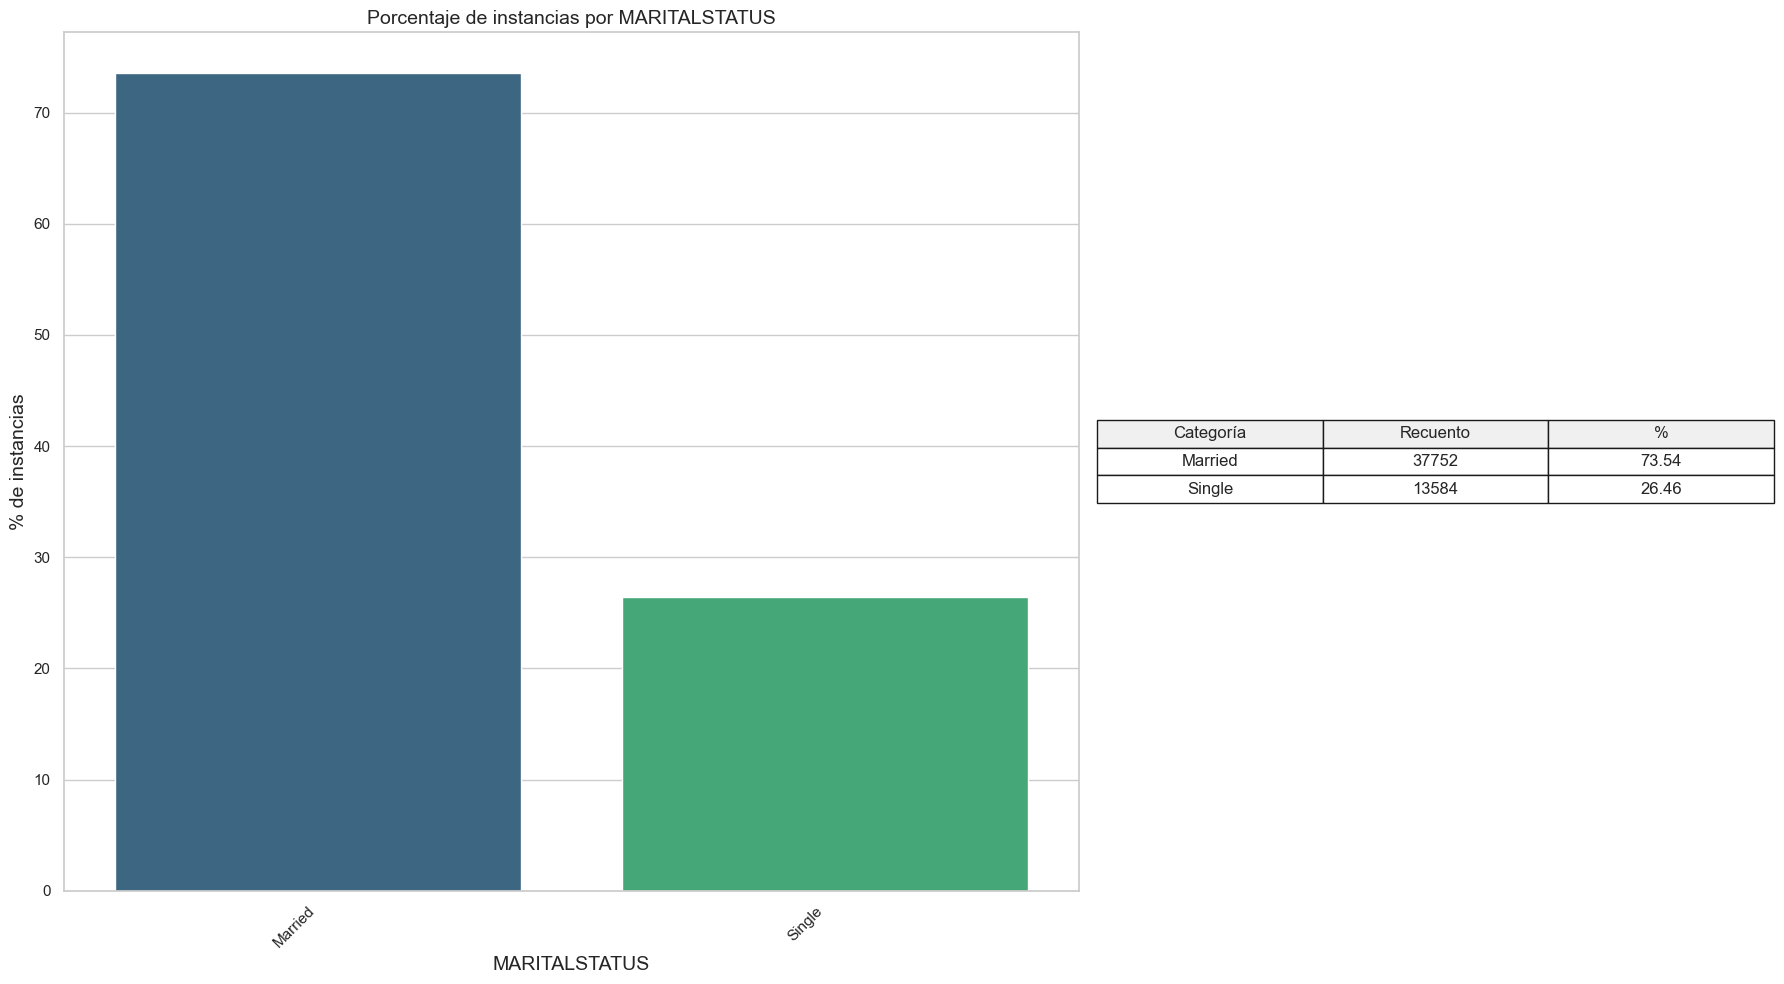

**EDUCATION**

El número de categorías distintas en la variable 'EDUCATION' es 7.


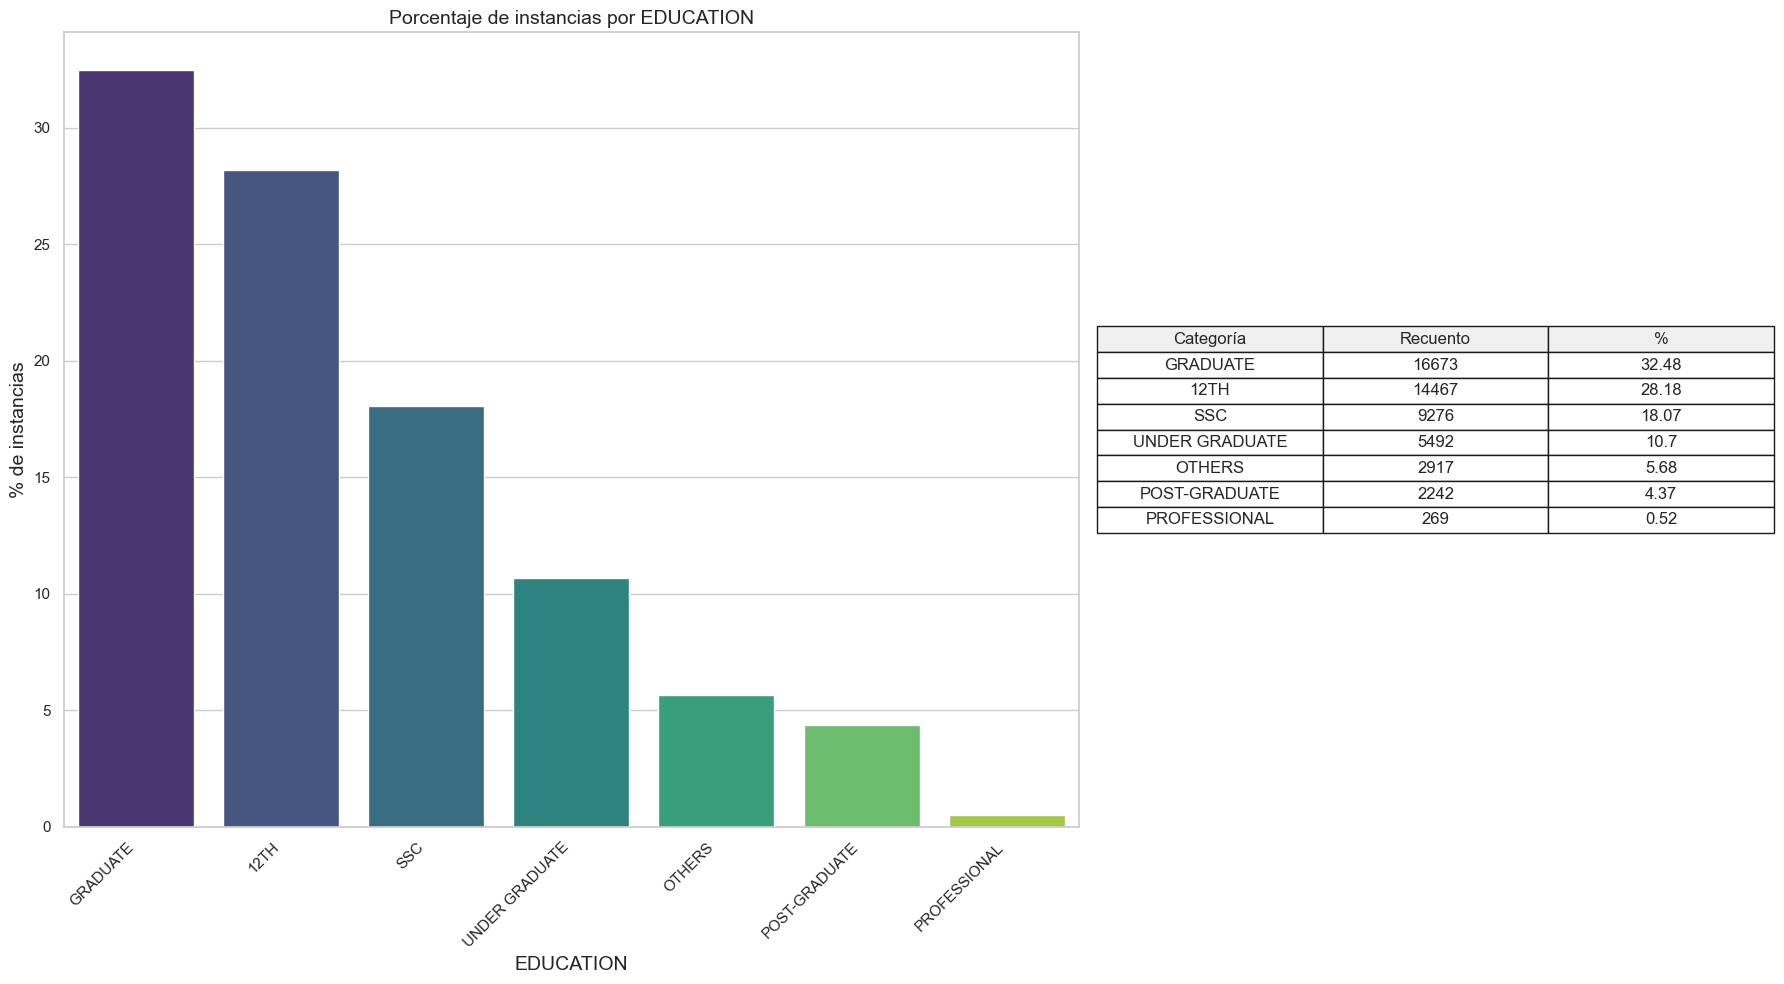

**GENDER**

El número de categorías distintas en la variable 'GENDER' es 2.


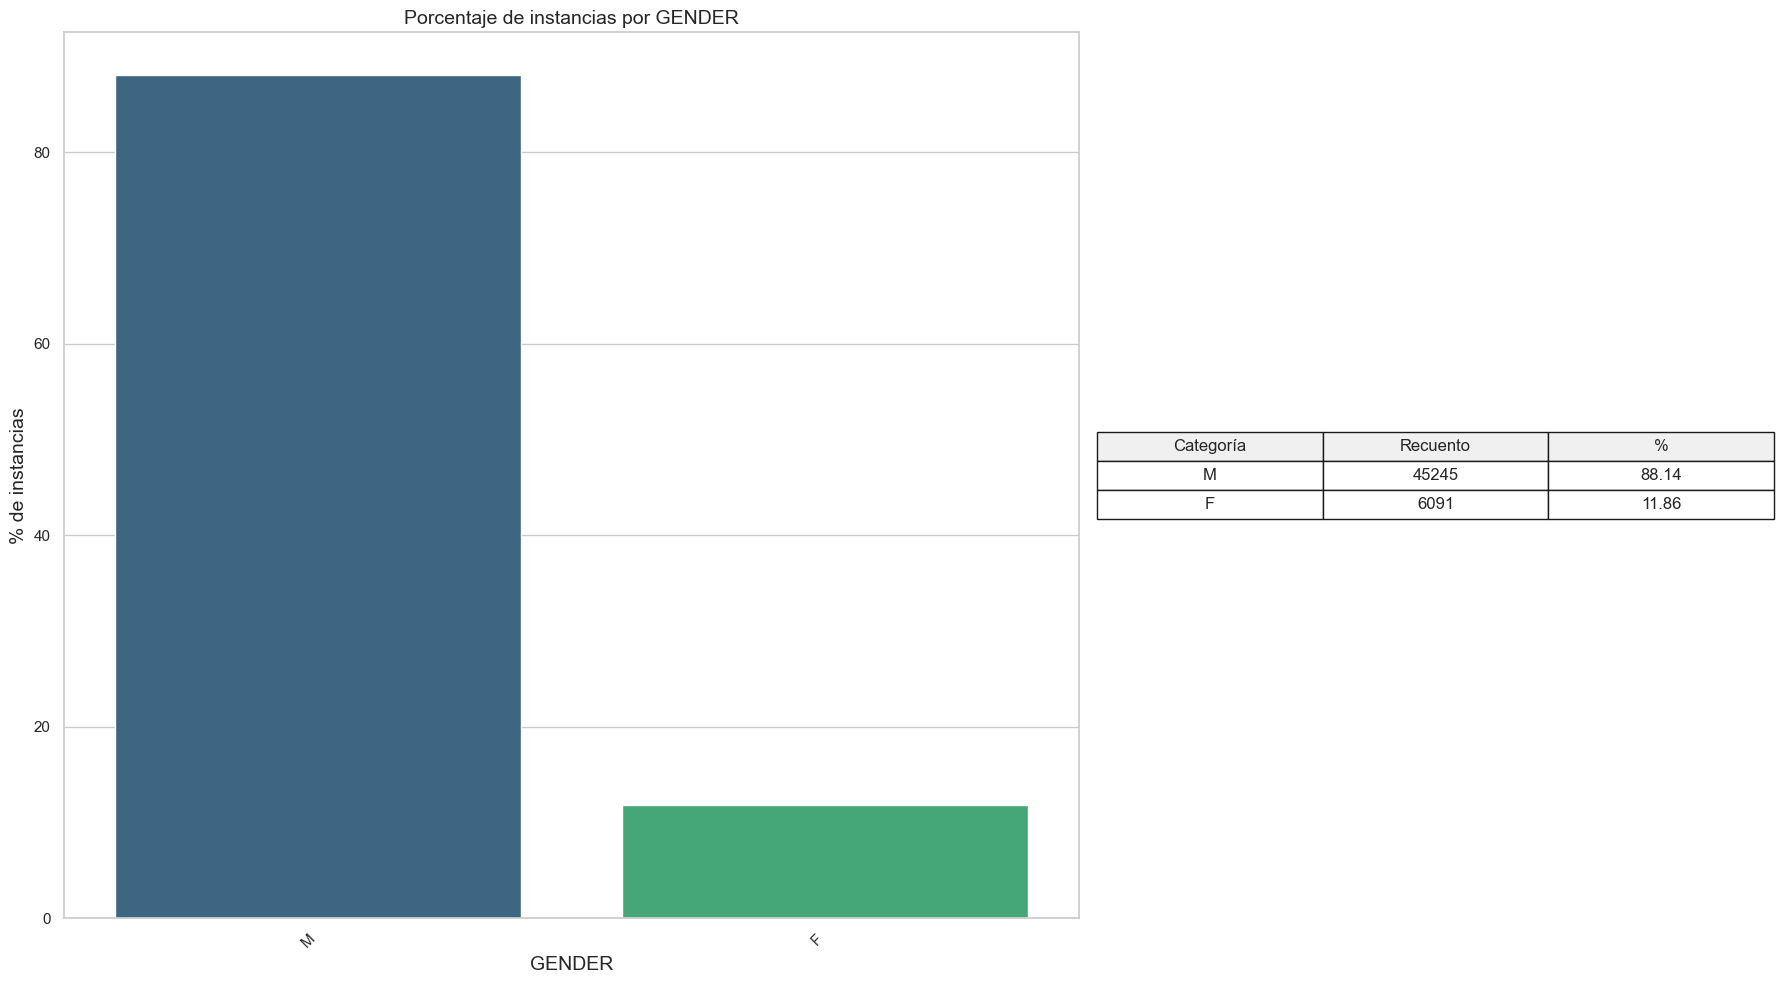

**CC_FLAG**

El número de categorías distintas en la variable 'CC_Flag' es 2.


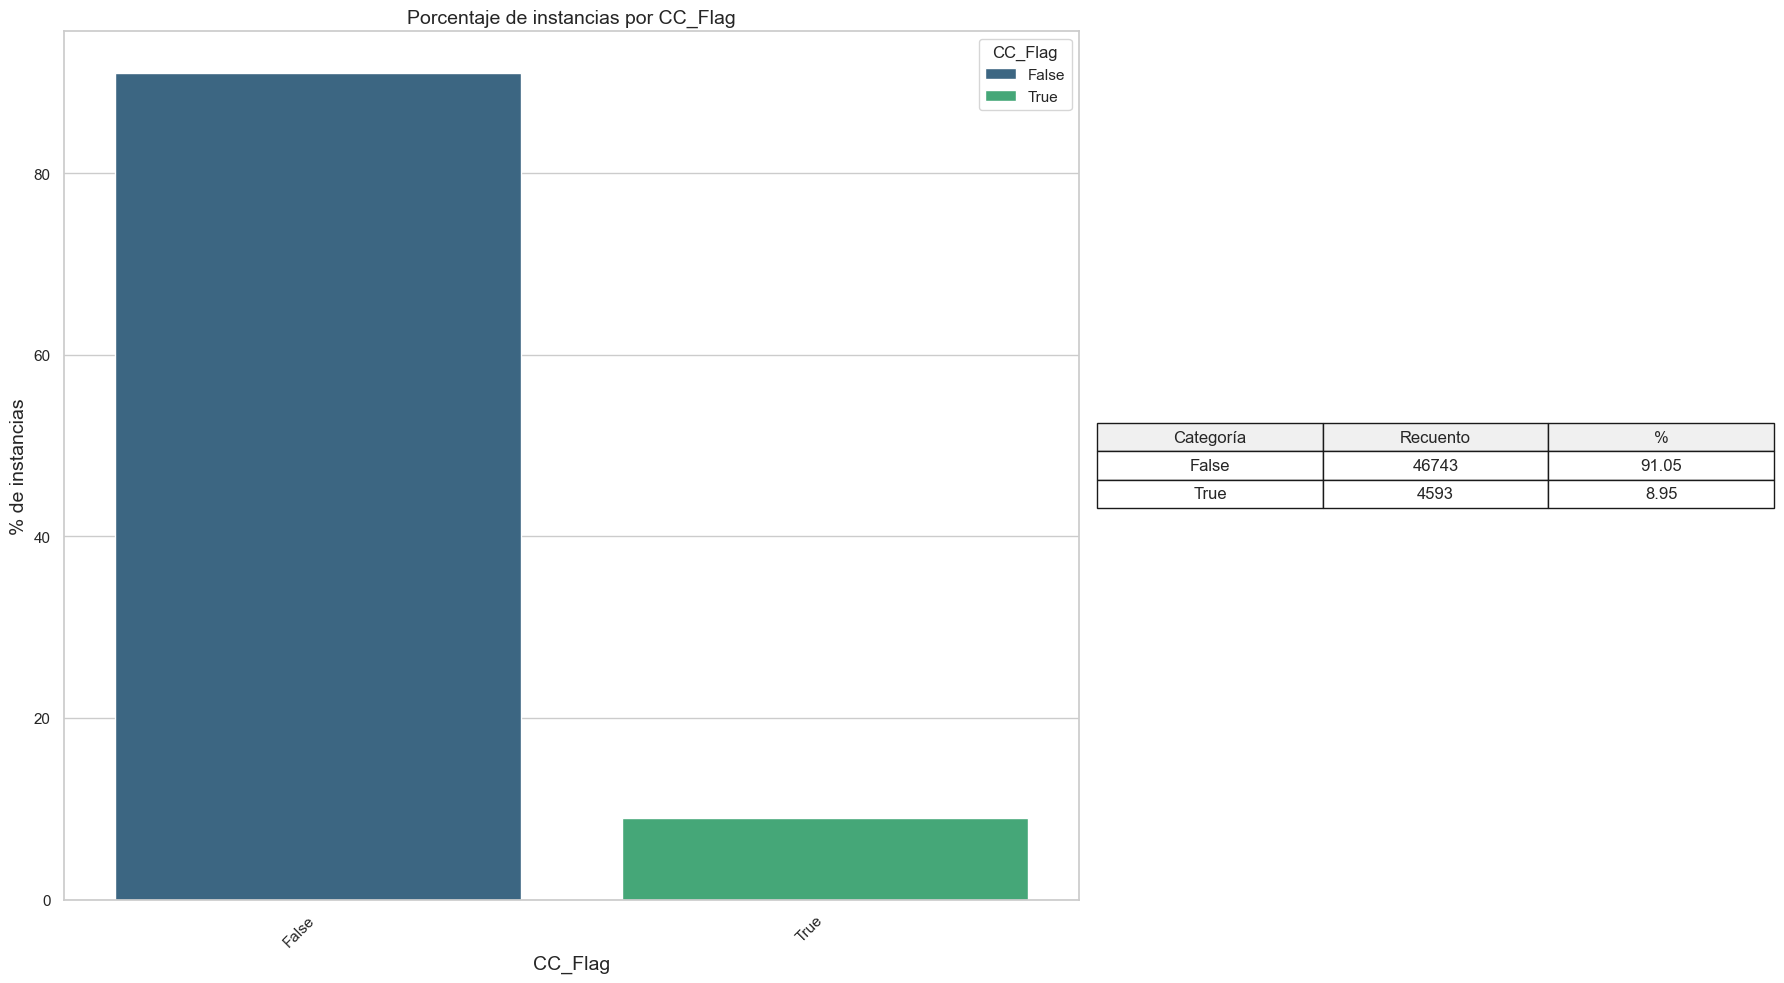

**PL_FLAG**

El número de categorías distintas en la variable 'PL_Flag' es 2.


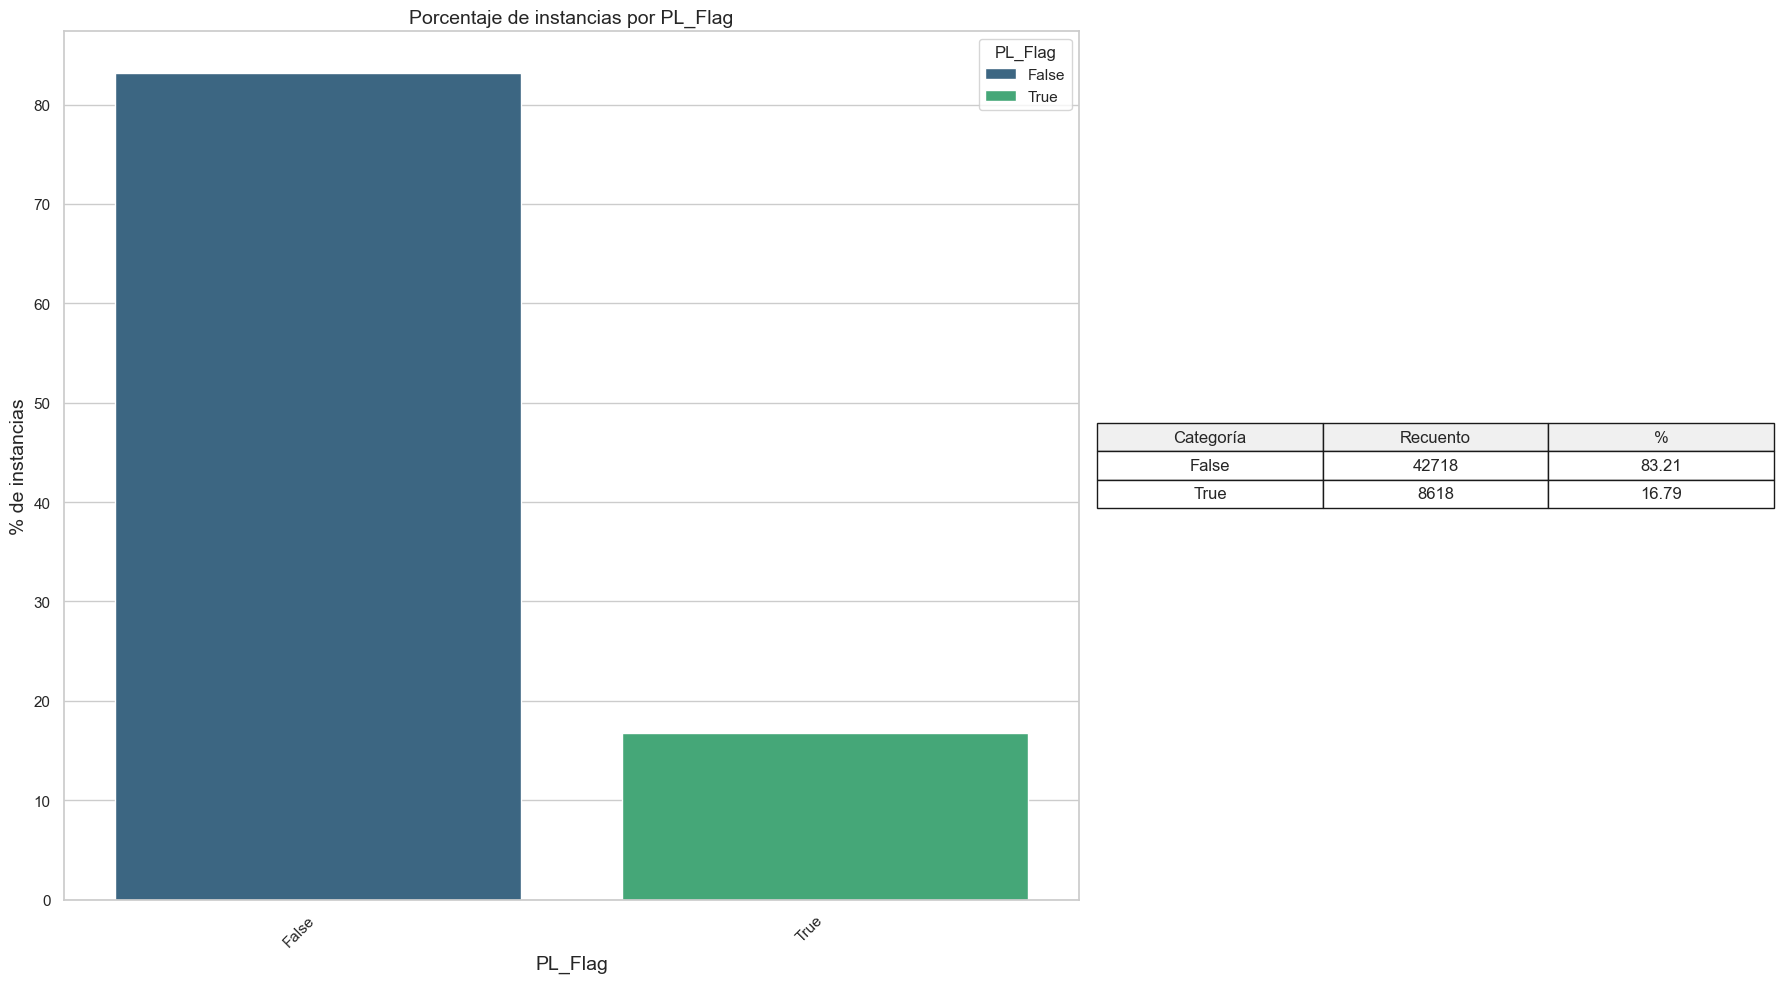

**HL_FLAG**

El número de categorías distintas en la variable 'HL_Flag' es 2.


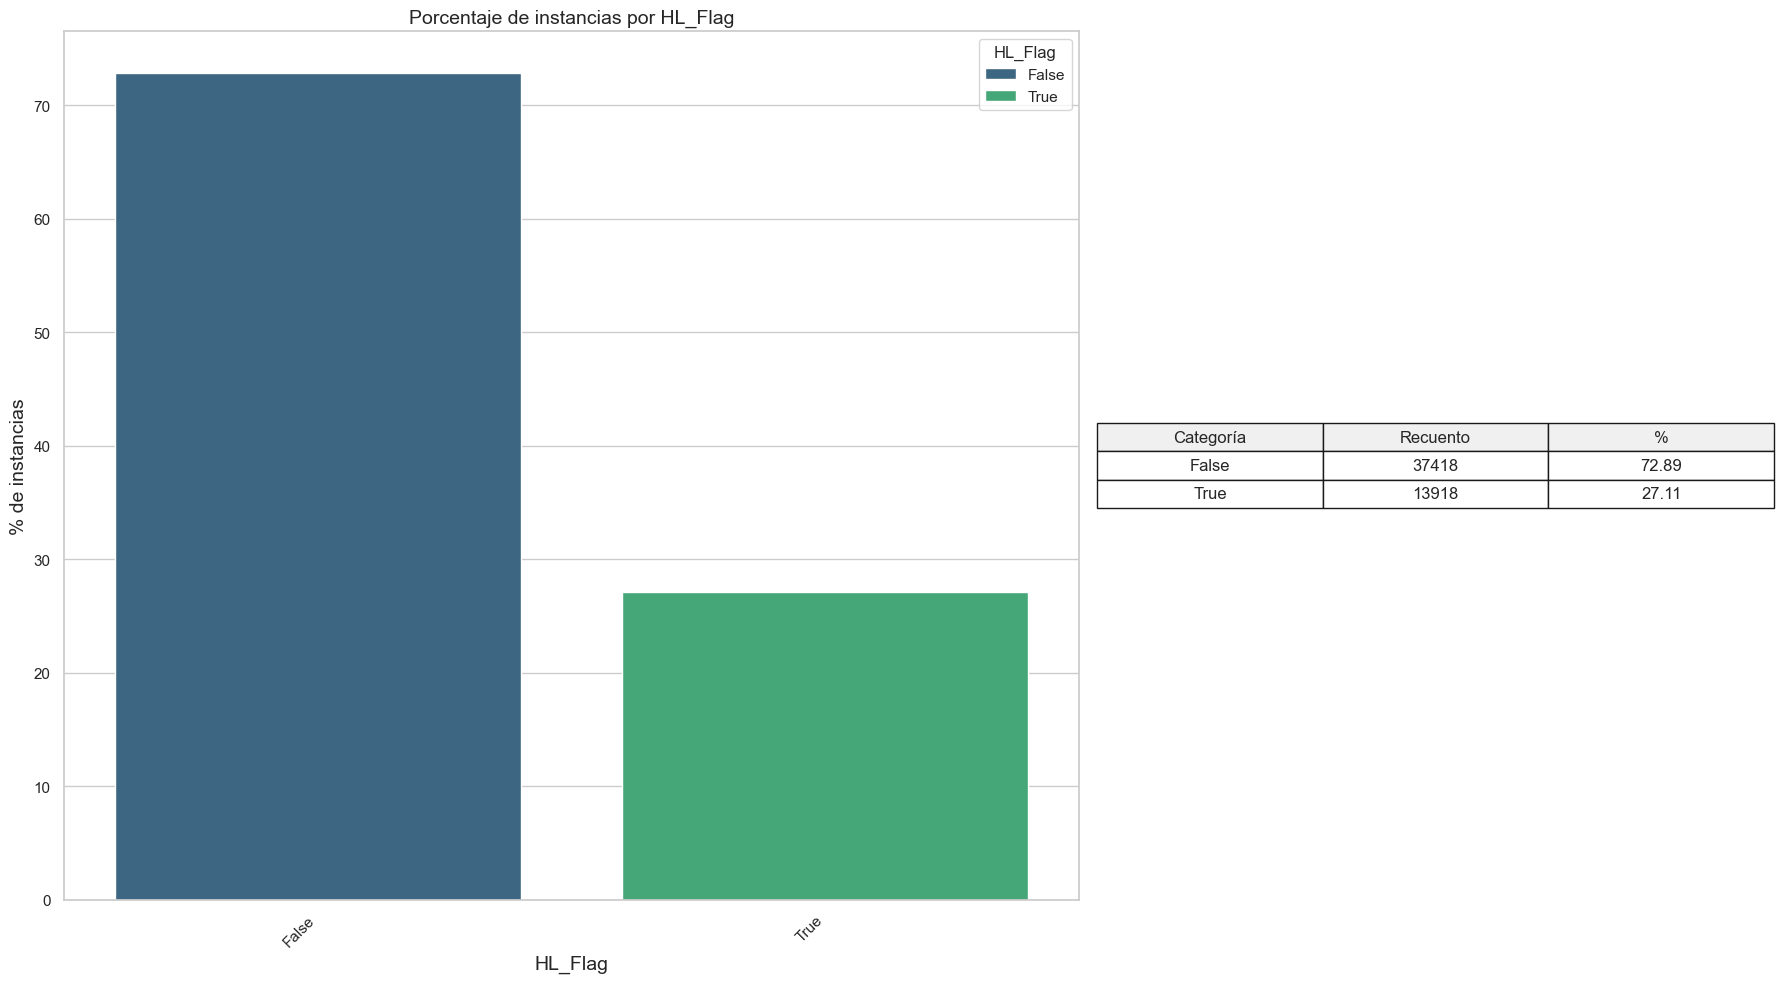

**GL_FLAG**

El número de categorías distintas en la variable 'GL_Flag' es 2.


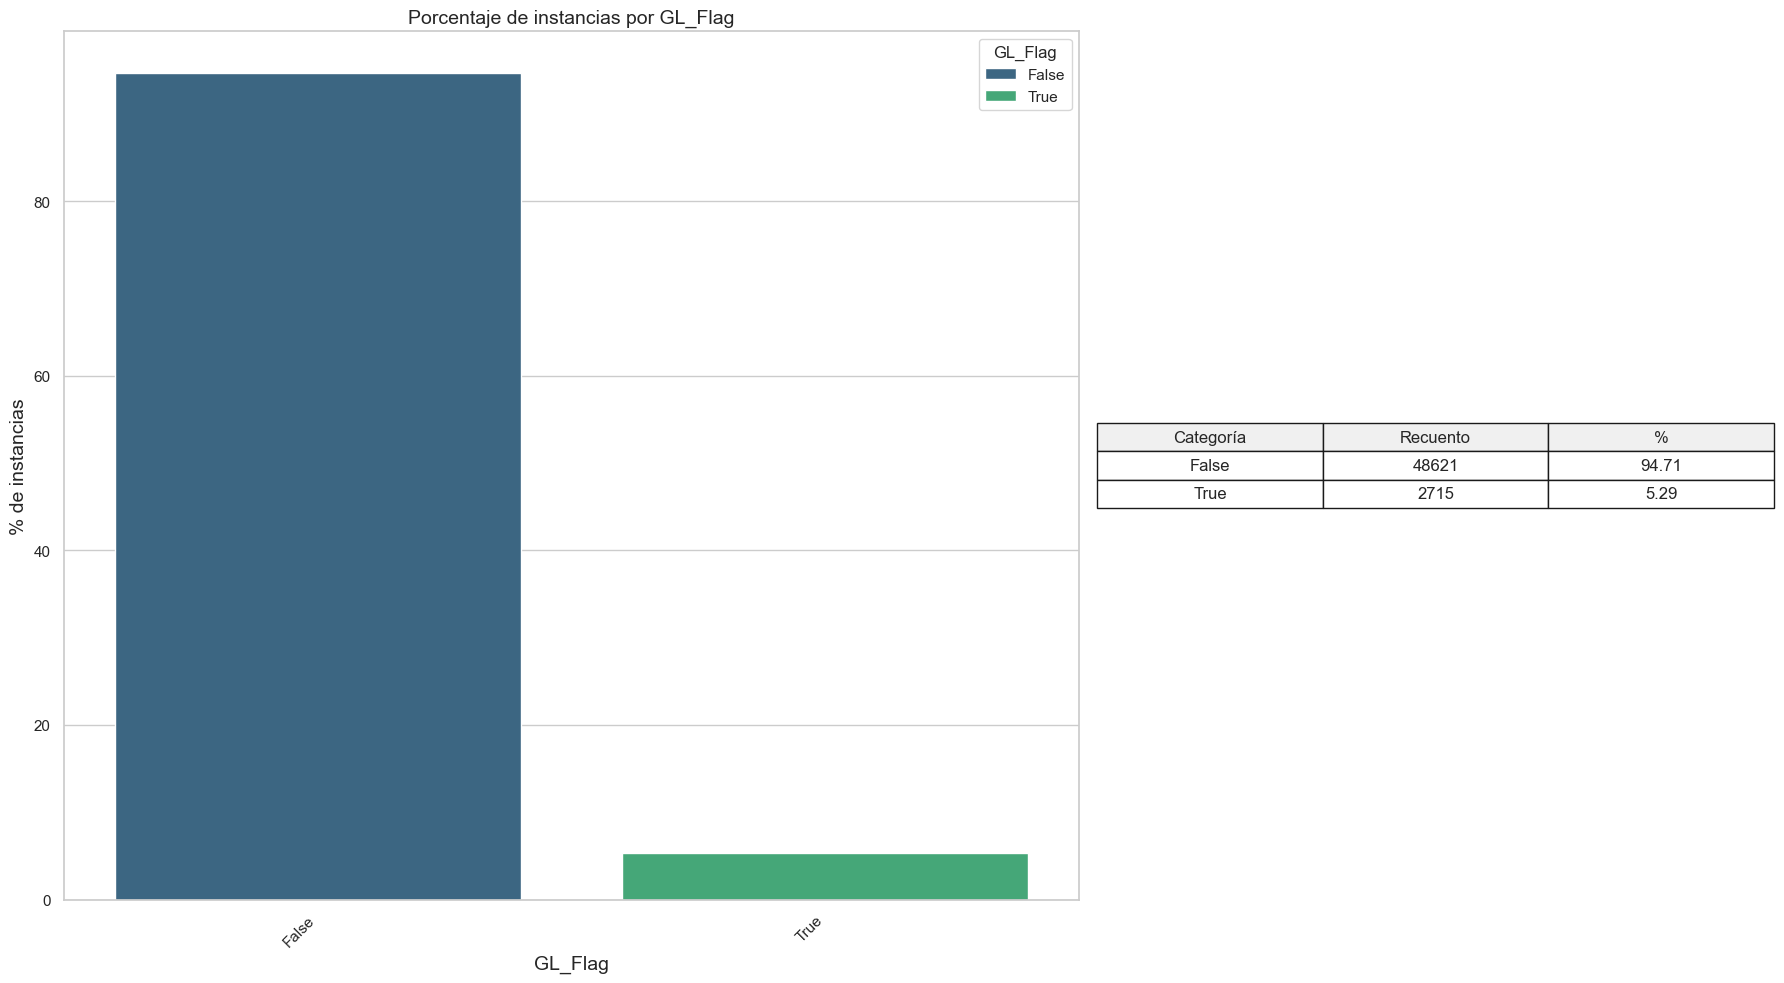

**LAST_PROD_ENQ2**

El número de categorías distintas en la variable 'last_prod_enq2' es 6.


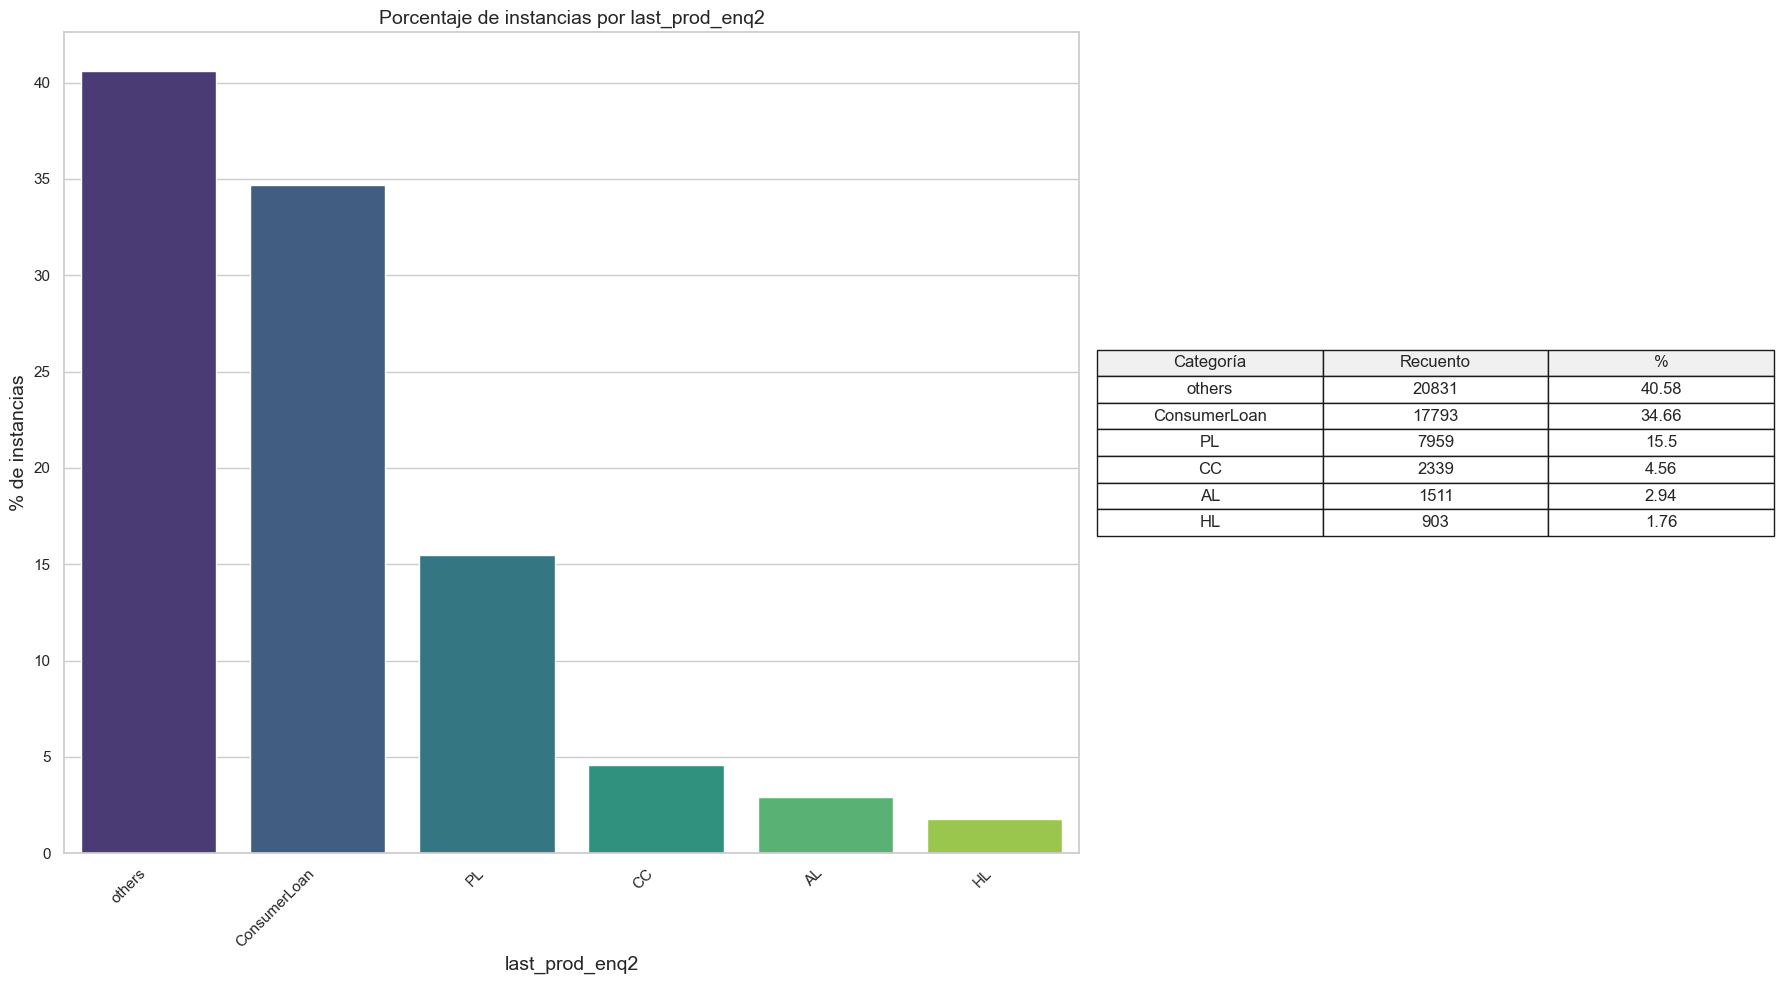

**FIRST_PROD_ENQ2**

El número de categorías distintas en la variable 'first_prod_enq2' es 6.


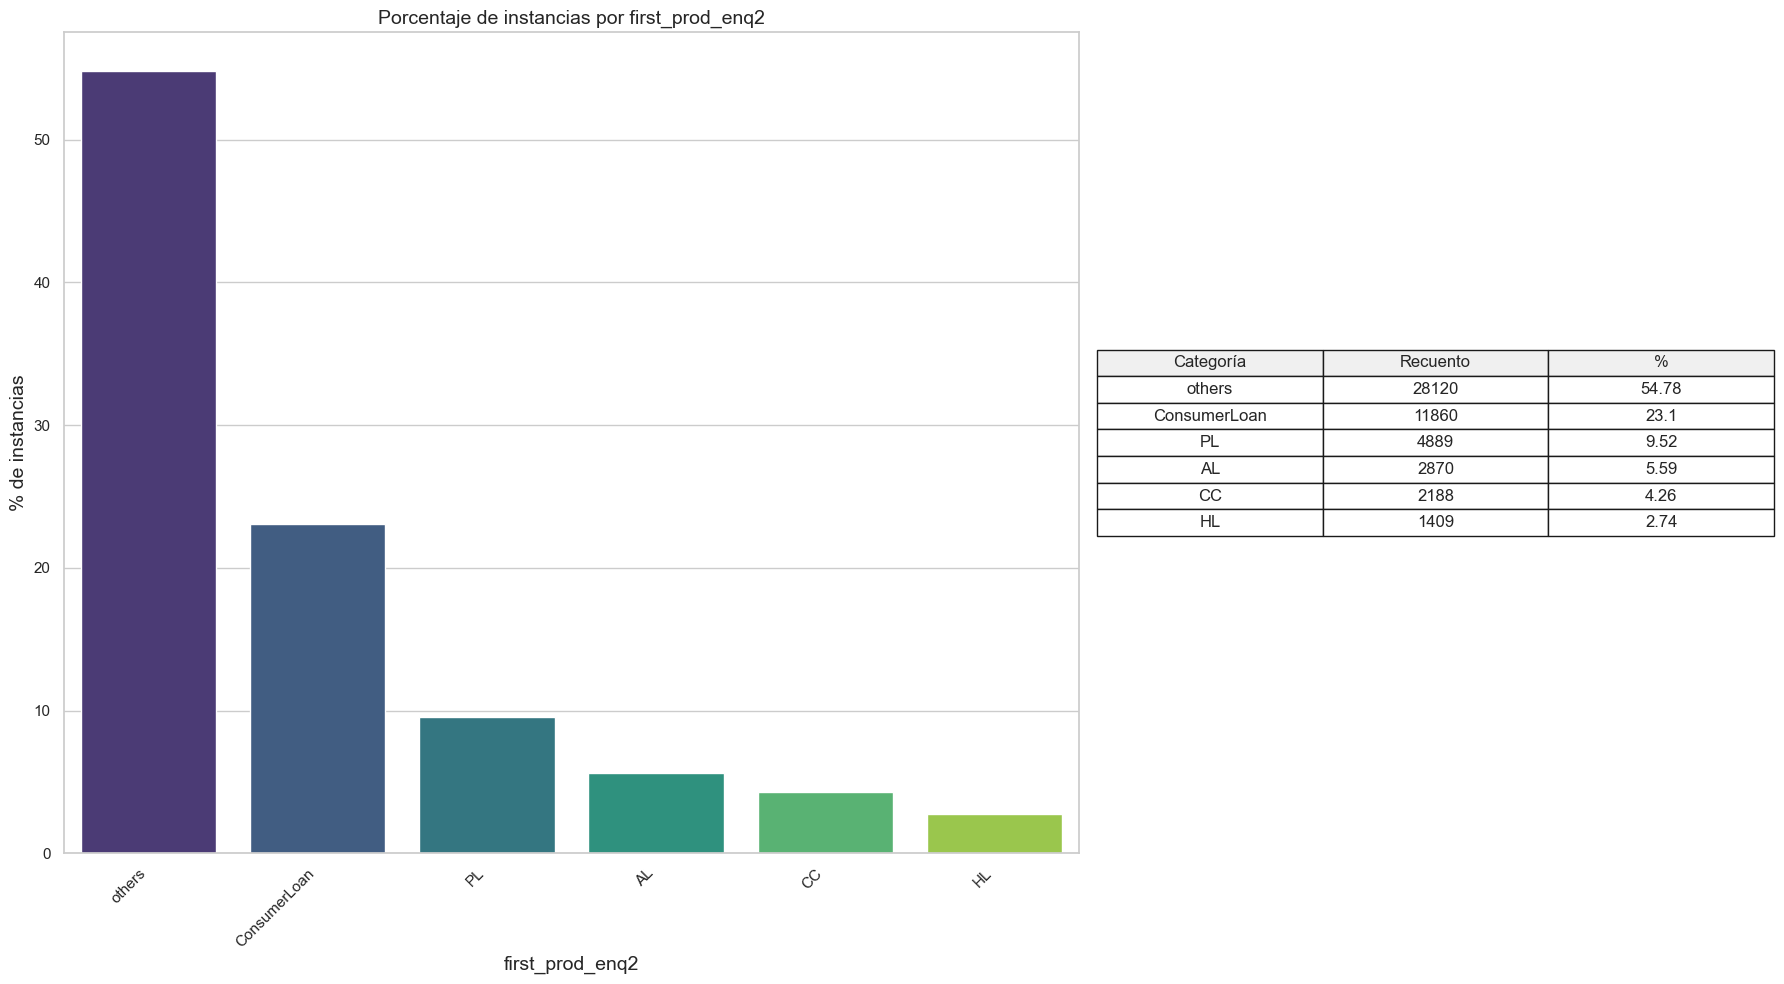

**APPROVED_FLAG**

El número de categorías distintas en la variable 'Approved_Flag' es 4.


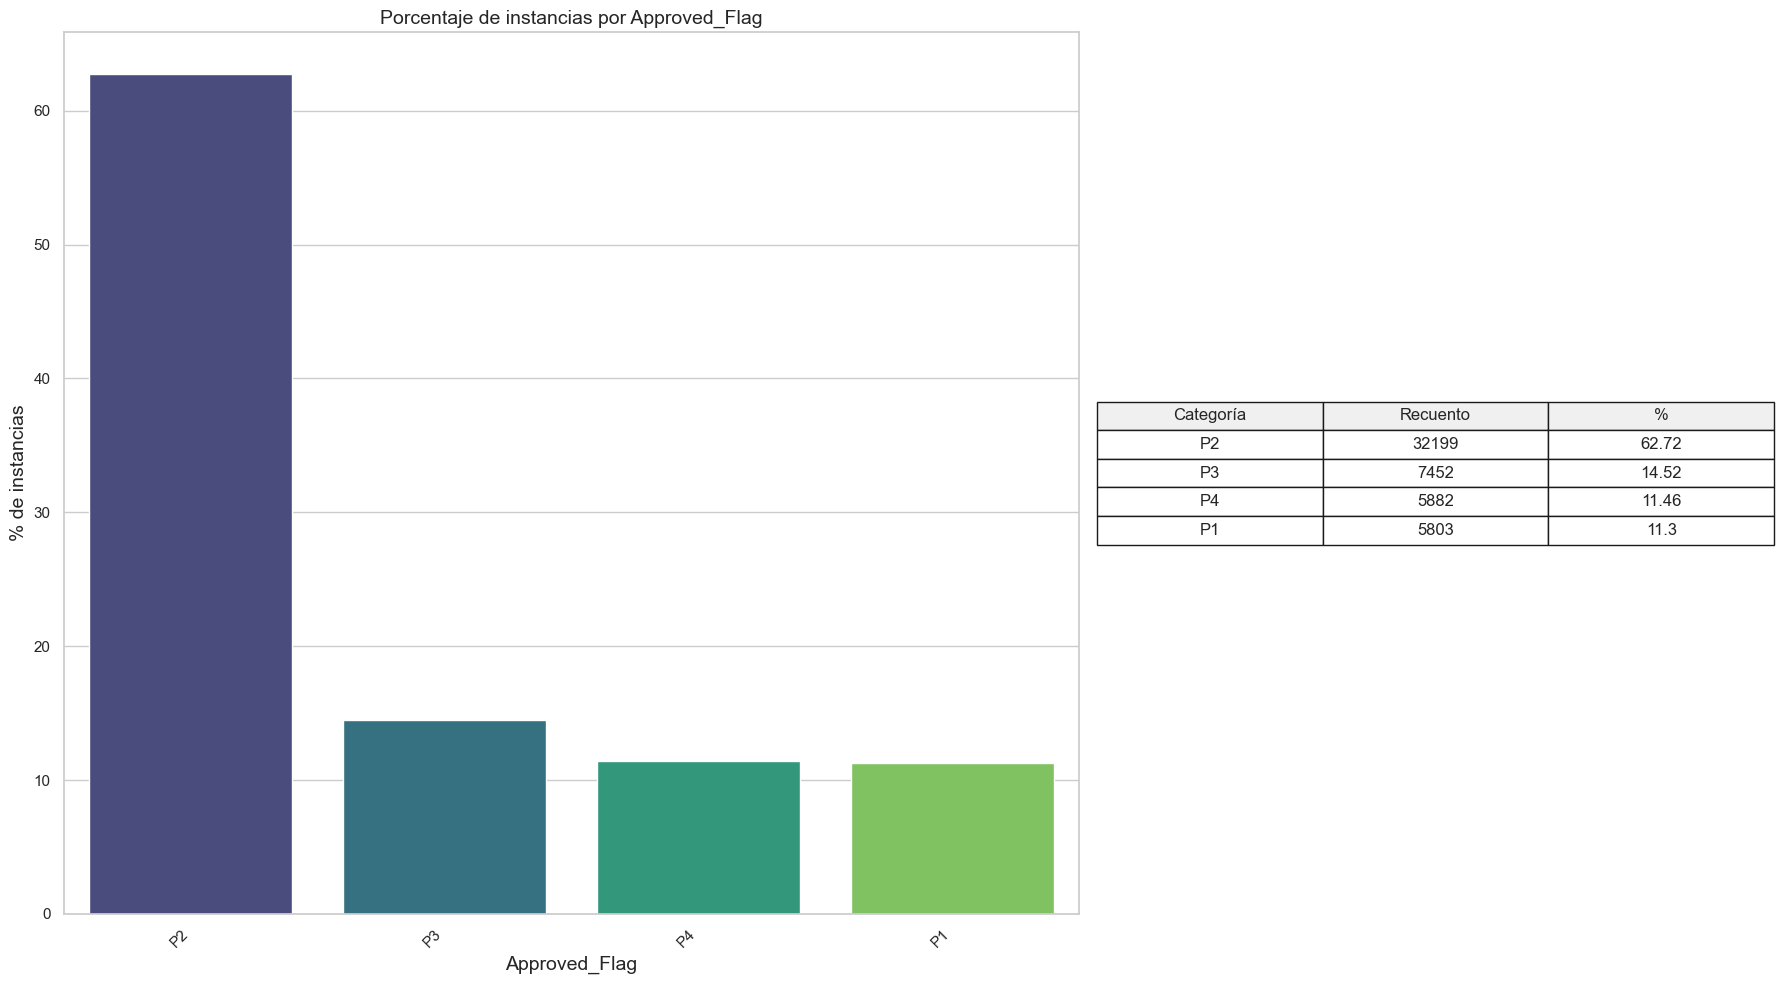

**TIME_SINCE_FIRST_DELIQUENCY_CLASS**

El número de categorías distintas en la variable 'time_since_first_deliquency_class' es 4.


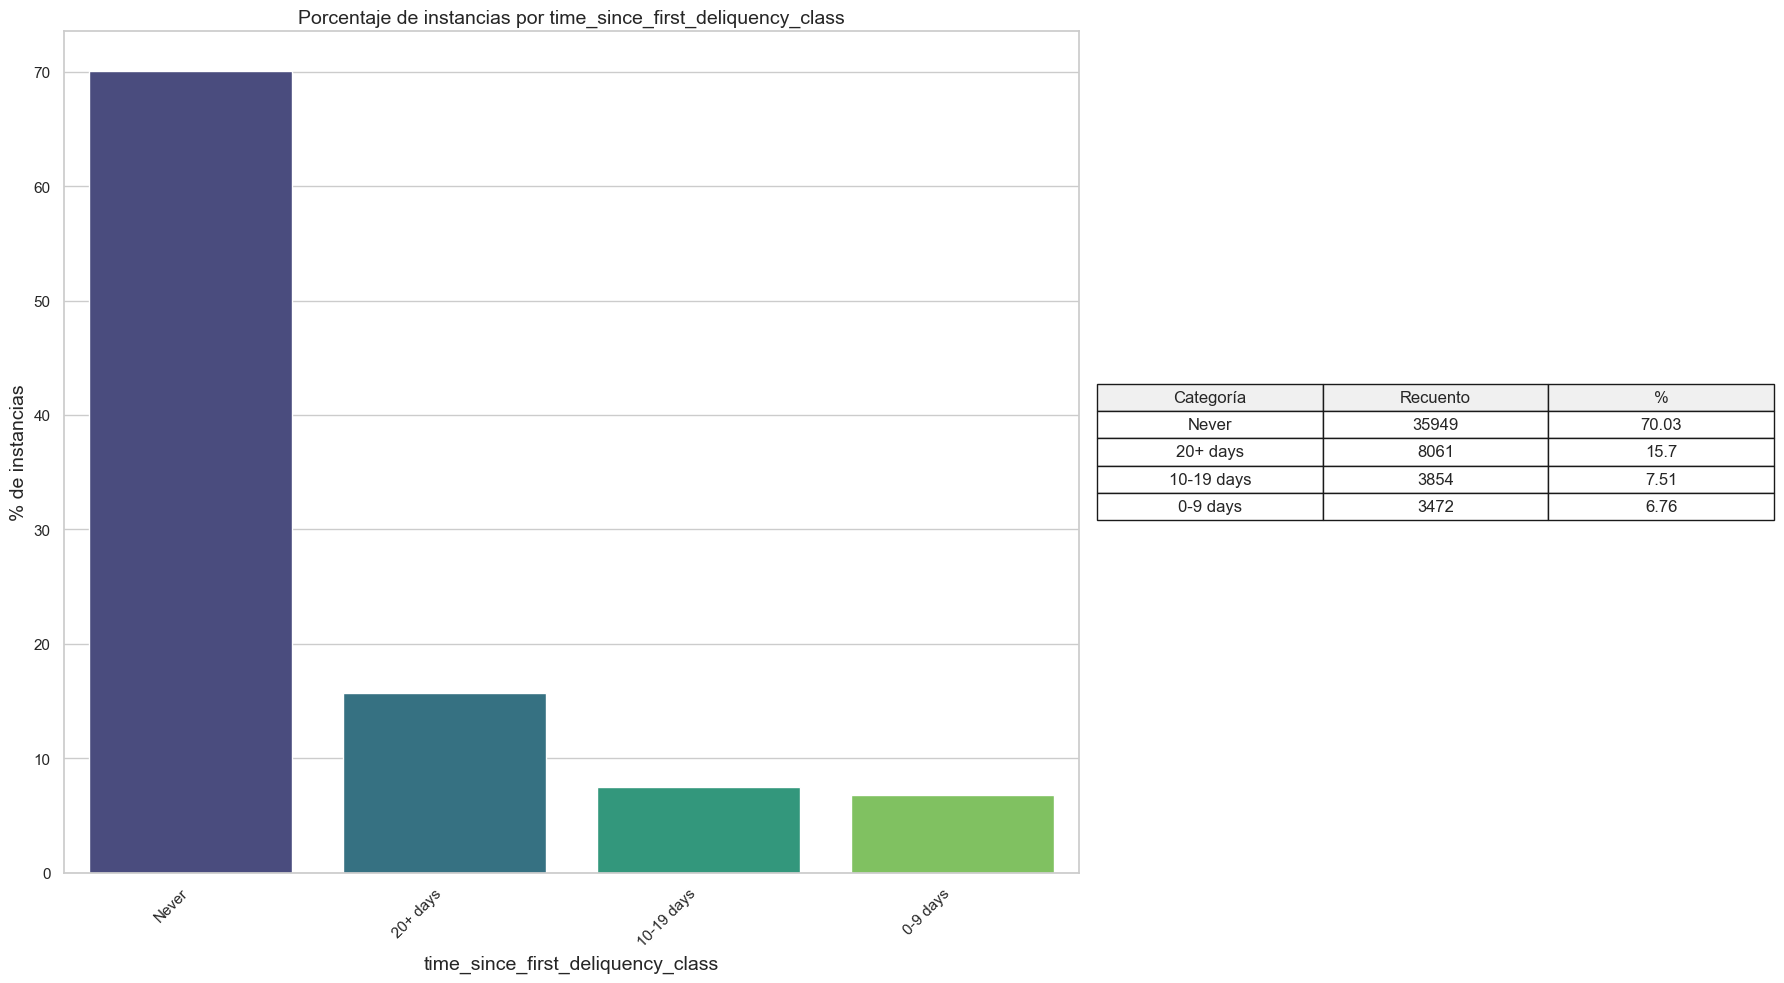

**TIME_SINCE_RECENT_DELIQUENCY_CLASS**

El número de categorías distintas en la variable 'time_since_recent_deliquency_class' es 4.


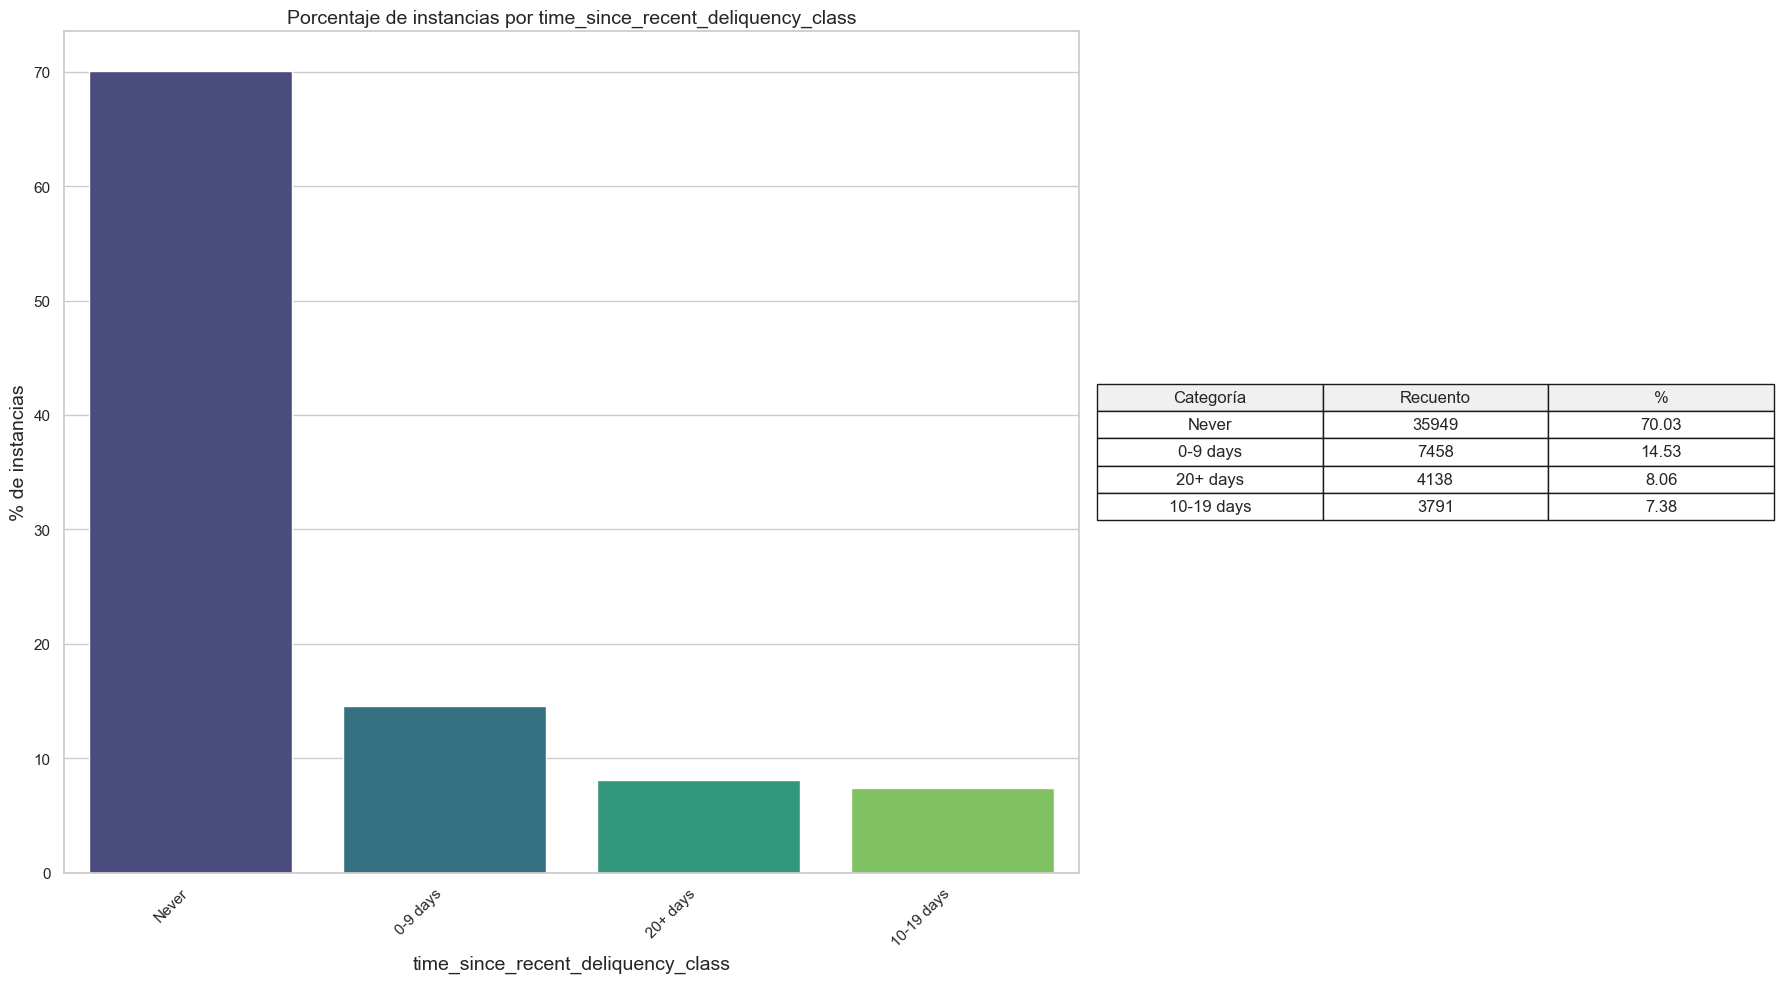

In [45]:
for v_cat in cat_features:
        Count_Cat(external, v_cat)

### 3.2. Variables cuantitativas

En el siguiente código recarcar que se ha aplicado la transformación logaritmica

In [49]:
# Con límites en los ejes



# def Count_Quant(df, quant_feat):
#     # Encabezado
#     print()
#     print()
#     formatted_text = f"**{quant_feat.upper()}**"
#     try:
#         display(Markdown(formatted_text))
#     except:
#         print(formatted_text)
    
    # Estadísticos descriptivos
    # print('Estadísticos')
    # print()
    # print(f'Mínimo: {round(df[quant_feat].min(),2)}')
    # print(f'Máximo: {round(df[quant_feat].max(),2)}')
    # print(f'Promedio: {round(df[quant_feat].mean(), 2)}')
    # print(f'Std.dev: {round(df[quant_feat].std(),2)}')
    # print()
    # print(f'Histograma y Boxplot de {quant_feat}.')    

#     # Configuración de estilo
#     color = '#EE9414'
#     sns.set(style='whitegrid')
#     fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

#     # Histograma
#     sns.histplot(data=df, x=quant_feat, ax=axes[0], kde=True, color=color)
#     axes[0].set_xlabel('') 

#     # Boxplot
#     sns.boxplot(data=df, x=quant_feat, ax=axes[1], color=color)
#     axes[1].set_xlabel('') 

#     # Etiquetas en escala original con FixedLocator
#     x_ticks = [round(np.exp(x), 2) for x in axes[0].get_xticks()]
#     axes[0].set_xticks(axes[0].get_xticks())
#     axes[0].set_xticklabels(x_ticks)
    
#     x_ticks = [round(np.exp(x), 2) for x in axes[1].get_xticks()]
#     axes[1].set_xticks(axes[1].get_xticks())

#     # Mostrar gráficos
#     plt.tight_layout()
#     plt.show()


SyntaxError: invalid syntax (3017253680.py, line 1)

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def Count_Quant(df, quant_feat):
    # Encabezado
    print()
    print()
    formatted_text = f"**{quant_feat.upper()}**"
    try:
        from IPython.display import display, Markdown
        display(Markdown(formatted_text))
    except:
        print(formatted_text)

    # Estadísticos descriptivos
    print('Estadísticos')
    print()
    print(f'Mínimo: {round(df[quant_feat].min(),2)}')
    print(f'Máximo: {round(df[quant_feat].max(),2)}')
    print(f'Promedio: {round(df[quant_feat].mean(), 2)}')
    print(f'Std.dev: {round(df[quant_feat].std(),2)}')
    print()
    print(f'Histograma y Boxplot de {quant_feat}.')      

    # Configuración de estilo
    color = '#EE9414'
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

    # Histograma con KDE corregido
    sns.histplot(data=df, x=quant_feat, ax=axes[0], kde=True, color=color, kde_kws={"bw_adjust": 0.3, "clip": (0, 1)})
    axes[0].set_xlabel('')
    axes[0].set_xlim(0, 1)  # Limitar eje X

    # Boxplot
    sns.boxplot(data=df, x=quant_feat, ax=axes[1], color=color)
    axes[1].set_xlabel('')
    axes[1].set_xlim(0, 1)  # Limitar eje X

    # Mostrar gráficos
    plt.tight_layout()
    plt.show()


**TIME_SINCE_RECENT_PAYMENT**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.43
Std.dev: 0.15

Histograma y Boxplot de time_since_recent_payment.


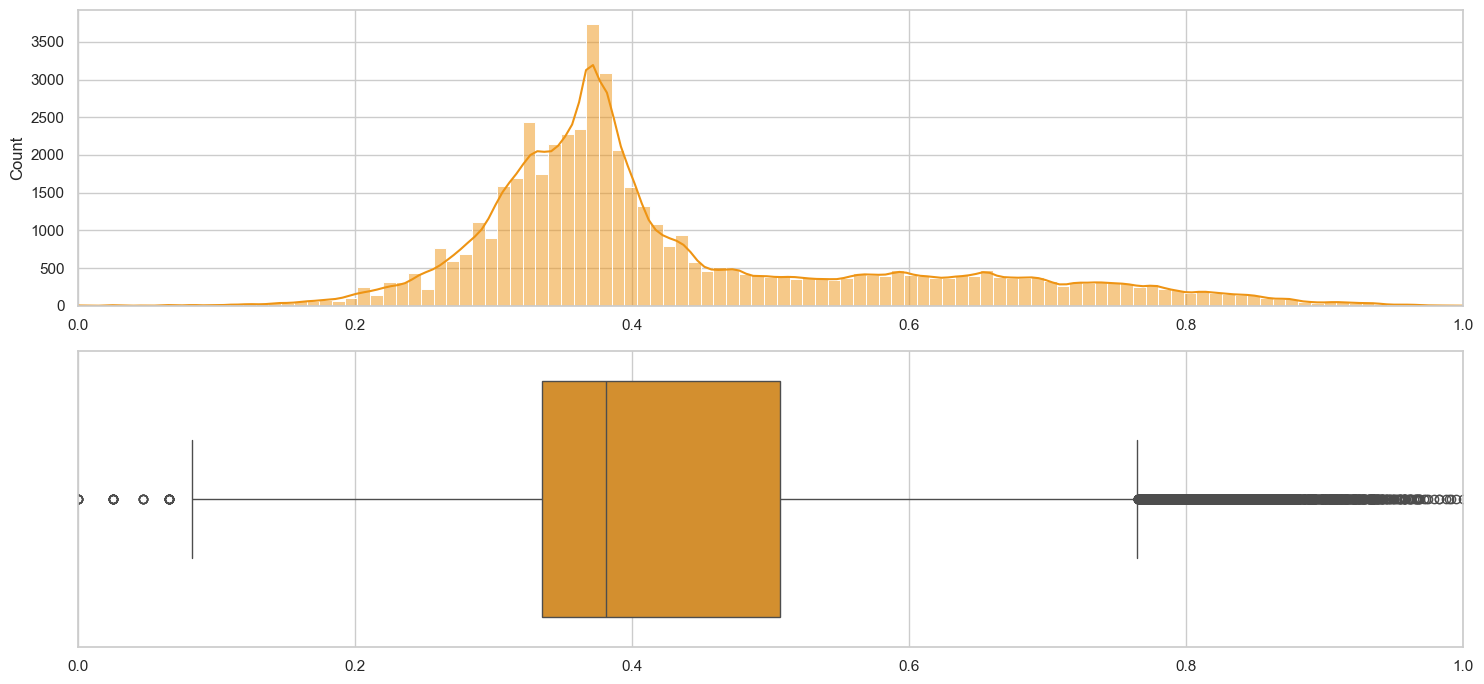

**NUM_TIMES_DELINQUENT**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.1
Std.dev: 0.18

Histograma y Boxplot de num_times_delinquent.


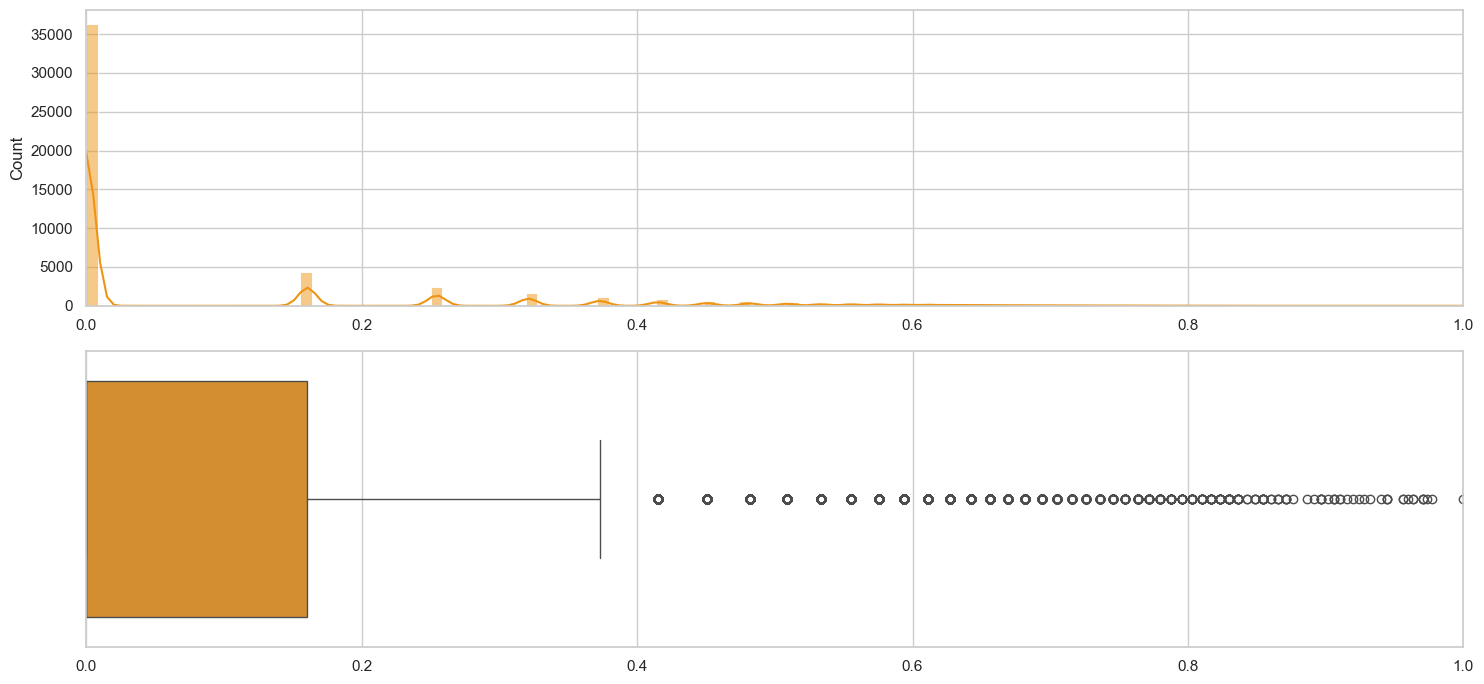

**MAX_RECENT_LEVEL_OF_DELIQ**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.14
Std.dev: 0.23

Histograma y Boxplot de max_recent_level_of_deliq.


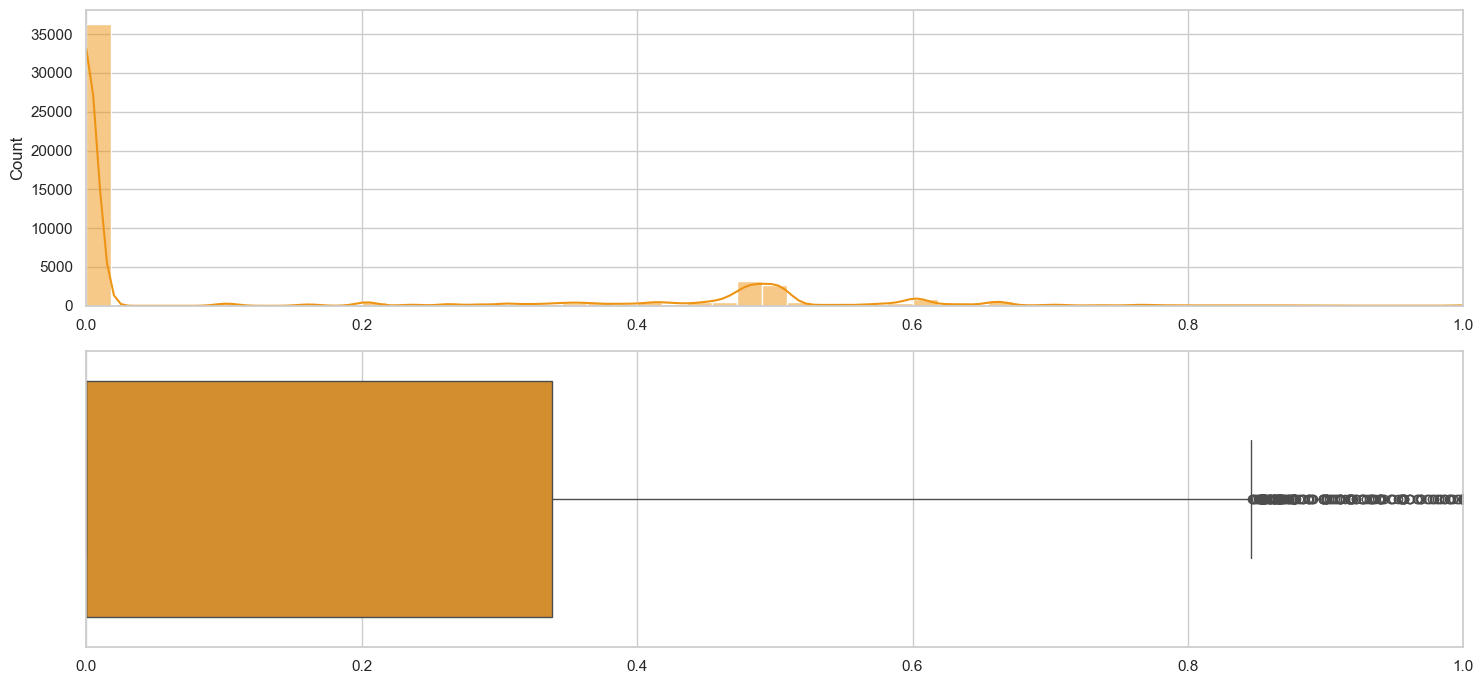

**NUM_DELIQ_12MTS**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.06
Std.dev: 0.15

Histograma y Boxplot de num_deliq_12mts.


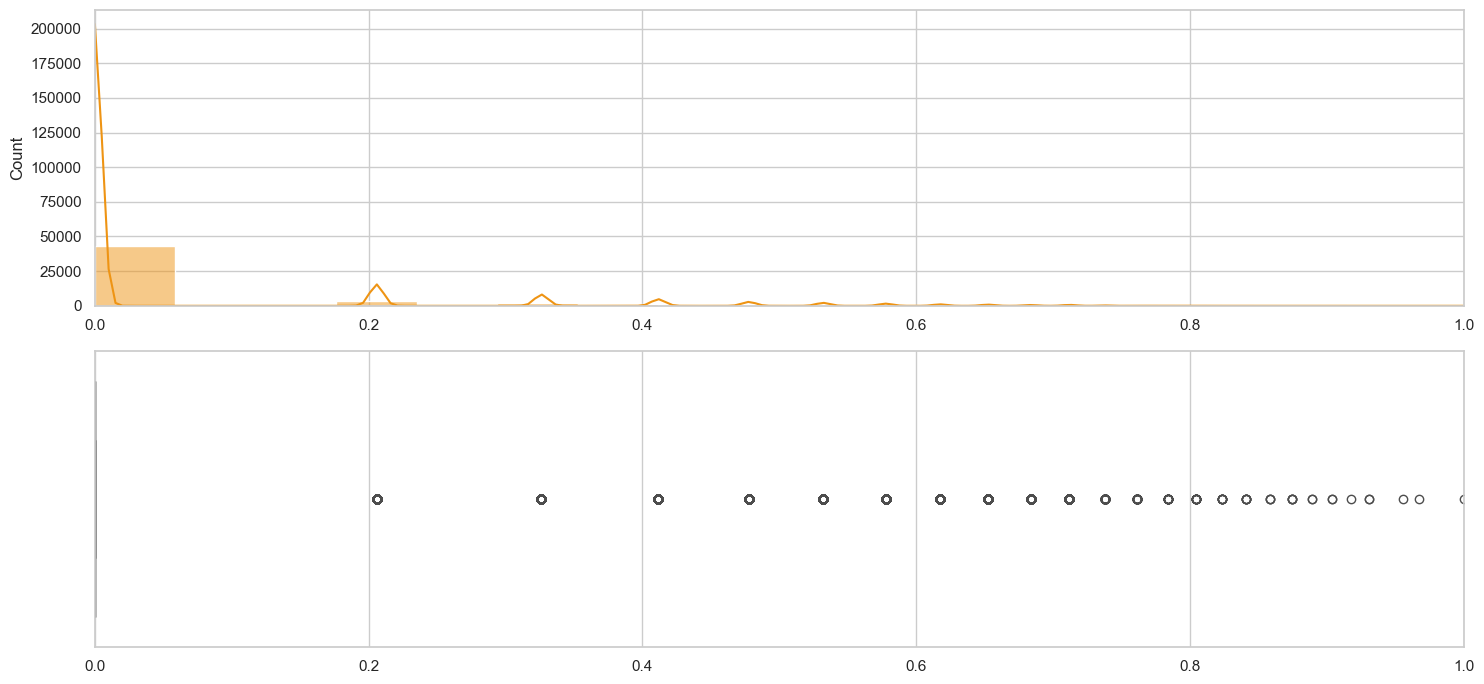

**NUM_TIMES_30P_DPD**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.05
Std.dev: 0.14

Histograma y Boxplot de num_times_30p_dpd.


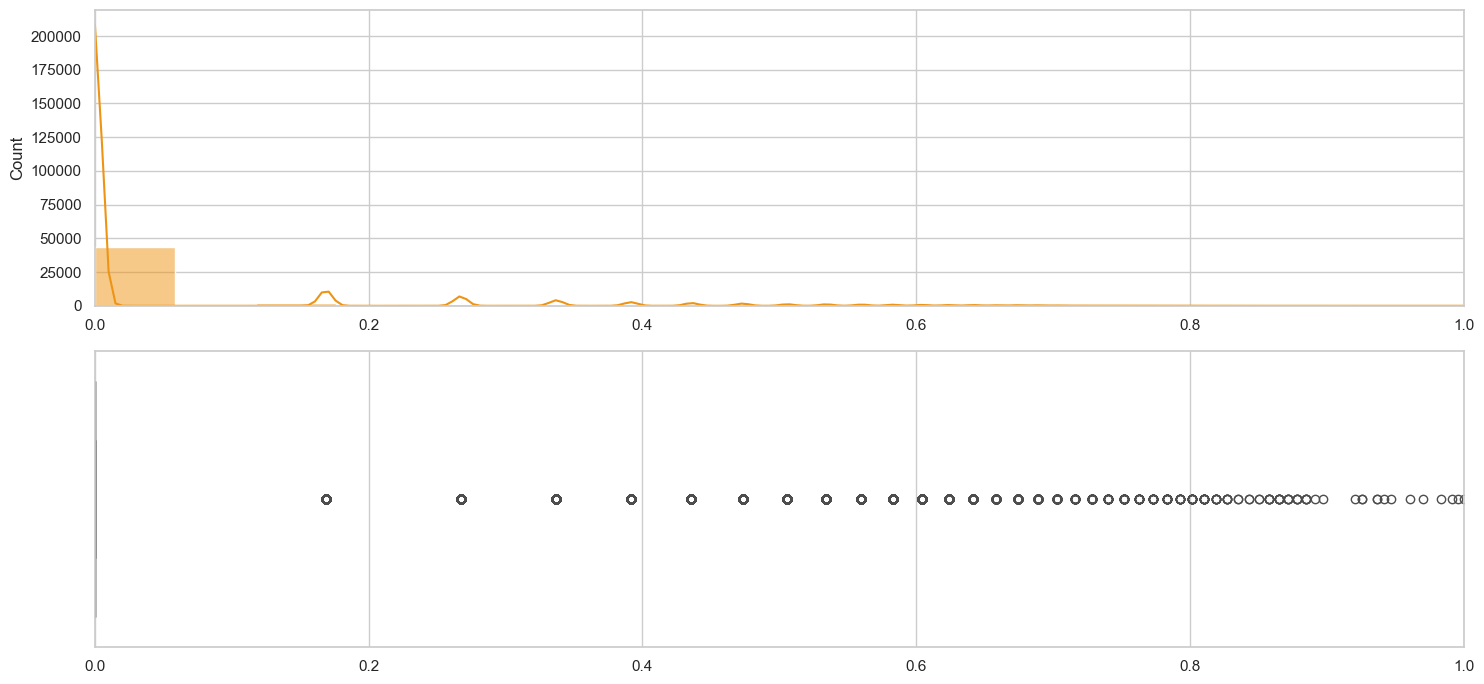

**NUM_TIMES_60P_DPD**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.03
Std.dev: 0.12

Histograma y Boxplot de num_times_60p_dpd.


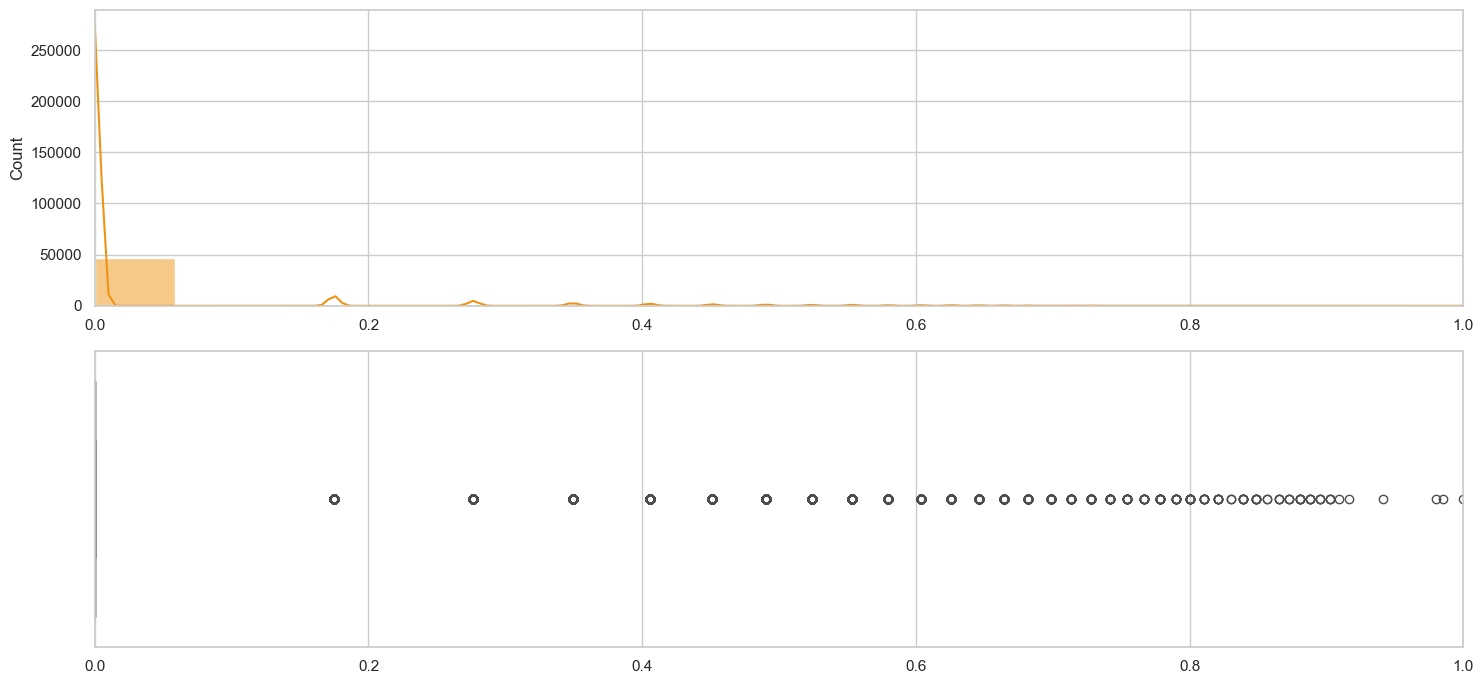

**NUM_STD_12MTS**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.14
Std.dev: 0.23

Histograma y Boxplot de num_std_12mts.


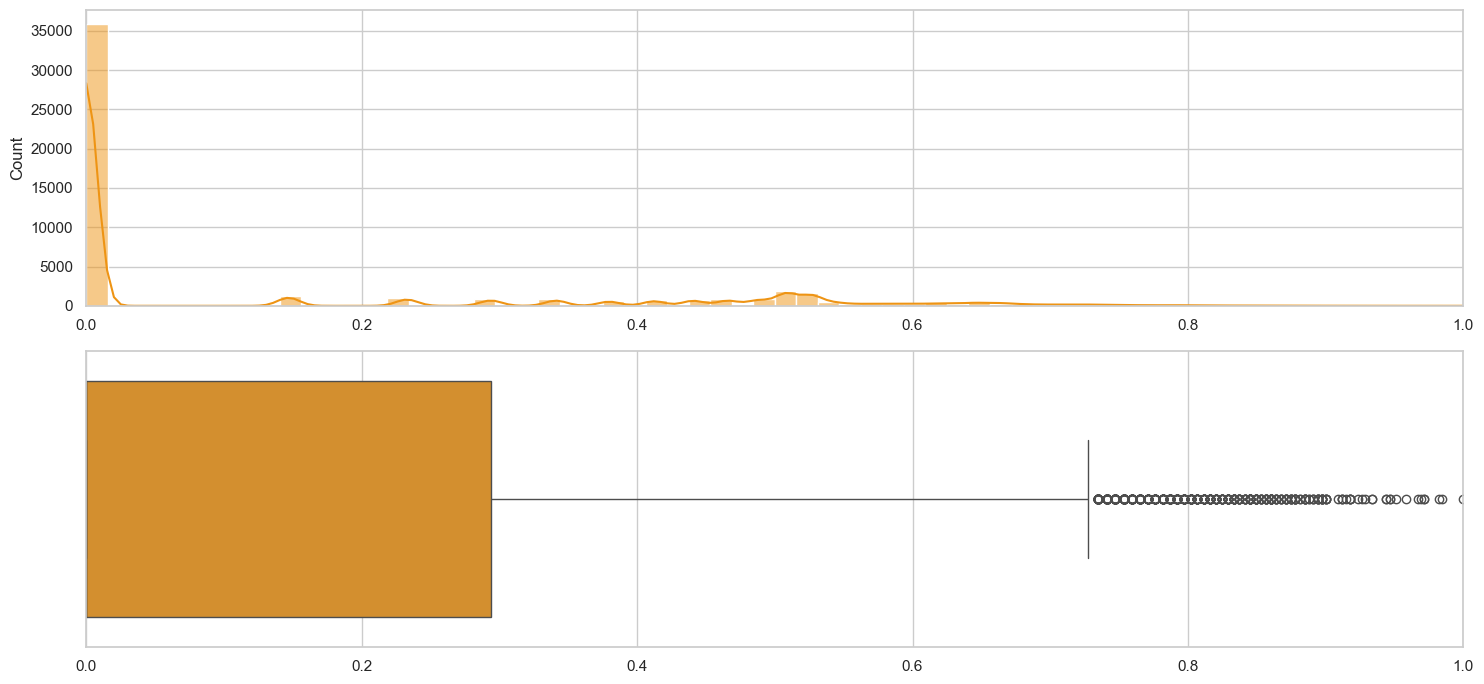

**NUM_SUB_12MTS**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.0
Std.dev: 0.03

Histograma y Boxplot de num_sub_12mts.


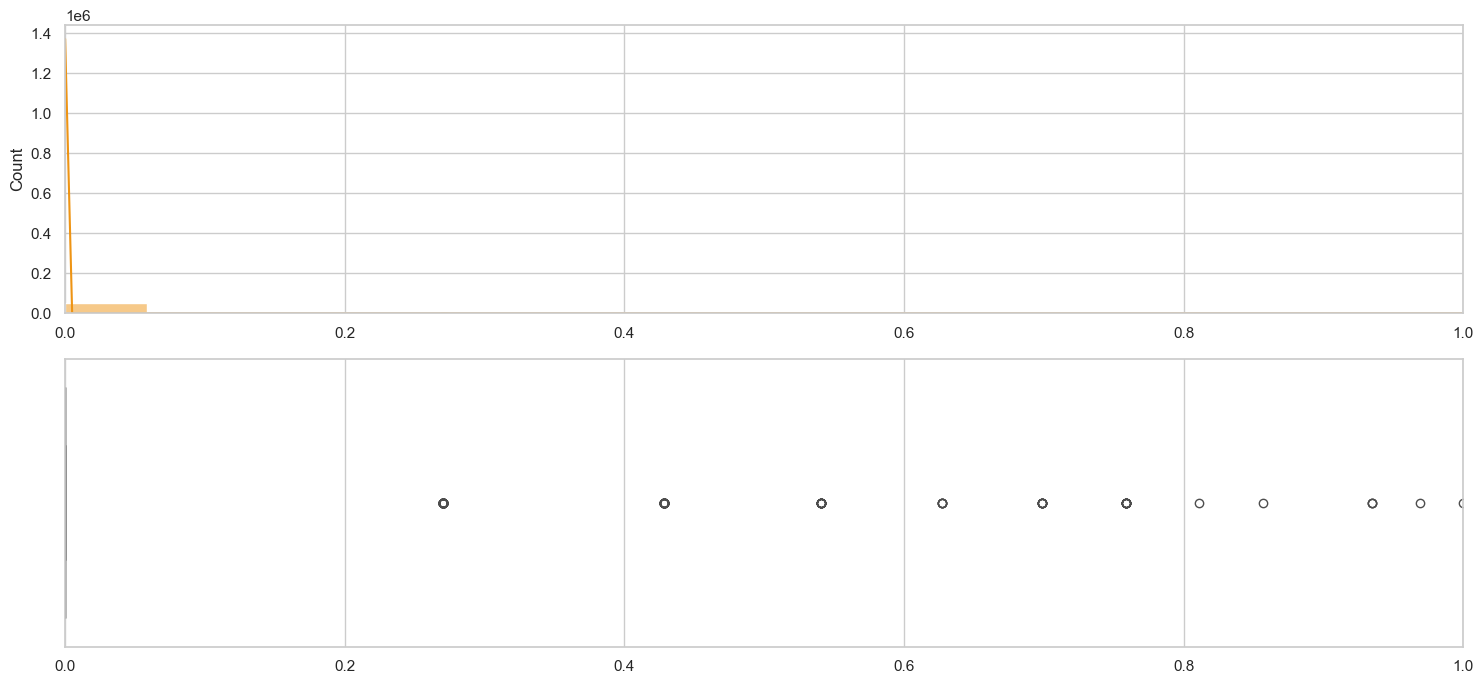

**NUM_DBT_12MTS**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.0
Std.dev: 0.01

Histograma y Boxplot de num_dbt_12mts.


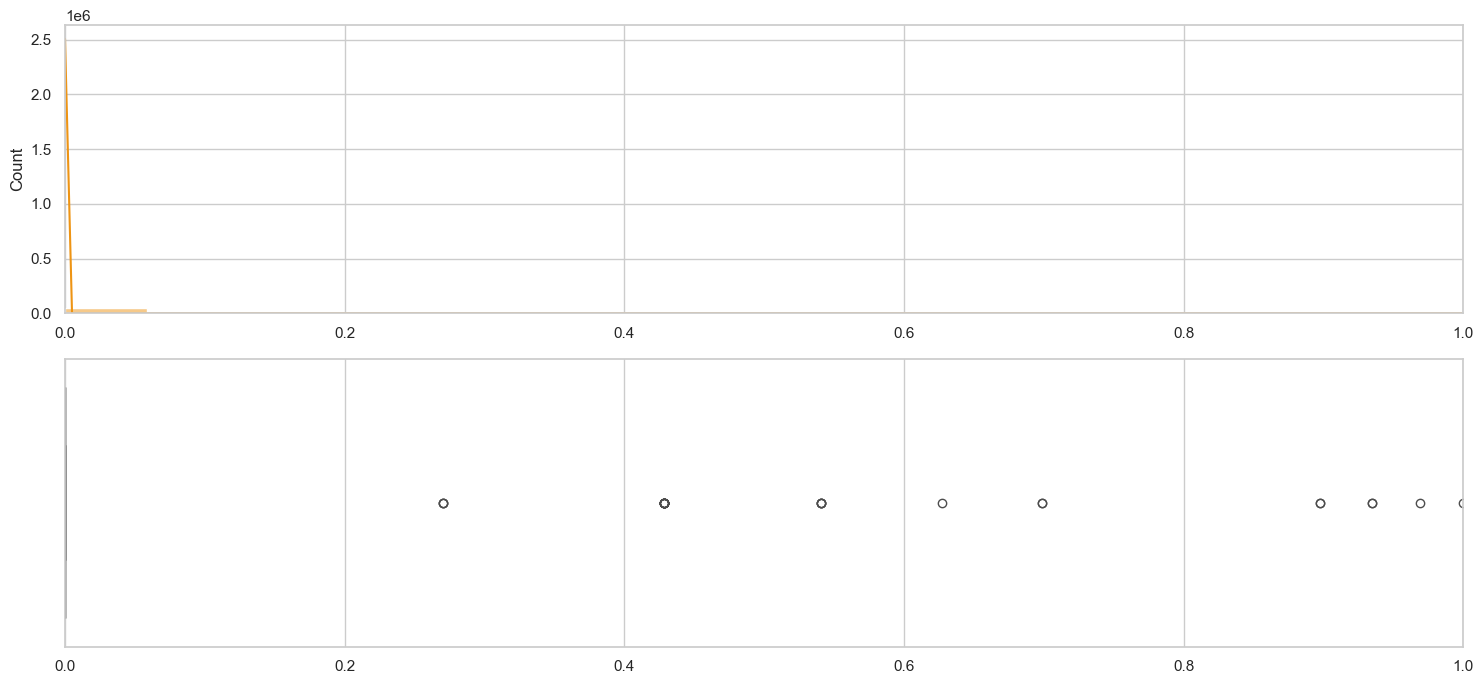

**NUM_LSS_12MTS**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.0
Std.dev: 0.01

Histograma y Boxplot de num_lss_12mts.


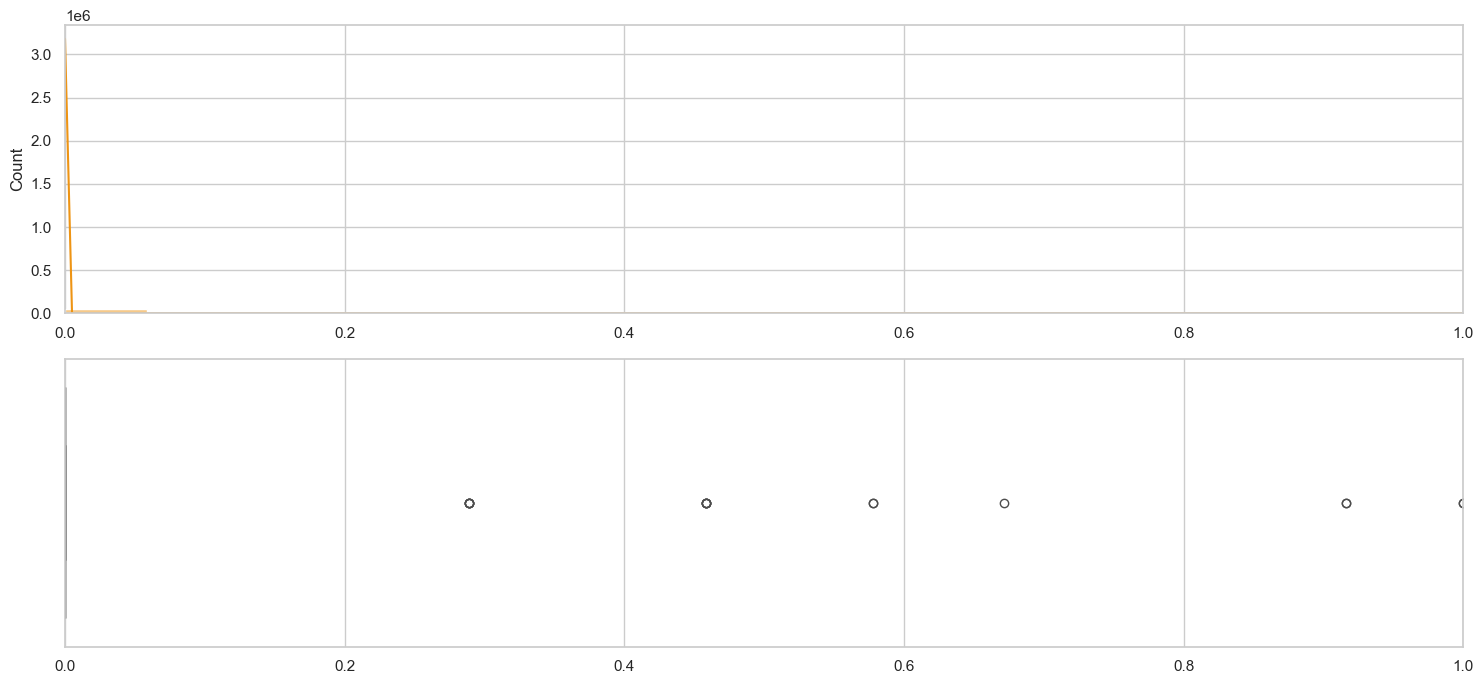

**RECENT_LEVEL_OF_DELIQ**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.13
Std.dev: 0.22

Histograma y Boxplot de recent_level_of_deliq.


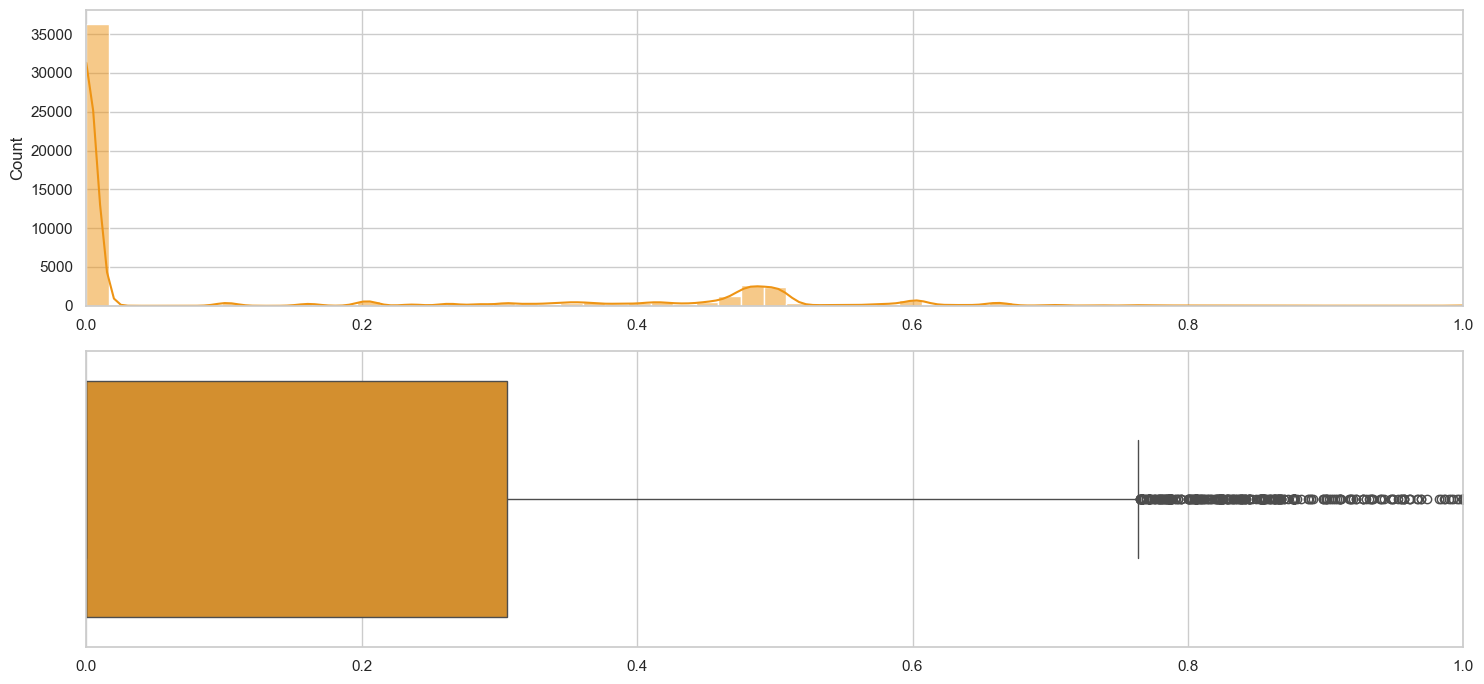

**TOT_ENQ**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.19
Std.dev: 0.18

Histograma y Boxplot de tot_enq.


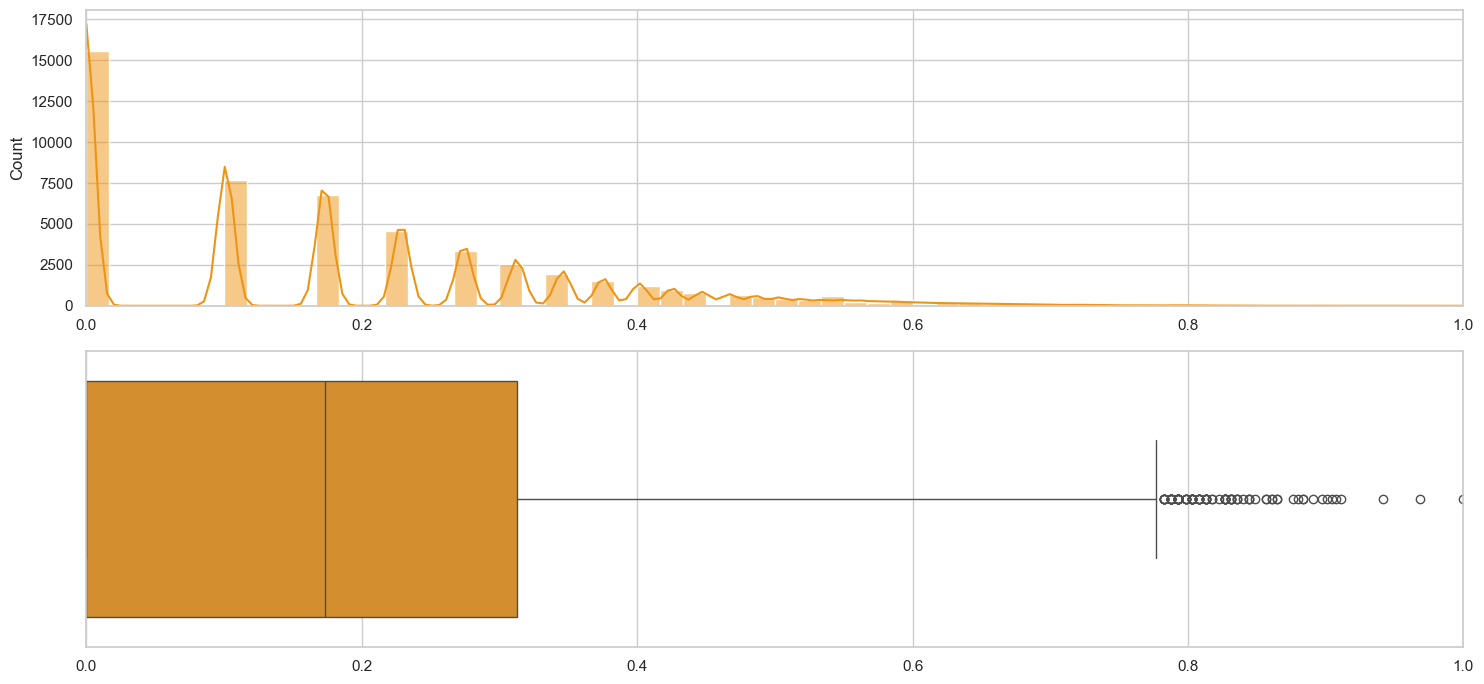

**CC_ENQ_L12M**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.03
Std.dev: 0.11

Histograma y Boxplot de CC_enq_L12m.


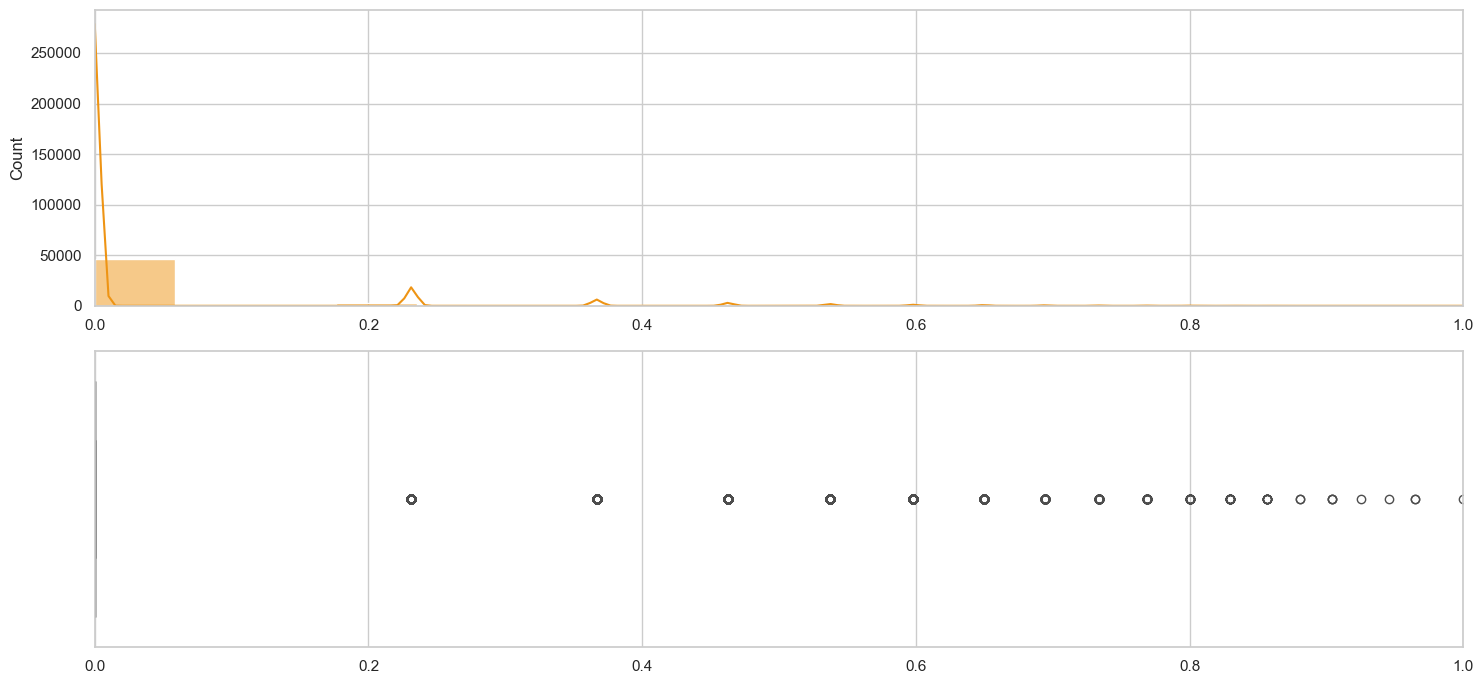

**PL_ENQ_L12M**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.09
Std.dev: 0.15

Histograma y Boxplot de PL_enq_L12m.


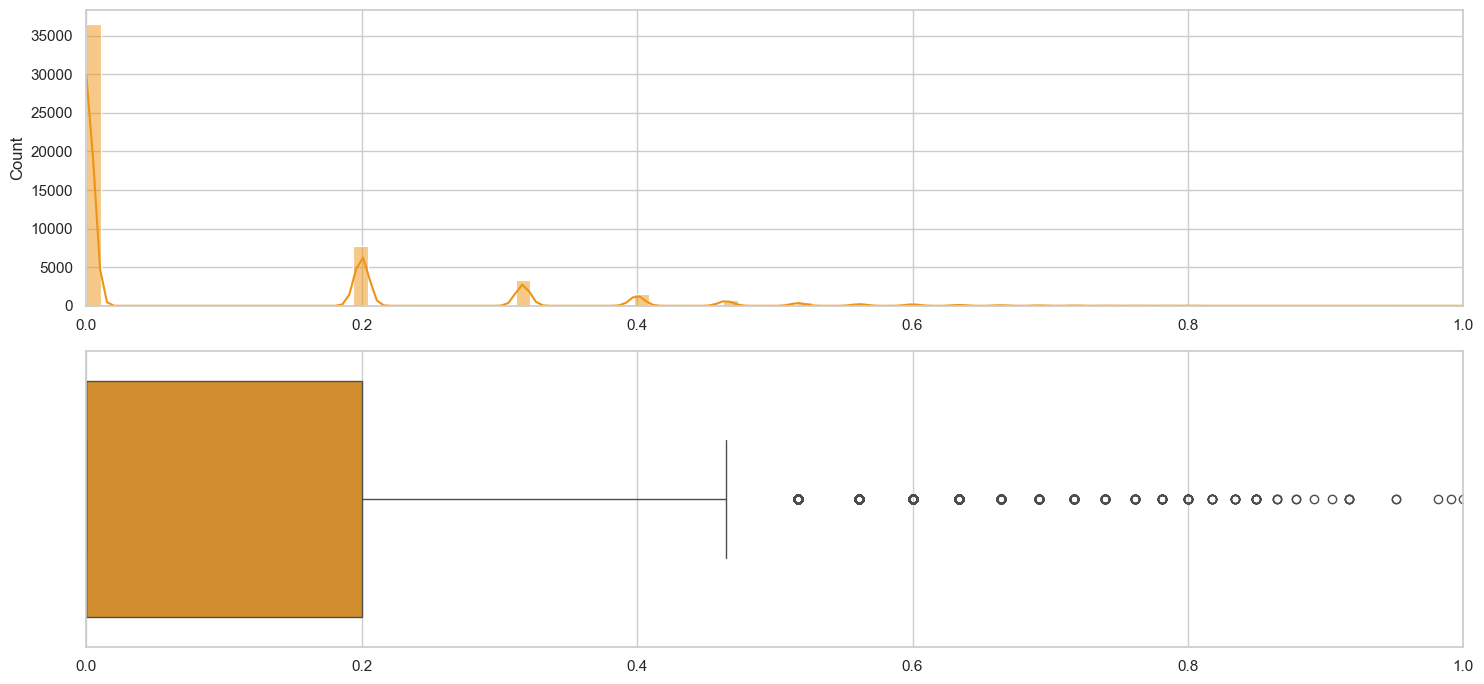

**TIME_SINCE_RECENT_ENQ**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.51
Std.dev: 0.23

Histograma y Boxplot de time_since_recent_enq.


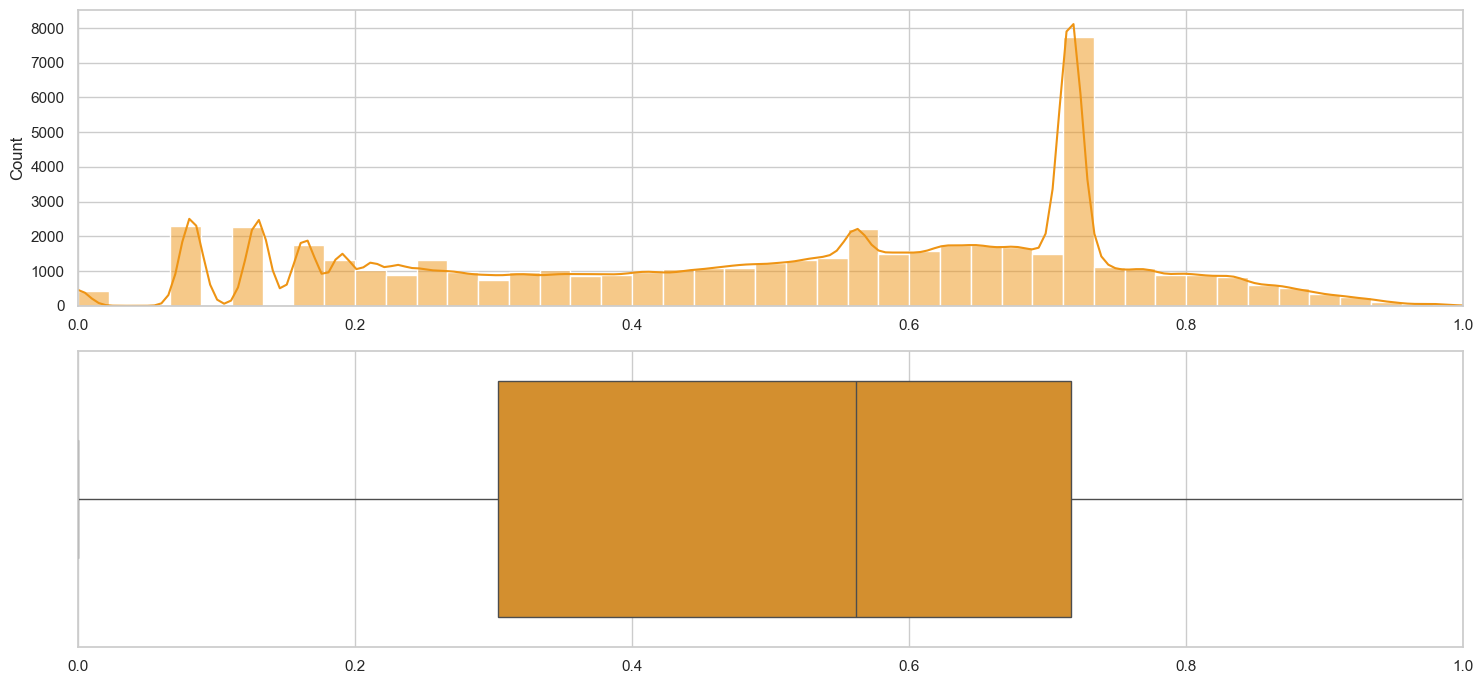

**ENQ_L12M**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.22
Std.dev: 0.19

Histograma y Boxplot de enq_L12m.


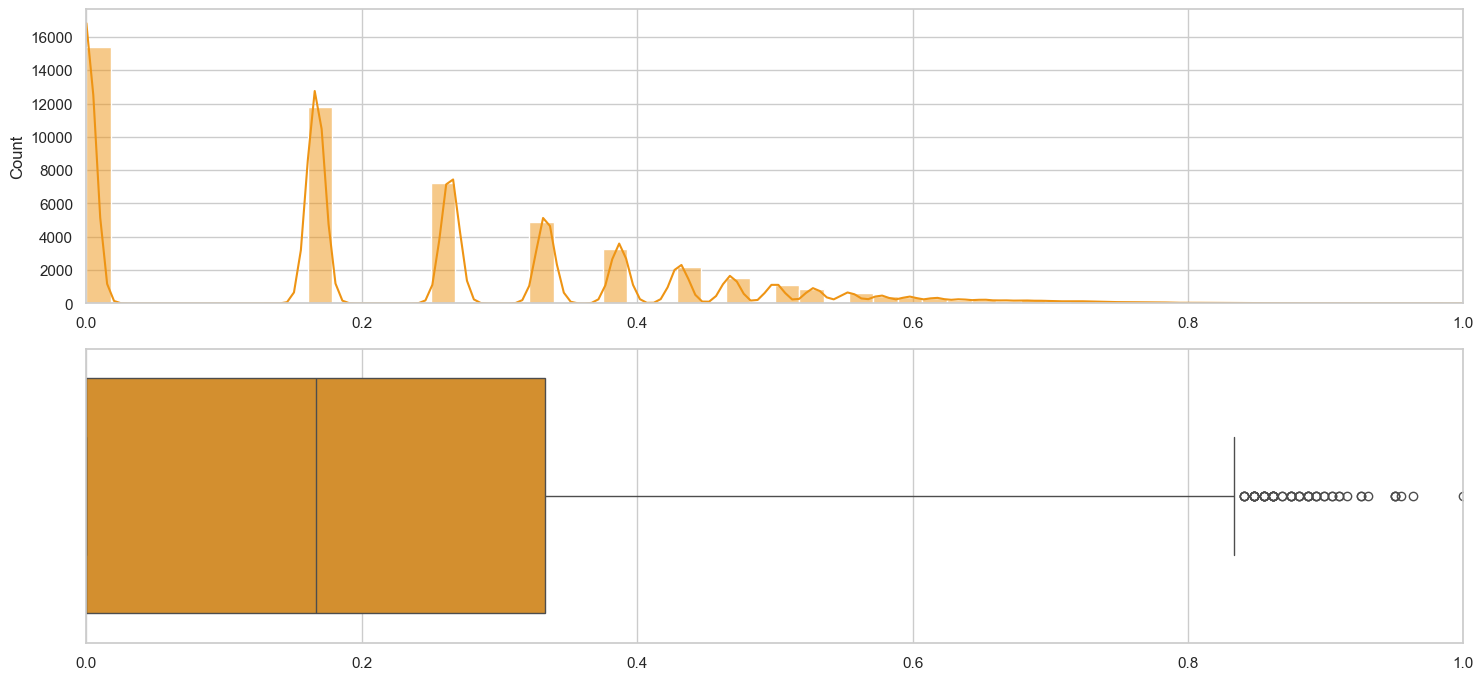

**AGE**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.28
Std.dev: 0.19

Histograma y Boxplot de AGE.


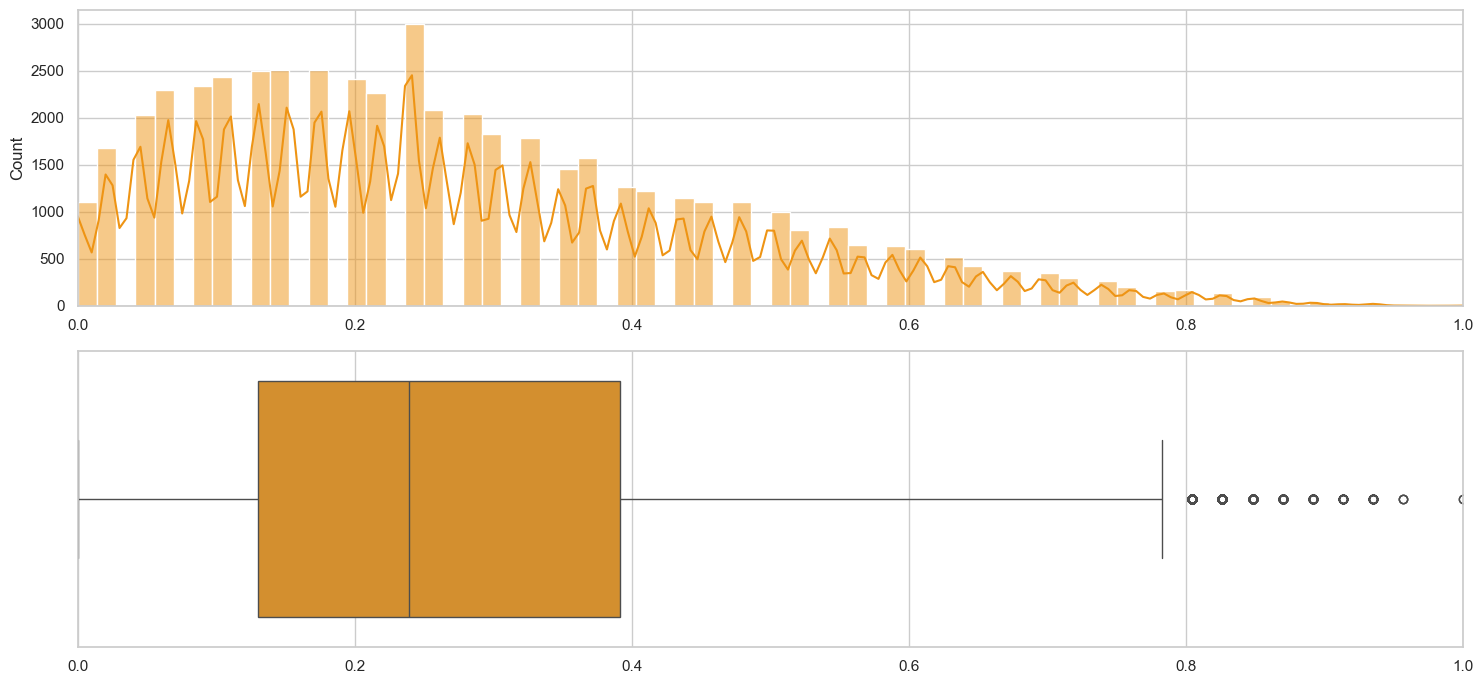

**NETMONTHLYINCOME**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.5
Std.dev: 0.07

Histograma y Boxplot de NETMONTHLYINCOME.


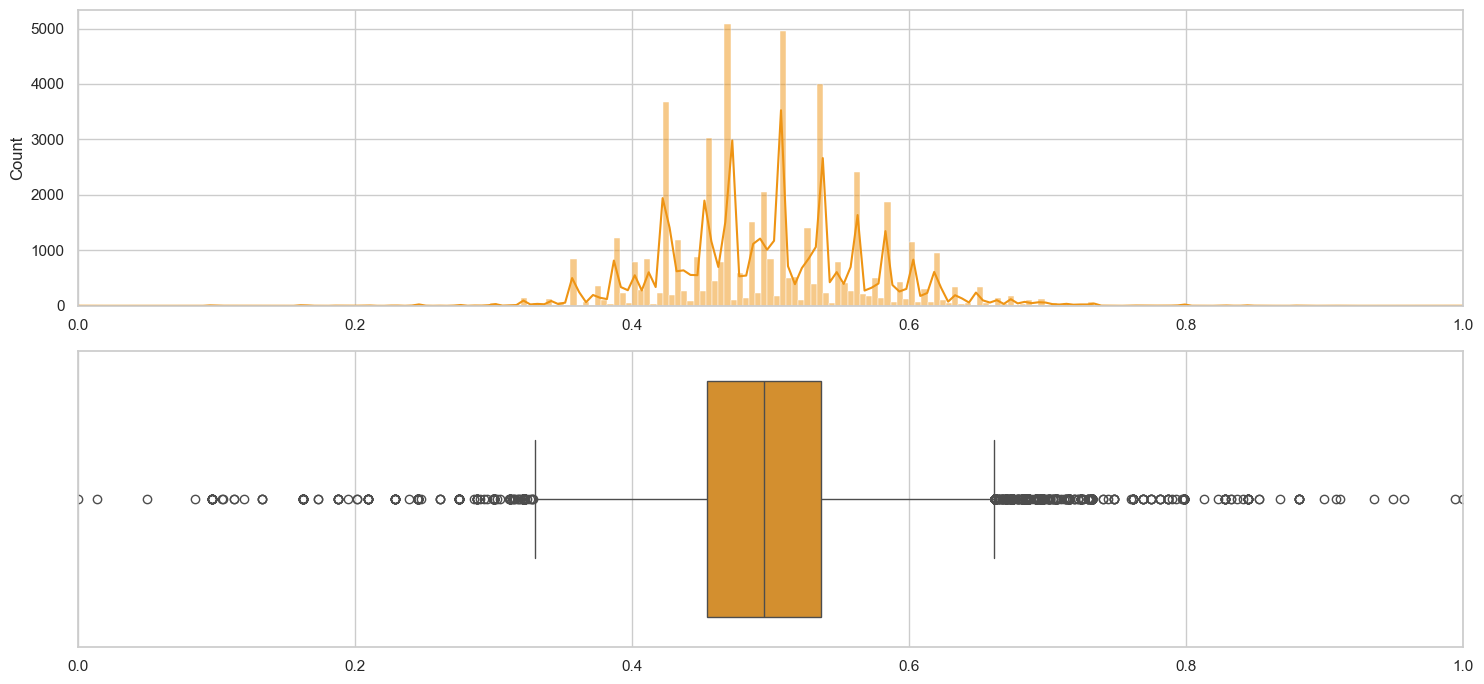

**TIME_WITH_CURR_EMPR**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.2
Std.dev: 0.13

Histograma y Boxplot de Time_With_Curr_Empr.


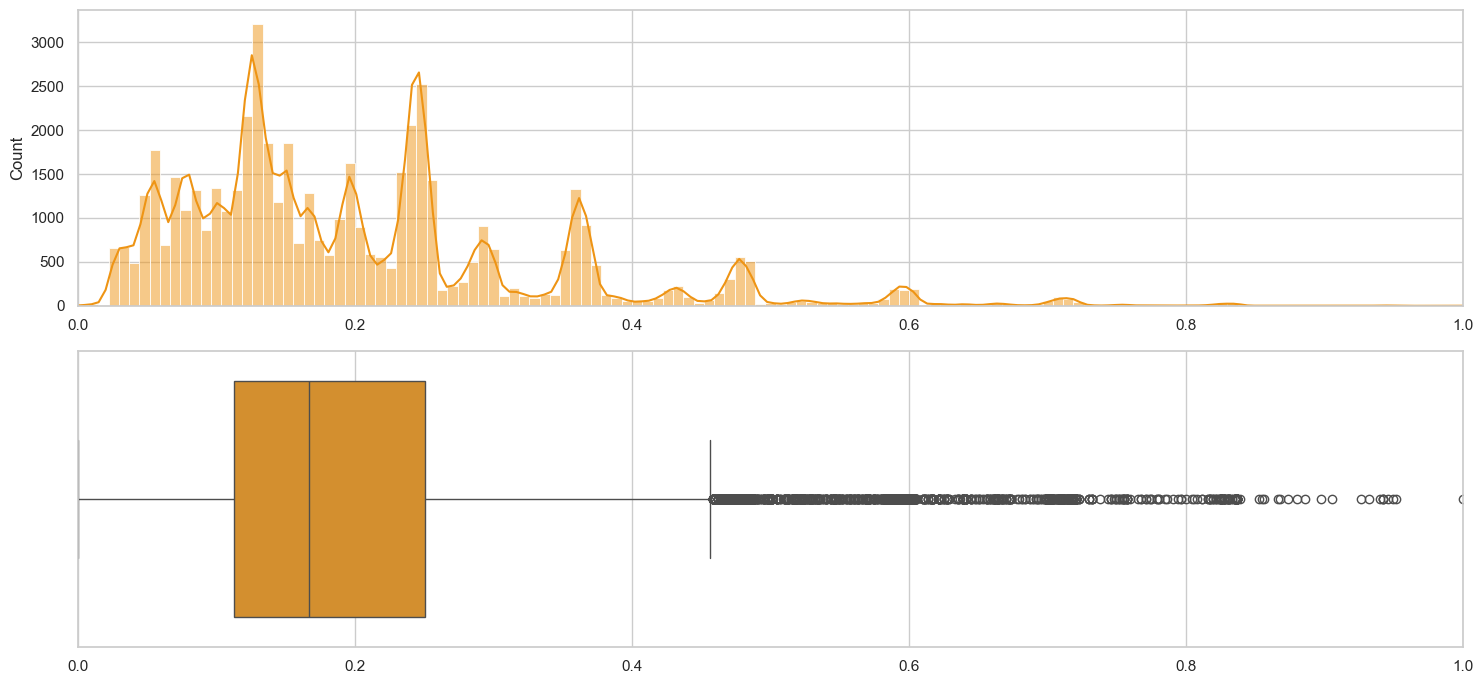

**PCT_OF_ACTIVE_TLS_EVER**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.57
Std.dev: 0.38

Histograma y Boxplot de pct_of_active_TLs_ever.


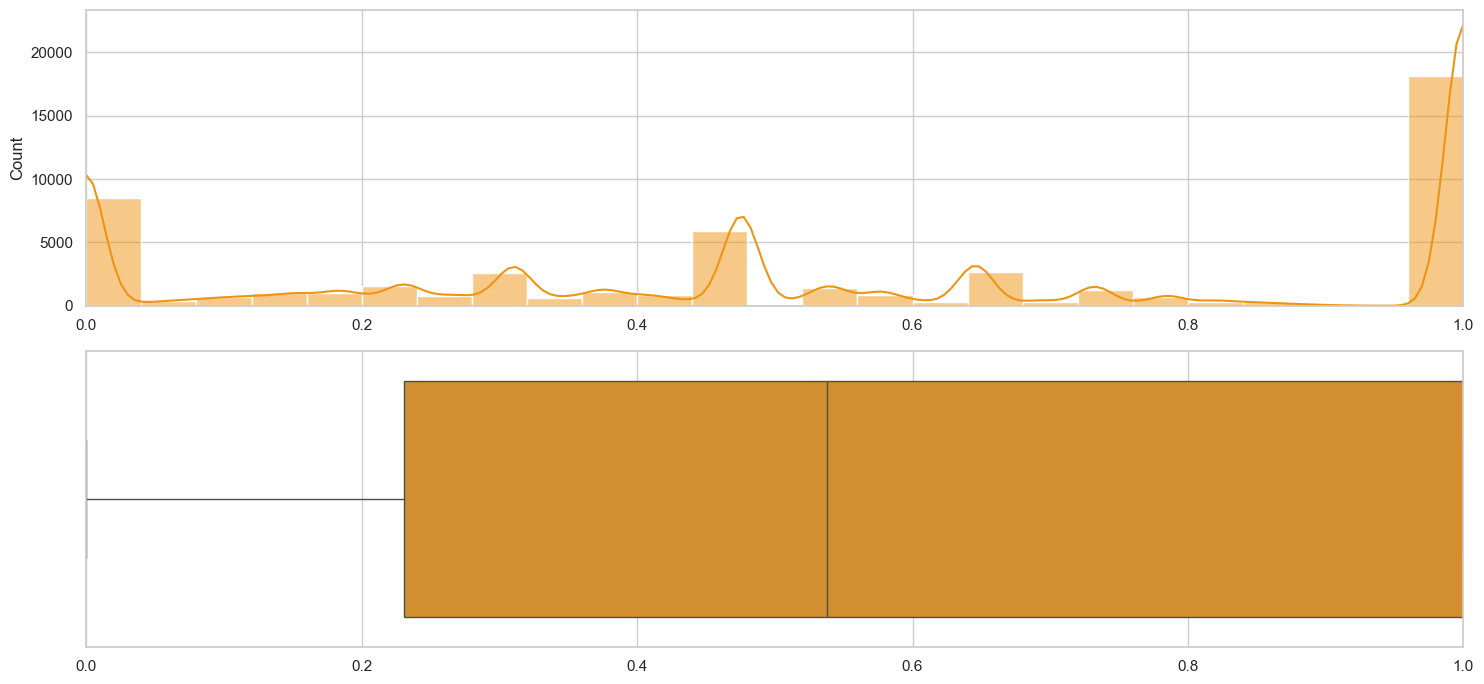

**PCT_OPENED_TLS_L6M_OF_L12M**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.35
Std.dev: 0.44

Histograma y Boxplot de pct_opened_TLs_L6m_of_L12m.


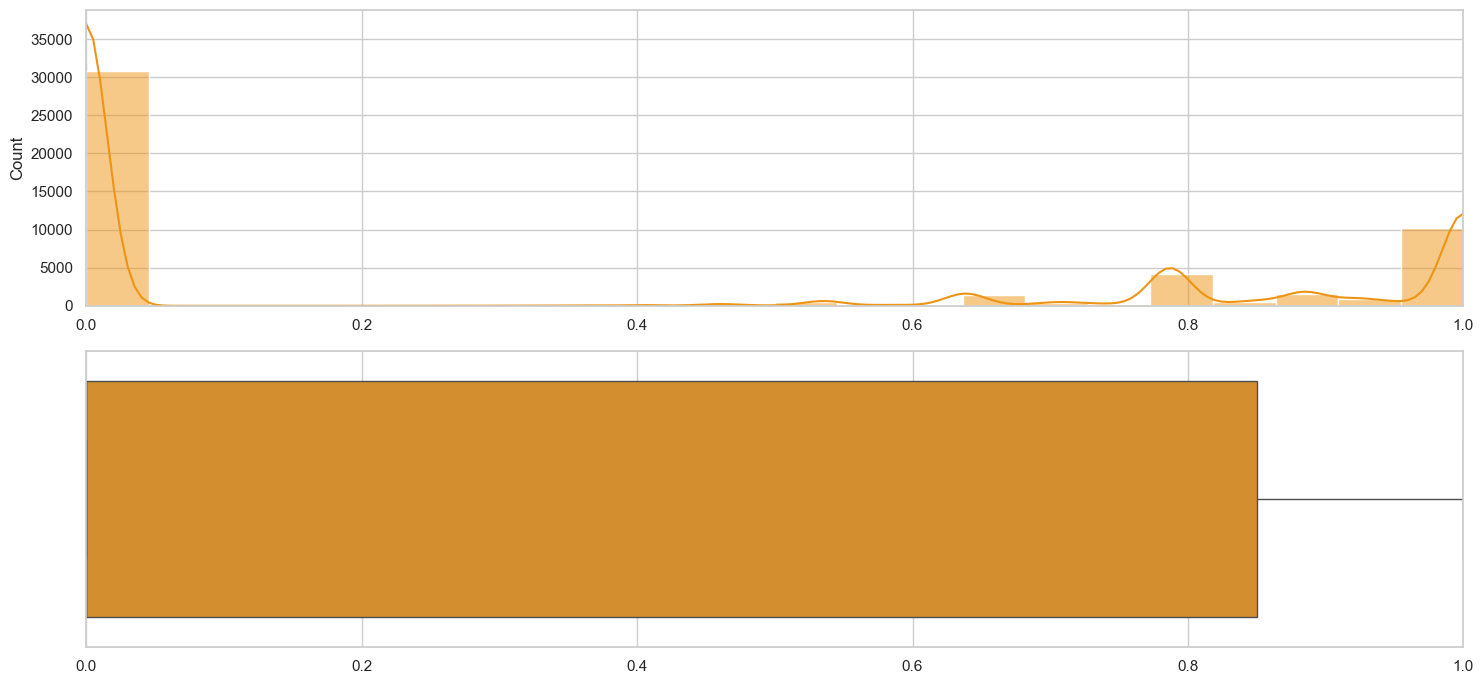

**PCT_CURRENTBAL_ALL_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.52
Std.dev: 0.37

Histograma y Boxplot de pct_currentBal_all_TL.


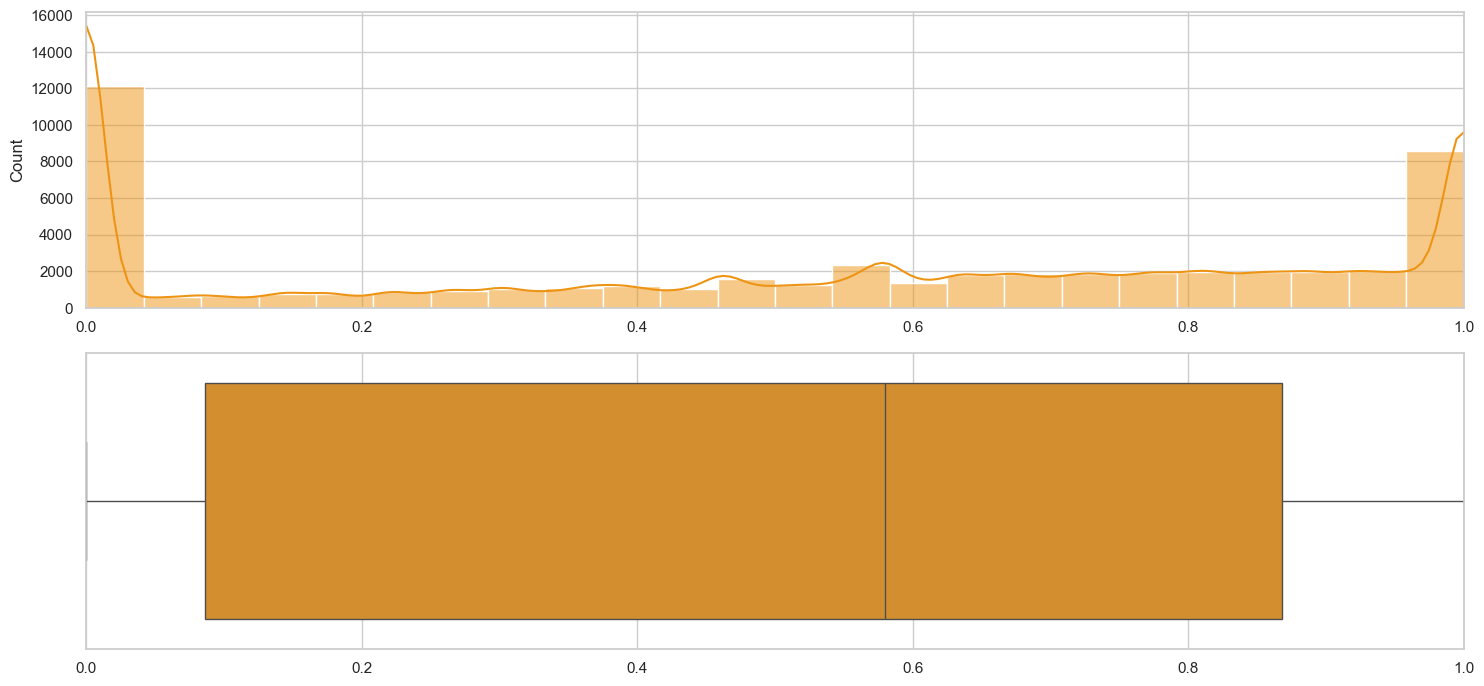

**CC_UTILIZATION**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.04
Std.dev: 0.19

Histograma y Boxplot de CC_utilization.


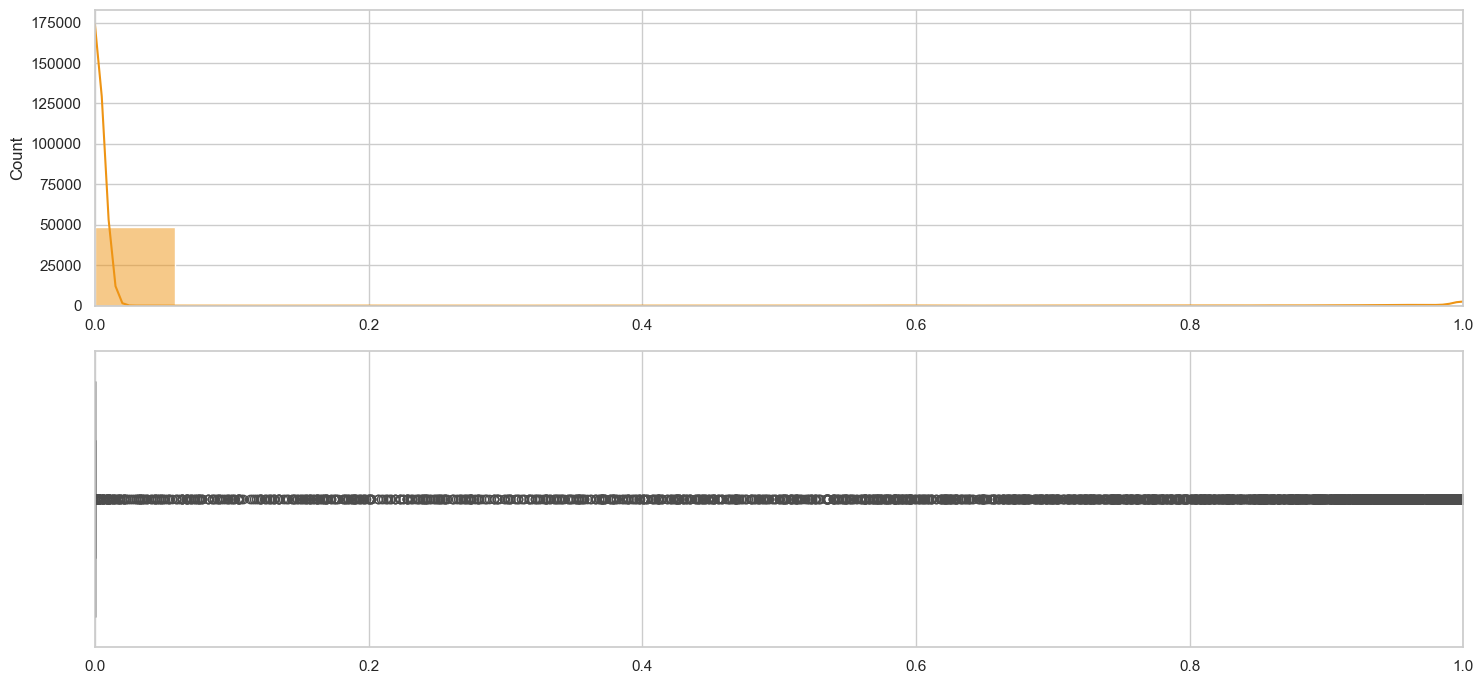

**PL_UTILIZATION**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.1
Std.dev: 0.28

Histograma y Boxplot de PL_utilization.


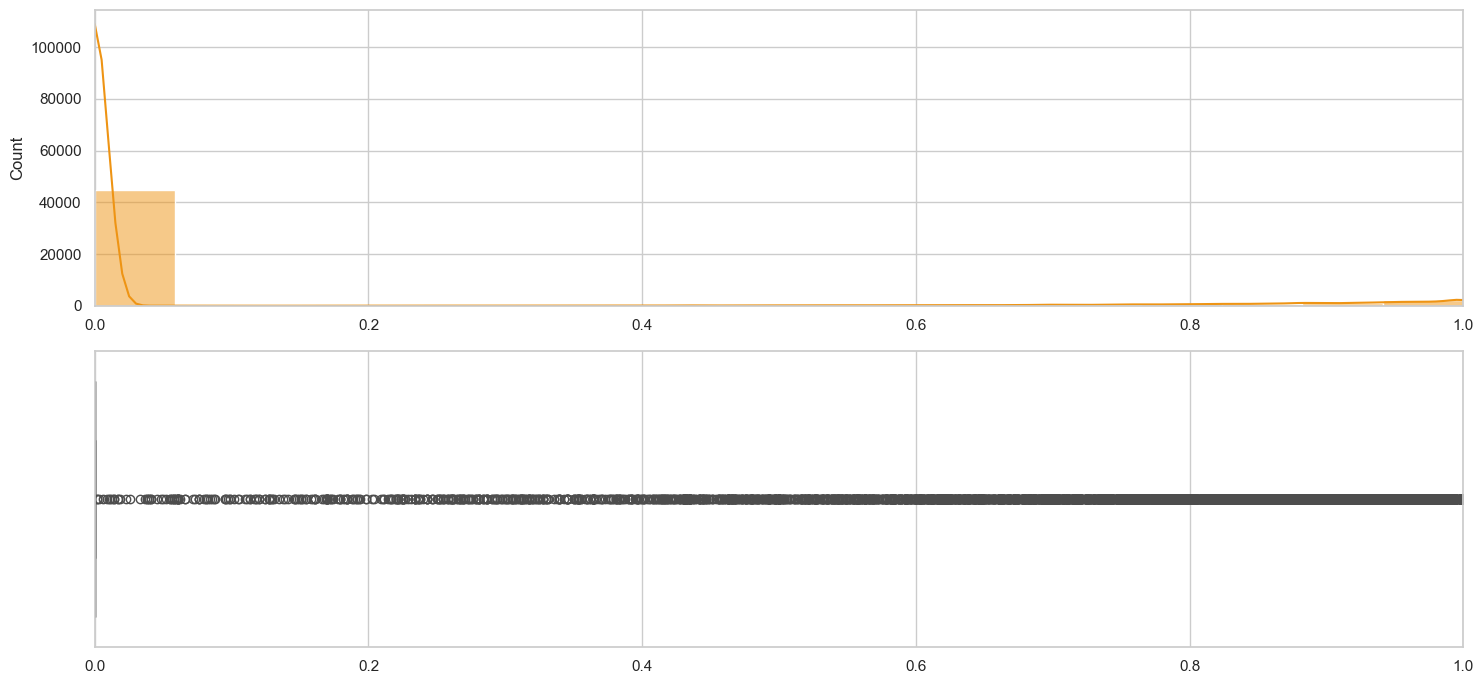

**PCT_PL_ENQ_L6M_OF_L12M**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.19
Std.dev: 0.38

Histograma y Boxplot de pct_PL_enq_L6m_of_L12m.


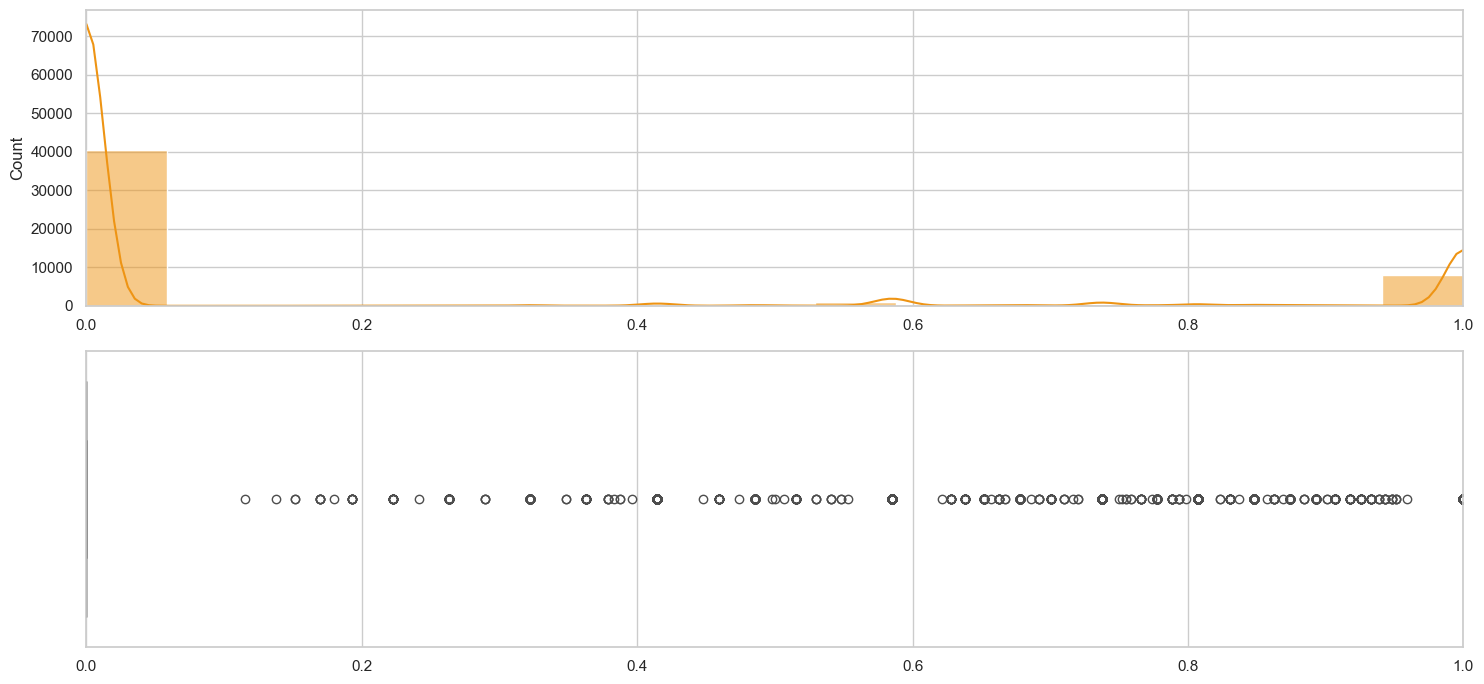

**PCT_CC_ENQ_L6M_OF_L12M**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.07
Std.dev: 0.24

Histograma y Boxplot de pct_CC_enq_L6m_of_L12m.


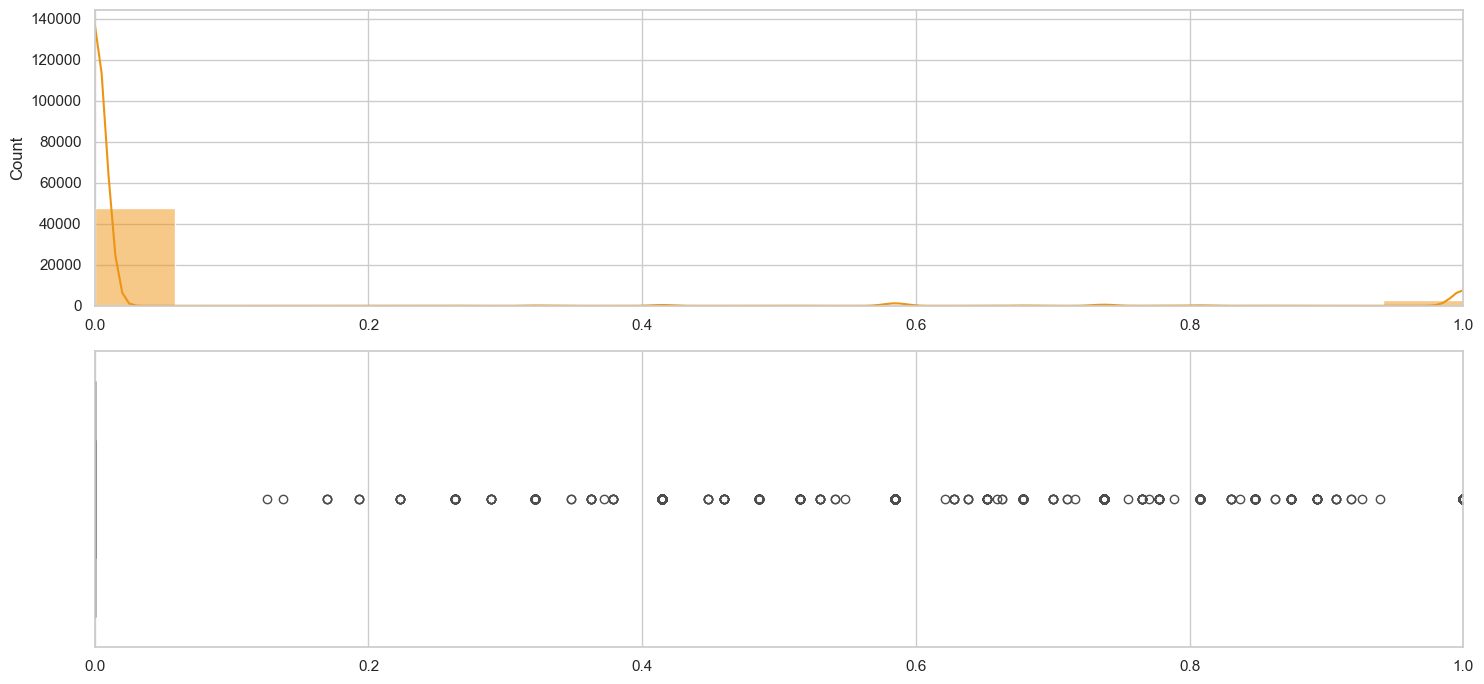

**CREDIT_SCORE**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.51
Std.dev: 0.09

Histograma y Boxplot de Credit_Score.


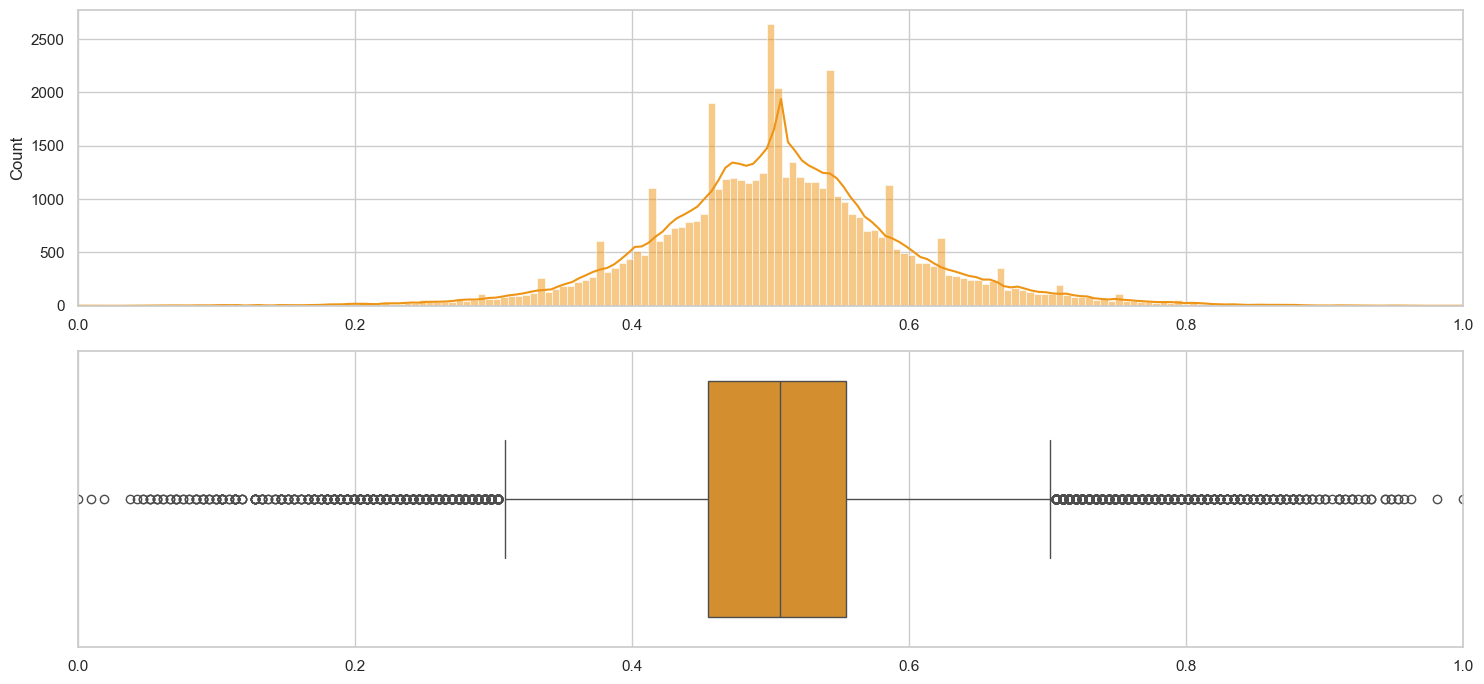

**NUM_TIMES_DPD**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.04
Std.dev: 0.12

Histograma y Boxplot de num_times_dpd.


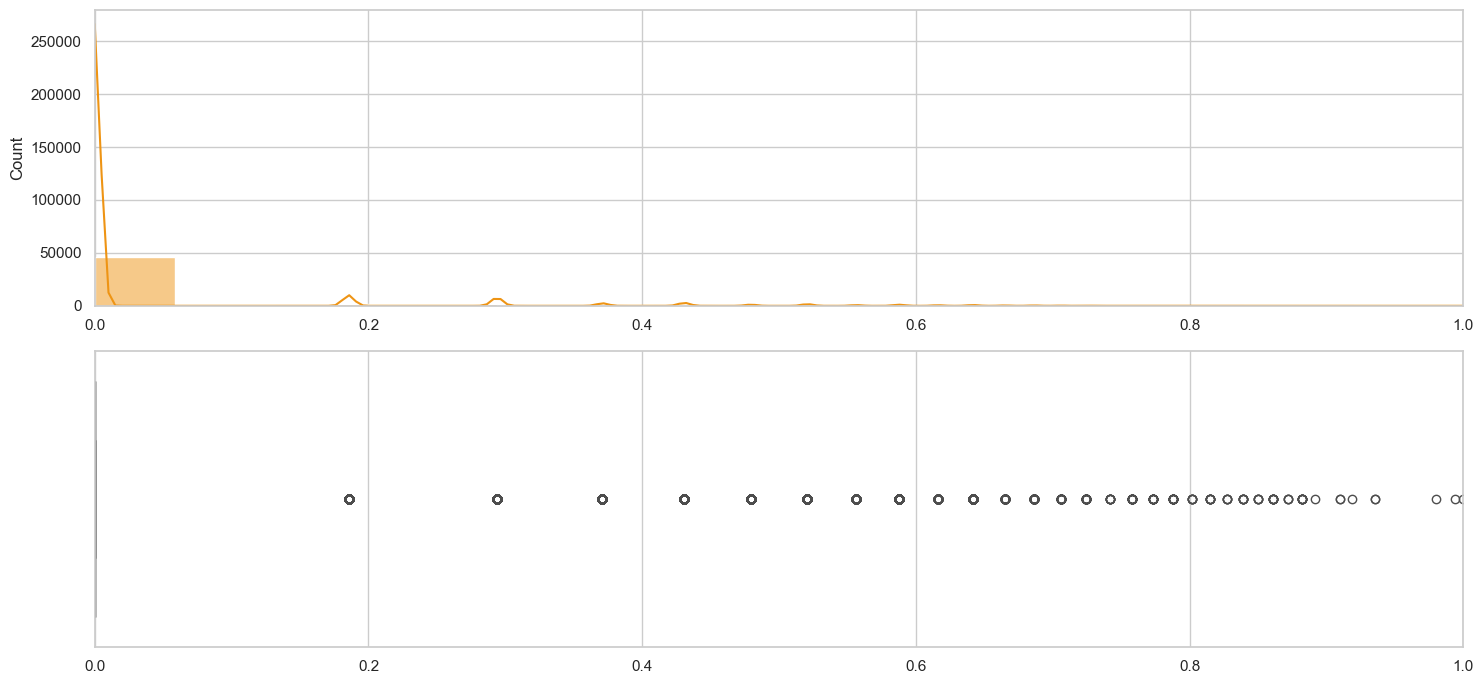

In [52]:
for v_num in numeric_features:
    Count_Quant(prueba, v_num)

## 4. Análisis Bivariante

### 4.1. Estudio de las correlaciones

#### 4.1.1. Variables Categóricas

In [49]:
def cramers_v(contingency_table):
    """
    Calcula Cramér's V para una tabla de contingencia.
    
    Args:
        contingency_table (pd.DataFrame): Tabla de contingencia entre dos variables.
    
    Returns:
        float: Valor de Cramér's V entre 0 y 1.
    """
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    k, r = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

def cramers_v_relationships(df, cat_features):
    """
    Evalúa la fuerza de la relación entre todas las variables categóricas de un dataset usando Cramér's V.
    
    Args:
        df (pd.DataFrame): Dataset con las variables categóricas.
        cat_features (list): Lista de nombres de columnas categóricas en el dataset.
    
    Returns:
        pd.DataFrame: DataFrame con las combinaciones de variables y sus valores de Cramér's V.
    """
    results = []
    for var1, var2 in combinations(cat_features, 2):
        contingency_table = pd.crosstab(df[var1], df[var2])
        cramers_value = cramers_v(contingency_table)
        results.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'Cramérs V': cramers_value
        })
    
    return pd.DataFrame(results)

In [50]:
resultados_cramers_v = cramers_v_relationships(external, cat_features)
print(resultados_cramers_v[resultados_cramers_v['Cramérs V'] >= 0.3].sort_values(by=['Cramérs V'], ascending=False))

        Variable 1       Variable 2  Cramérs V
40         GL_Flag  first_prod_enq2   0.442448
28         CC_Flag  first_prod_enq2   0.436742
27         CC_Flag   last_prod_enq2   0.376139
42  last_prod_enq2  first_prod_enq2   0.339100
39         GL_Flag   last_prod_enq2   0.315898


Tras esta prueba estadística llegamos a la conclusión de que eliminaremos la variable **first_prod_enq2**, debido a:

    - La interpretación de la prueba de Cramér especifíca que por defecto los resultados mayores que 0.3.
    - Disponemos de una variable que expresa carácterísticas similares y con la que tambien comparte una relación significativa, **last_prod_enq2** 

In [51]:
external = external.drop(columns='first_prod_enq2')

#### 4.1.2. Variables Numéricas

Para el análisis de las correlaciones, emplearemos dos métodos distintos. En primer lugar, utilizaremos la correlación de Pearson, que nos permitirá identificar las relaciones lineales entre las variables. Posteriormente, recurriremos al método de Spearman, el cual es más adecuado para detectar relaciones no lineales. Con el fin de controlar las posibles multicolinealidades, aplicaremos un filtro moderado, estableciendo un umbral de 0.85, para evitar la presencia de correlaciones excesivas que puedan distorsionar los resultados del modelo.

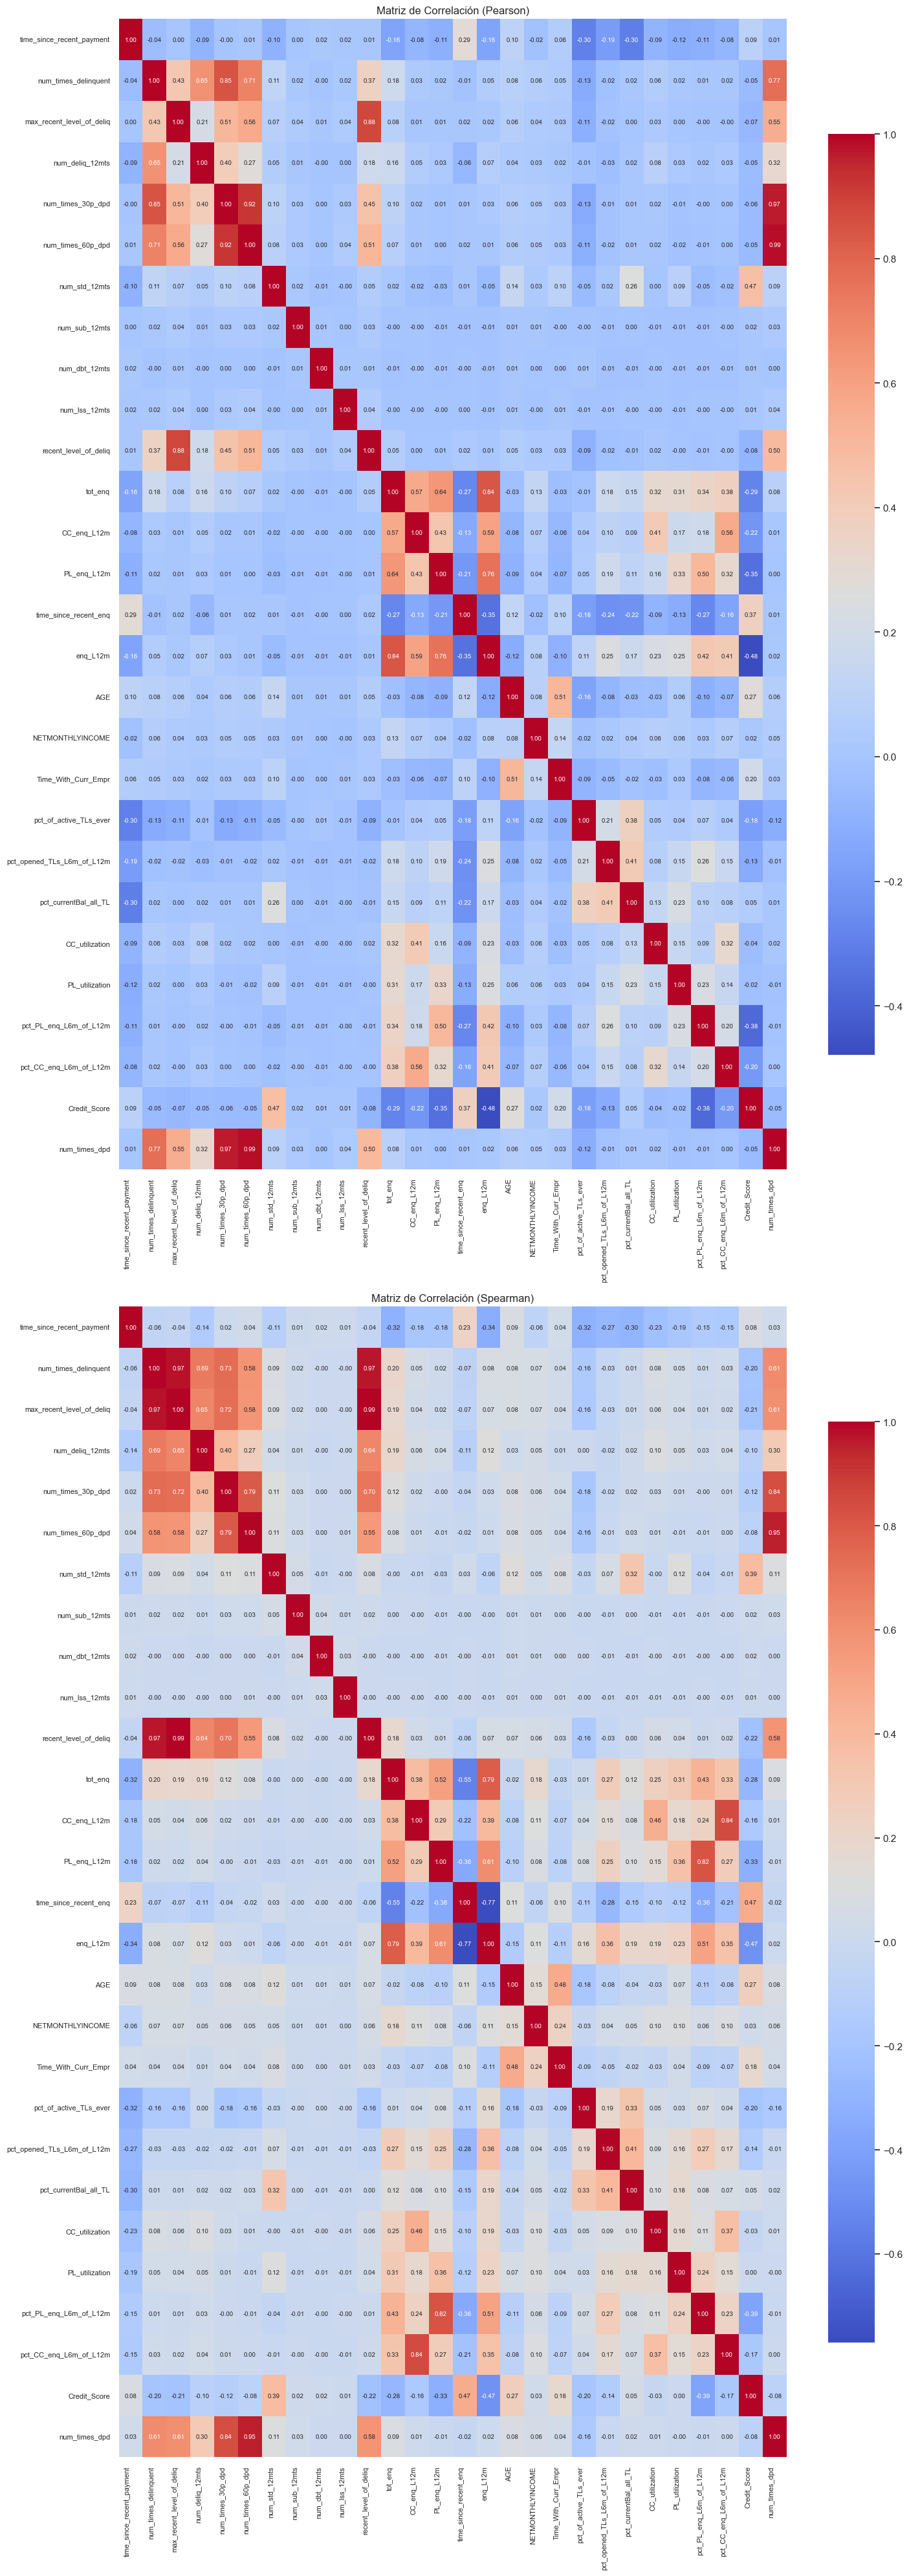

In [52]:
# Lista de métodos de correlación
methods = ['pearson', 'spearman']

# Configuración de la figura: 3 filas, 1 columna
fig, axes = plt.subplots(2, 1, figsize=(15, 40), sharey=True)

# Iterar sobre los métodos y generar las matrices de correlación
for i, method in enumerate(methods):
    # Calcular la matriz de correlación
    correlation_matrix = external[numeric_features].corr(method=method)
    
    # Crear el heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True,                  # Mostrar los valores en la matriz
        cmap='coolwarm',             # Colormap
        fmt=".2f",                   # Formato de los valores
        ax=axes[i],                  # Gráfico actual
        annot_kws={"size": 7},       # Tamaño de los valores
        cbar_kws={'shrink': 0.8}     # Ajustar barra de color
    )
    
    # Personalizar etiquetas de los ejes
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=8)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=8)
    axes[i].set_title(f'Matriz de Correlación ({method.capitalize()})', fontsize=12)

# Ajustar el diseño general de la figura
plt.tight_layout()

# Guardar la figura como archivo para inspeccionarla mejor
plt.savefig("correlation_matrices.png", dpi=300, bbox_inches="tight")

# Mostrar la figura
plt.show()

In [53]:
# Definir el umbral de correlación y lista de métodos
threshold = 0.85
methods = ['pearson', 'spearman']

# Crear una máscara de correlaciones combinadas
correlation_matrix = np.zeros((len(numeric_features), len(numeric_features)))

for met in methods:
    corr_mat = external[numeric_features].corr(method=met).abs()
    correlation_matrix = np.maximum(correlation_matrix, corr_mat)

# Crear DataFrame de la matriz combinada
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_features, columns=numeric_features)

# Identificar y eliminar columnas con alta correlación
columns_to_drop = set()
while True:
    # Encontrar la variable con más correlaciones altas
    high_corr = (correlation_df > threshold) & (correlation_df != 1.0)
    high_corr_sum = high_corr.sum().sort_values(ascending=False)

    if high_corr_sum.max() == 0:
        break  # Detener si no hay correlaciones altas restantes

    # Eliminar la variable más problemática (con más correlaciones altas)
    col_to_remove = high_corr_sum.idxmax()
    columns_to_drop.add(col_to_remove)
    
    # Eliminar la columna y fila de la matriz de correlación
    correlation_df.drop(index=col_to_remove, columns=col_to_remove, inplace=True)

print(f"Tamaño original: {external.shape}")
print(f"Columnas a eliminar: {columns_to_drop}")

# Eliminar columnas en el DataFrame
external = external.drop(columns=columns_to_drop)

print(f"Tamaño después de filtrar: {external.shape}")

Tamaño original: (51336, 38)
Columnas a eliminar: {'num_times_delinquent', 'max_recent_level_of_deliq', 'num_times_60p_dpd', 'num_times_30p_dpd'}
Tamaño después de filtrar: (51336, 34)


### 4.2. Target VS Variables Categóricas

In [54]:
cat_features = external.select_dtypes(include=['bool', 'object']).columns.to_list()

In [55]:
def Analyze_Categorical_Features_Bars(df, cat_feat, target_column):
    print(f"\nAnálisis de variables categóricas respecto a la columna objetivo '{target_column}':\n")

    for v in cat_features:
        if v == target_column:
            continue

        else:
            # Estadísticos descriptivos
            print(f"\nVariable categórica: {v}")
            print(f"Número de categorías únicas: {df[v].nunique()}")
            print(f"Frecuencia de las categorías principales:\n{df[v].value_counts().head()}\n")

            # Crear tabla cruzada
            cross_tab = pd.crosstab(df[v], df[target_column])

            # Graficar barras apiladas
            cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
            plt.title(f'Distribución de {v} vs {target_column}')
            plt.xlabel(v)
            plt.ylabel('Conteo')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title=target_column)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

In [56]:
# Analyze_Categorical_Features_Bars(external, cat_features, 'Approved_Flag')

In [57]:
print(numeric_features)

Index(['time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_12mts', 'num_times_30p_dpd',
       'num_times_60p_dpd', 'num_std_12mts', 'num_sub_12mts', 'num_dbt_12mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'AGE',
       'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'PL_utilization', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m',
       'Credit_Score', 'num_times_dpd'],
      dtype='object')


### 4.3. Target VS Variables Numéricas

In [58]:
external.describe()

PROSPECTID  time_since_recent_payment  num_deliq_12mts  \
count  51336.000000               51336.000000     51336.000000   
mean   25668.500000                 246.197970         0.480053   
std    14819.571046                 465.373293         1.522210   
min        1.000000                   2.000000         0.000000   
25%    12834.750000                  52.000000         0.000000   
50%    25668.500000                  73.000000         0.000000   
75%    38502.250000                 188.000000         0.000000   
max    51336.000000                6065.000000        28.000000   

       num_std_12mts  num_sub_12mts  num_dbt_12mts  num_lss_12mts  \
count   51336.000000   51336.000000   51336.000000   51336.000000   
mean        3.319444       0.009292       0.004130       0.002844   
std         7.518414       0.233403       0.179885       0.185349   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         3.000000       0.000000       0.000000       0.000000   
max       122.000000      20.000000      12.000000      30.000000   

       recent_level_of_deliq       tot_enq   CC_enq_L12m   PL_enq_L12m  \
count           51336.000000  51336.000000  51336.000000  51336.000000   
mean               11.266090      4.762681      0.228728      0.664368   
std                46.100309      5.954877      0.939364      1.675665   
min                 0.000000      1.000000      0.000000      0.000000   
25%                 0.000000      1.000000      0.000000      0.000000   
50%                 0.000000      3.000000      0.000000      0.000000   
75%                 7.000000      6.000000      0.000000      1.000000   
max               900.000000    176.000000     24.000000     44.000000   

       time_since_recent_enq      enq_L12m           AGE  NETMONTHLYINCOME  \
count           51336.000000  51336.000000  51336.000000      5.133600e+04   
mean              281.048606      2.640350     33.758532      2.642419e+04   
std               436.275644      4.072401      8.816364      2.002711e+04   
min                 0.000000      0.000000     21.000000      0.000000e+00   
25%                11.000000      0.000000     27.000000      1.800000e+04   
50%               116.000000      1.000000     32.000000      2.300000e+04   
75%               430.578429      3.000000     39.000000      3.000000e+04   
max              4768.000000     87.000000     77.000000      2.500000e+06   

       Time_With_Curr_Empr  pct_of_active_TLs_ever  \
count         51336.000000            51336.000000   
mean            104.178569                0.577542   
std              69.457419                0.379867   
min               0.000000                0.000000   
25%              57.000000                0.250000   
50%              86.000000                0.556000   
75%             129.000000                1.000000   
max             580.000000                1.000000   

       pct_opened_TLs_L6m_of_L12m  pct_currentBal_all_TL  CC_utilization  \
count                51336.000000           51336.000000    51336.000000   
mean                     0.302955               0.534387        0.043121   
std                      0.406049               0.378258        0.186490   
min                      0.000000               0.000000        0.000000   
25%                      0.000000               0.089000        0.000000   
50%                      0.000000               0.617000        0.000000   
75%                      0.643000               0.888000        0.000000   
max                      1.000000               1.000000        1.000000   

       PL_utilization  pct_PL_enq_L6m_of_L12m  pct_CC_enq_L6m_of_L12m  \
count    51336.000000            51336.000000            51336.000000   
mean         0.101004                0.190414                0.065182   
std          0.272598 

In [59]:
# Creamos una variable con las variables numéricas
numeric_features = external.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID'])

In [55]:
def Analyze_Numeric_Features_Density(df, num_features, target_column):
    """
    Analiza variables numéricas respecto a una variable objetivo categórica
    mediante diagramas de densidad, con transformación de Yeo-Johnson y representación
    de la media y mediana globales.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - num_features: Lista de variables numéricas en el DataFrame.
    - target_column: Nombre de la variable objetivo categórica.
    """

    print(f"Análisis de variables numéricas respecto a la columna objetivo '{target_column}':\n")

    for v_num in num_features:
        if v_num == target_column:
            continue

        # # Aplicar transformación de Yeo-Johnson
        # quant_feat = np.log(df[v_num]) + 1e-10
        quant_feat = df[v_num]

        # Convertir a Series para cálculo de estadísticas
        transformed_series = pd.Series(quant_feat)
        mean_value = transformed_series.mean()
        median_value = transformed_series.median()

        # Crear gráfico de densidad
        plt.figure(figsize=(12, 6))
        ax = sns.kdeplot(
            data=df,
            x=quant_feat,
            hue=target_column,
            fill=True,
            common_norm=False,
            alpha=0.4,
            palette='Set2'
        )

        # Graficar la media y la mediana
        plt.axvline(mean_value, color='blue', linestyle='--', alpha=0.8, label='Media (Global)')
        plt.axvline(median_value, color='orange', linestyle=':', alpha=0.8, label='Mediana (Global)')

        # Configurar leyenda personalizada
        handles, labels = ax.get_legend_handles_labels()
        target_labels = sorted(df[target_column].unique())
        custom_handles = [
            Line2D([0], [0], color=sns.color_palette('Set2')[i], lw=3, label=str(label))
            for i, label in enumerate(target_labels)
        ]

        plt.legend(
            handles=custom_handles + handles[-2:],
            title='Leyenda',
            loc='upper right'
        )

        # Configuración del gráfico
        plt.title(f'Distribución transformada ({v_num}) por categorías de {target_column}')
        plt.xlabel(f'Transformación ({v_num})')
        plt.ylabel('Densidad')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


Análisis de variables numéricas respecto a la columna objetivo 'Approved_Flag':



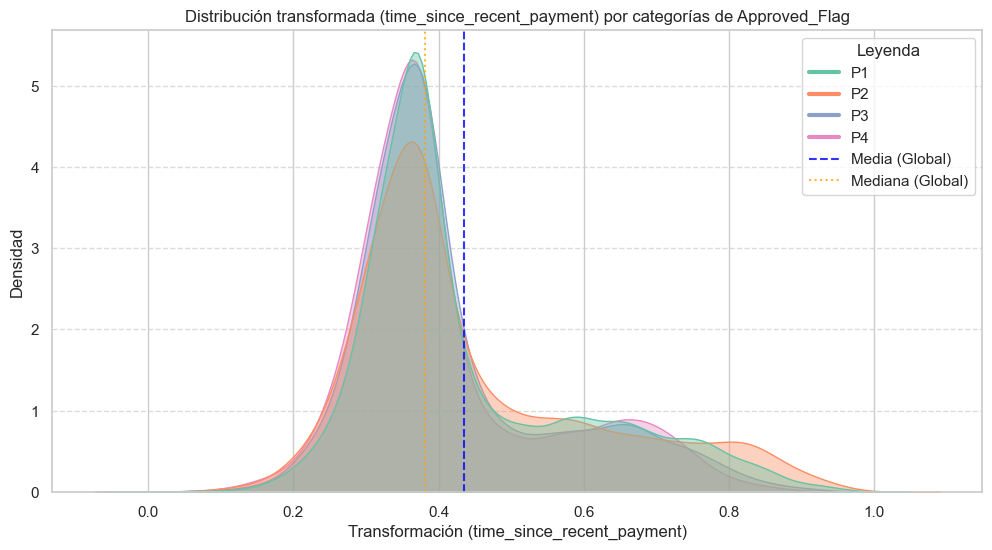

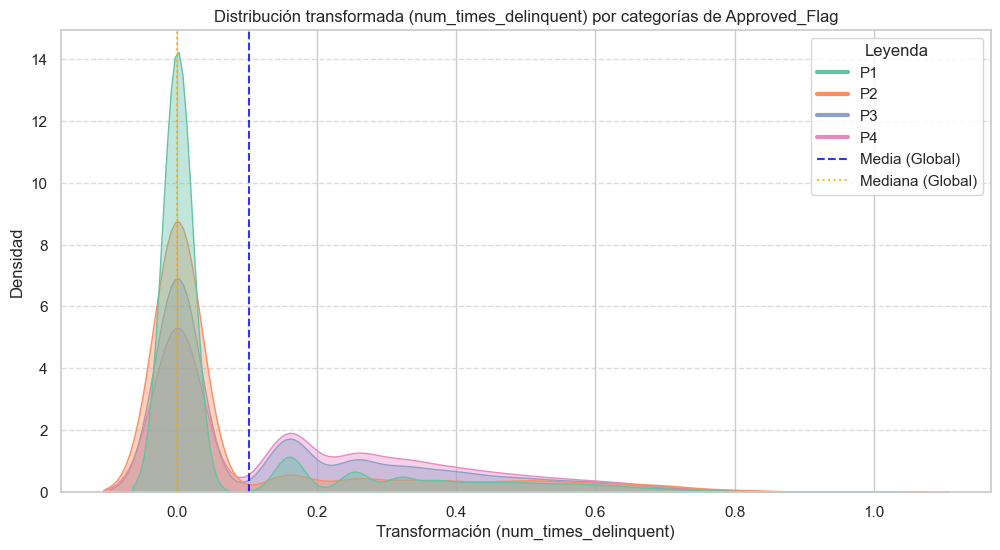

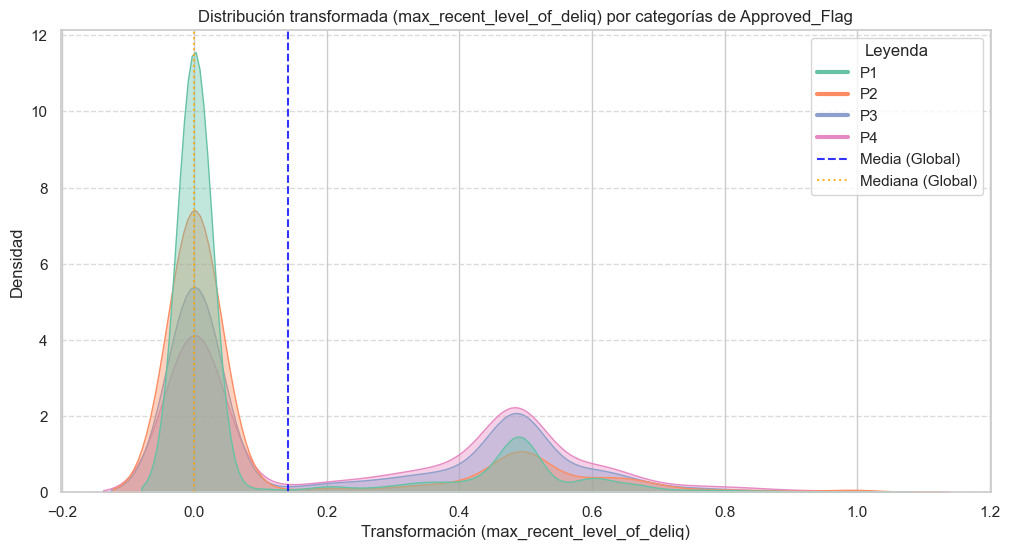

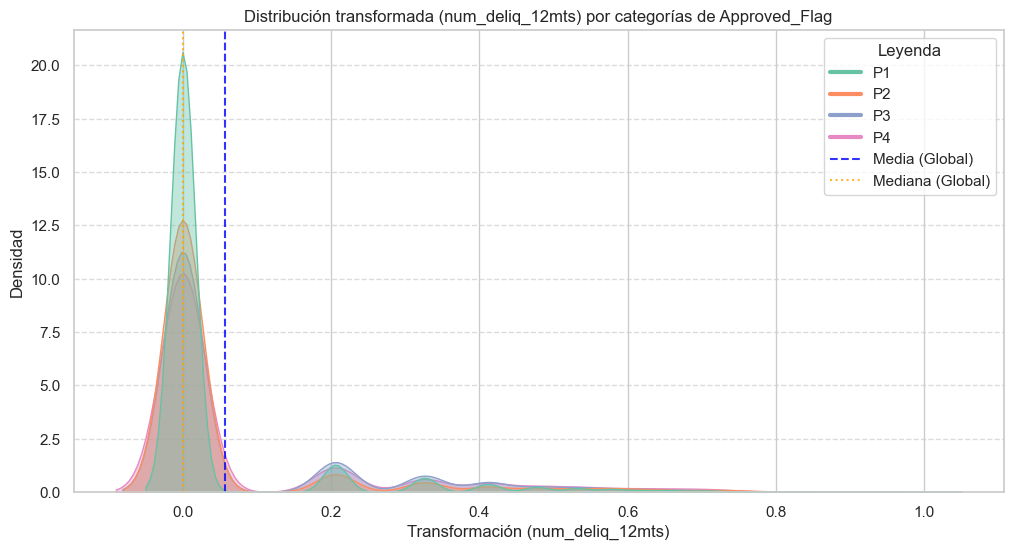

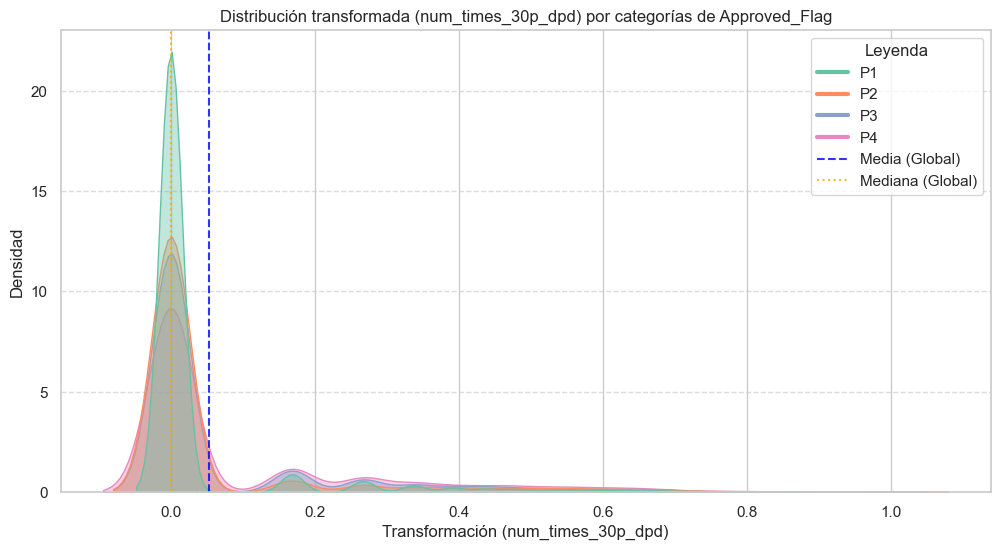

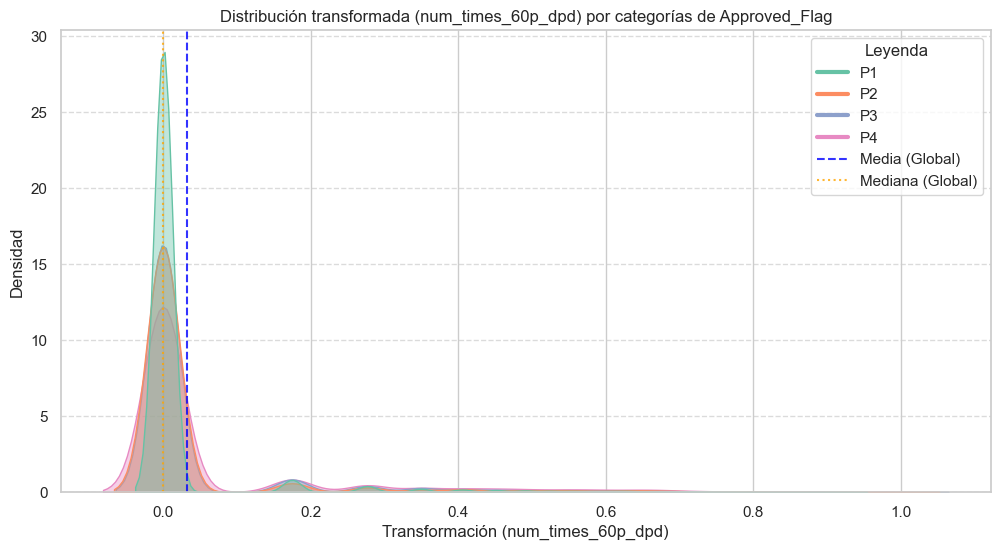

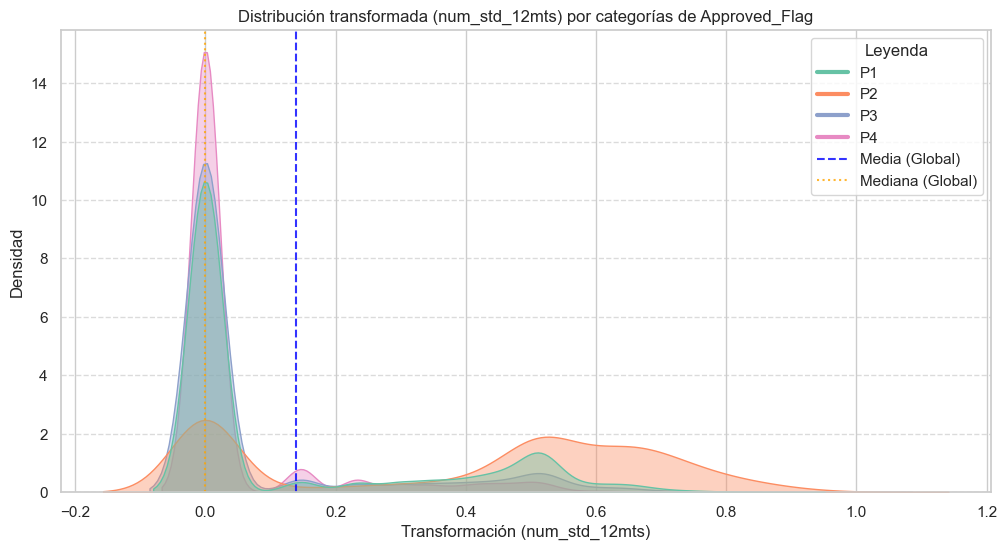

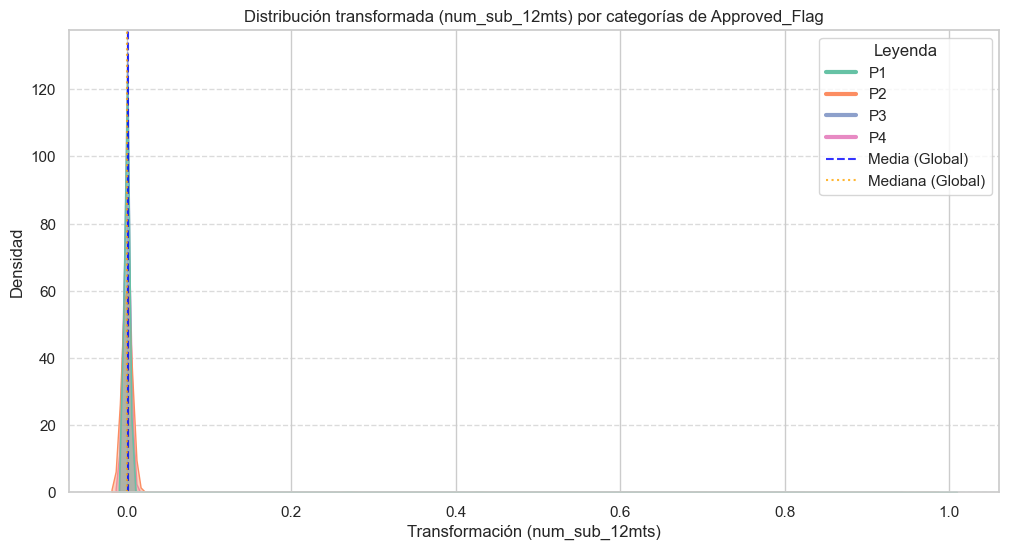

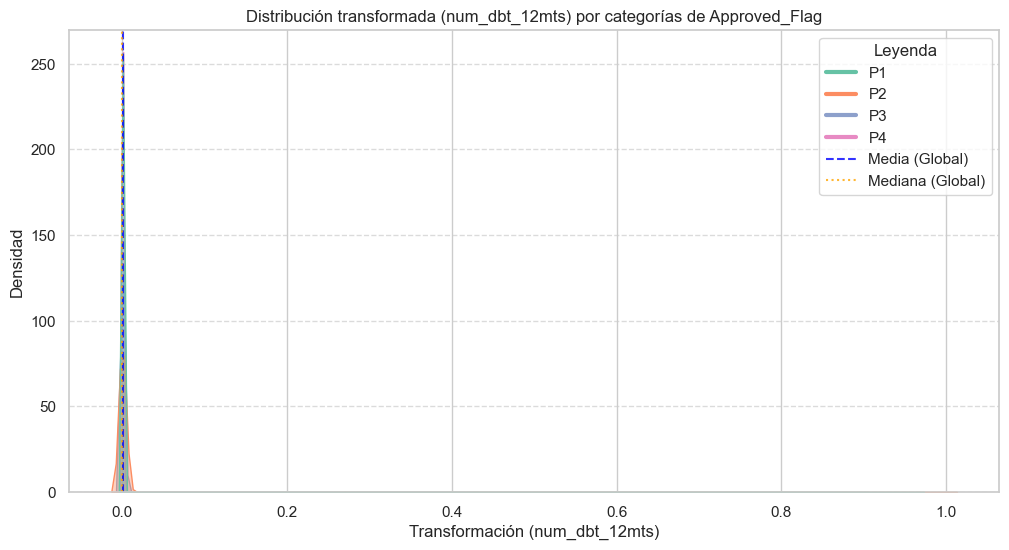

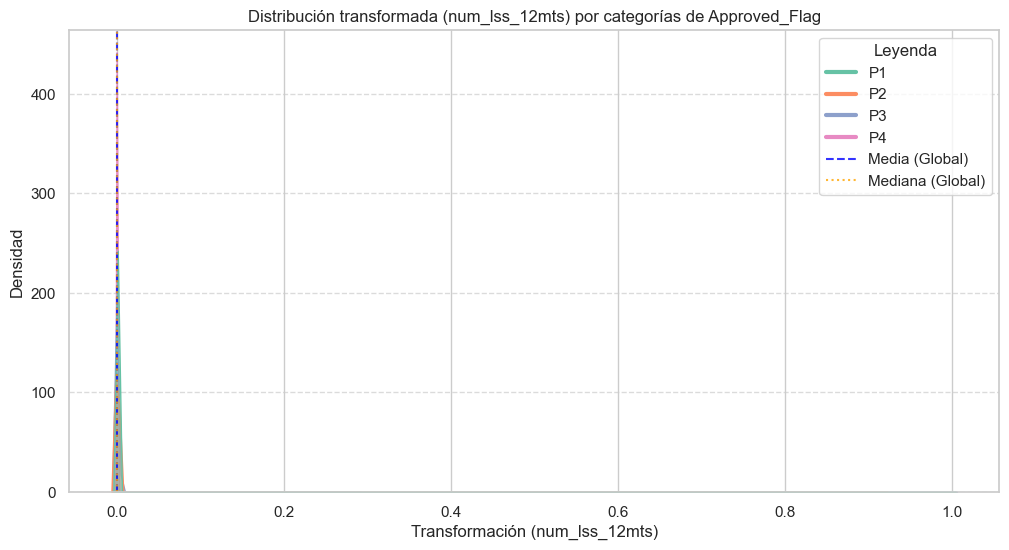

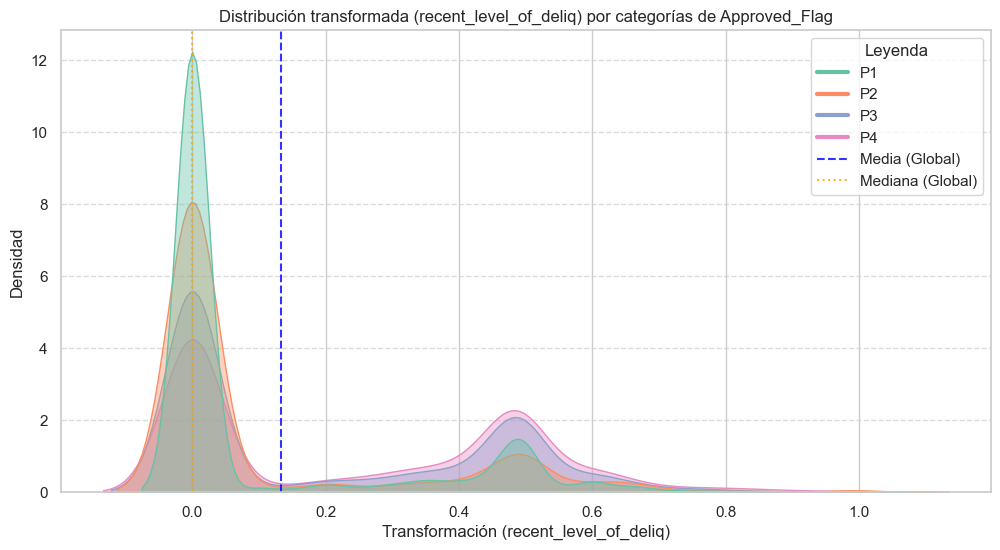

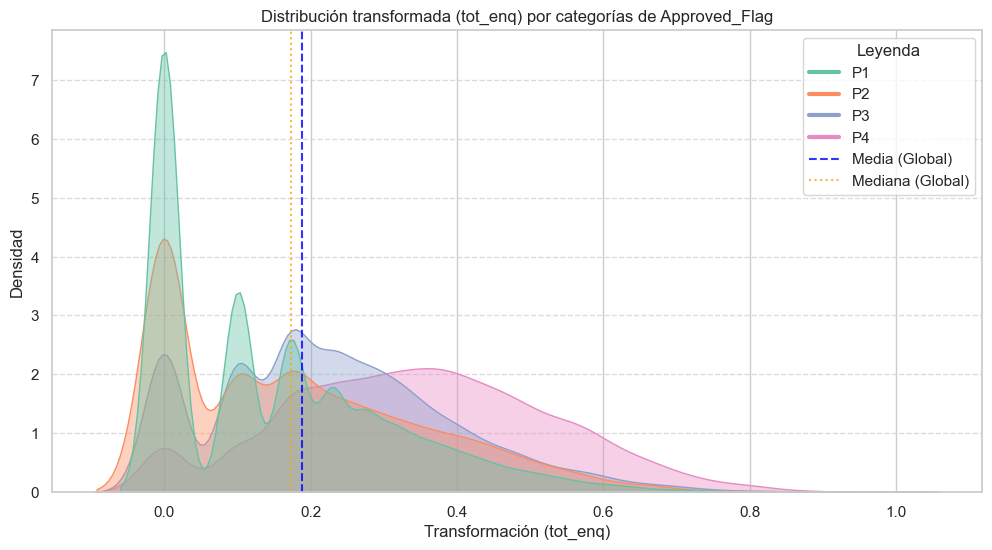

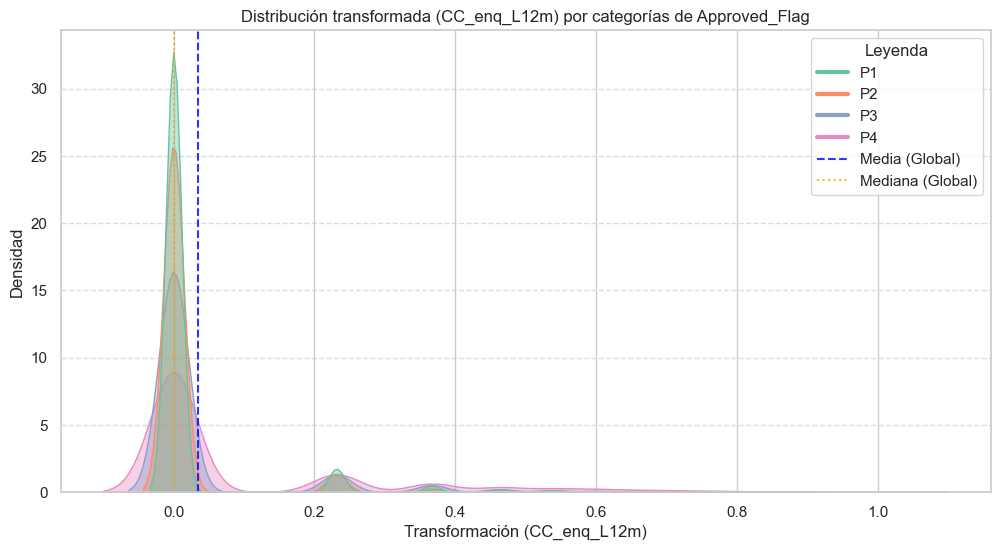

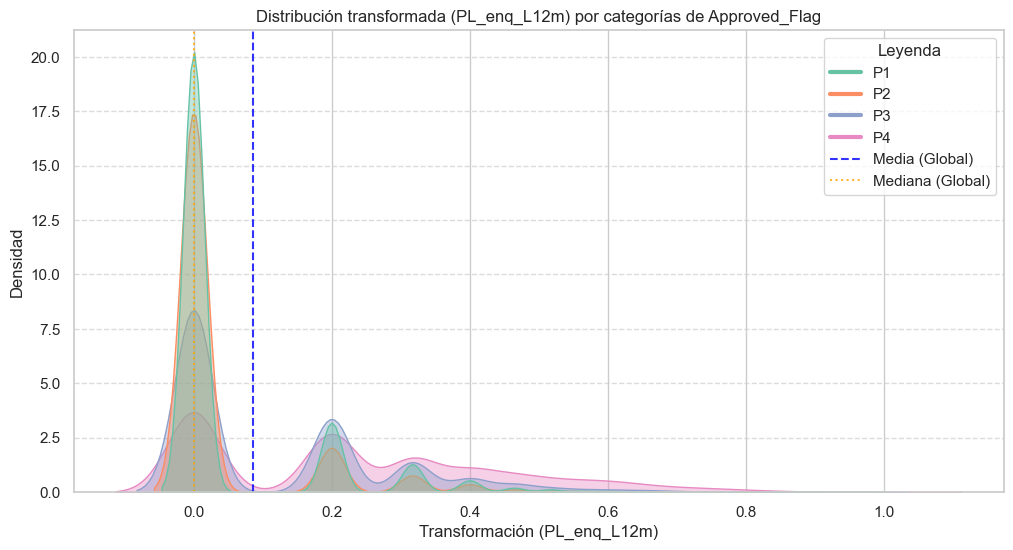

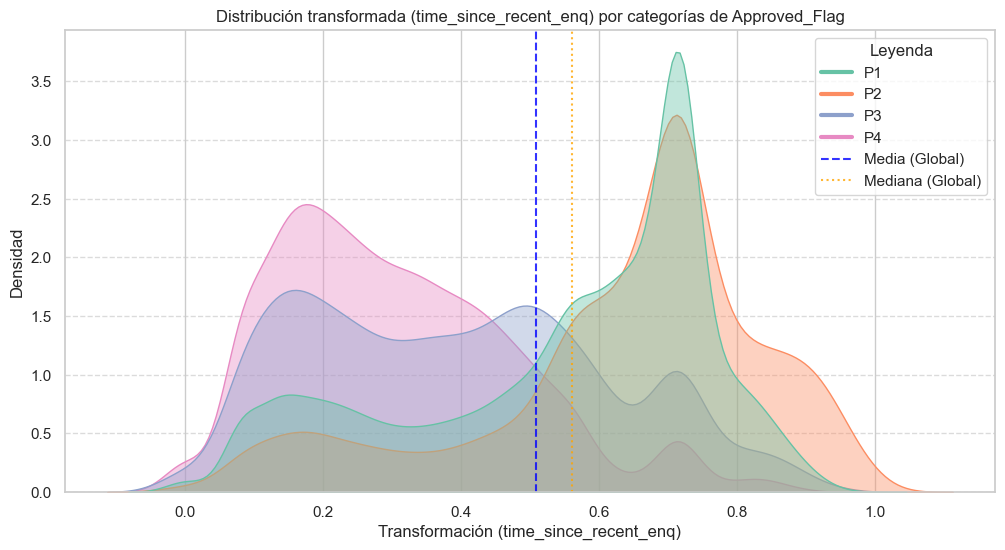

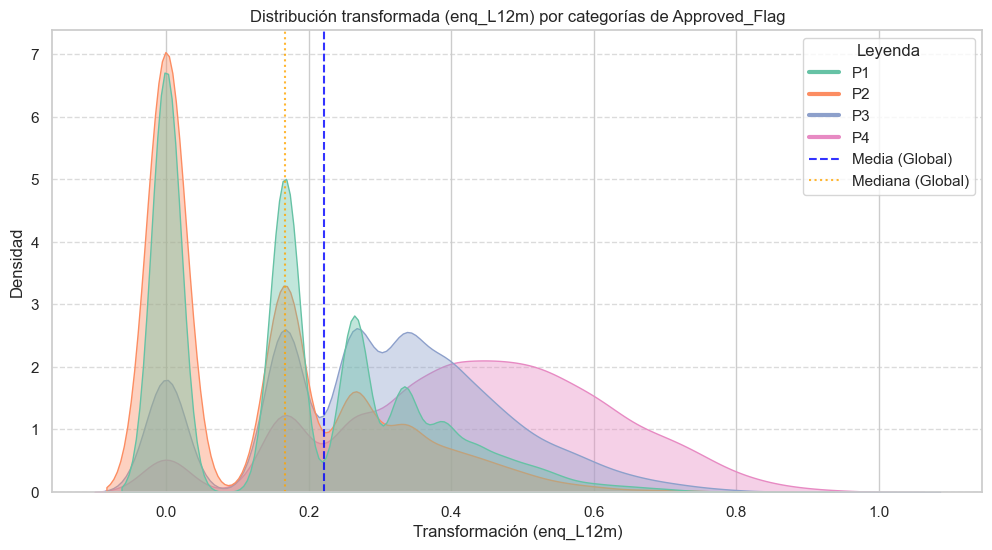

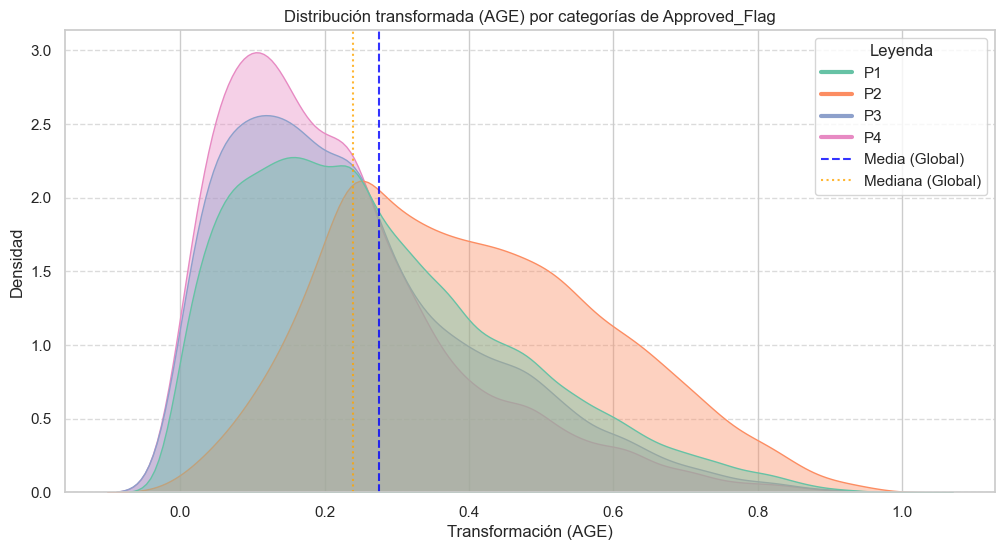

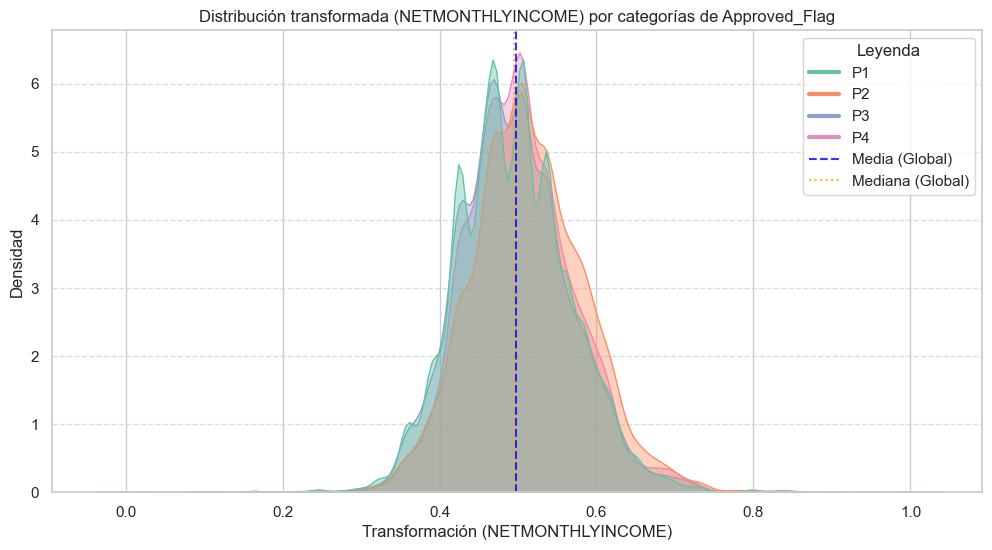

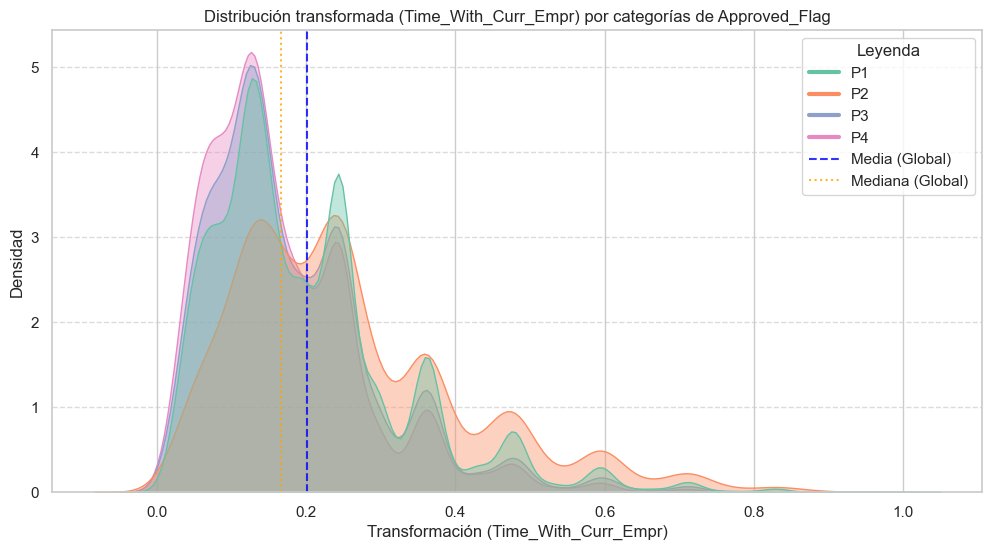

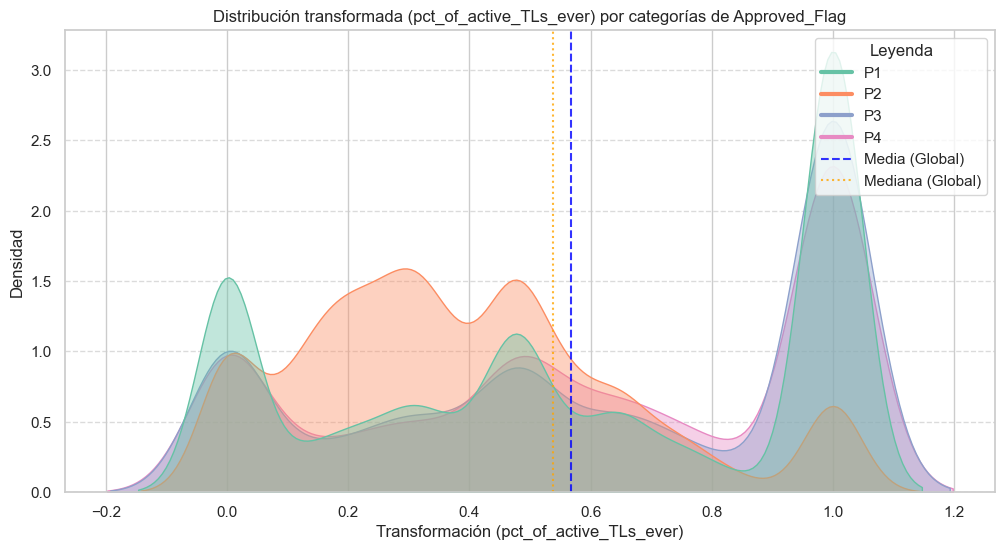

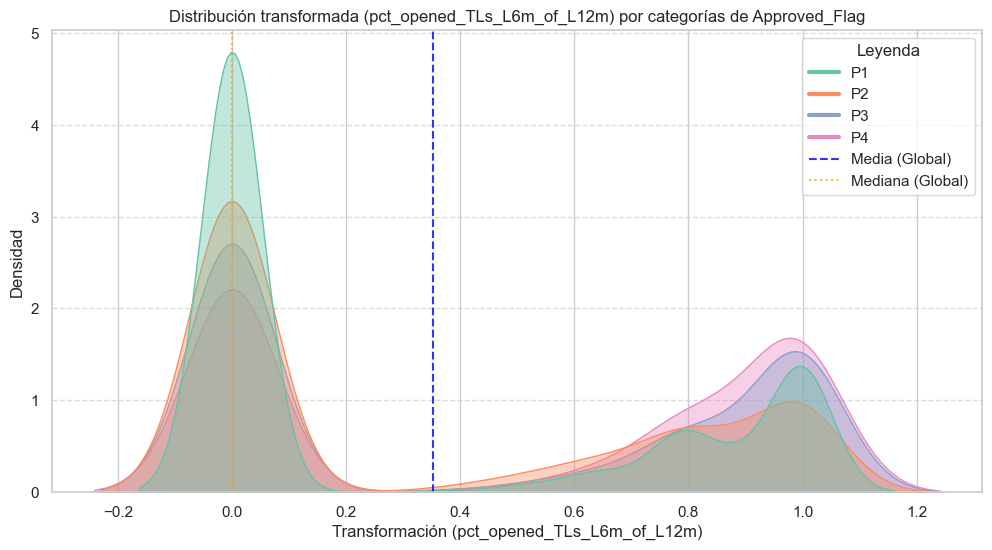

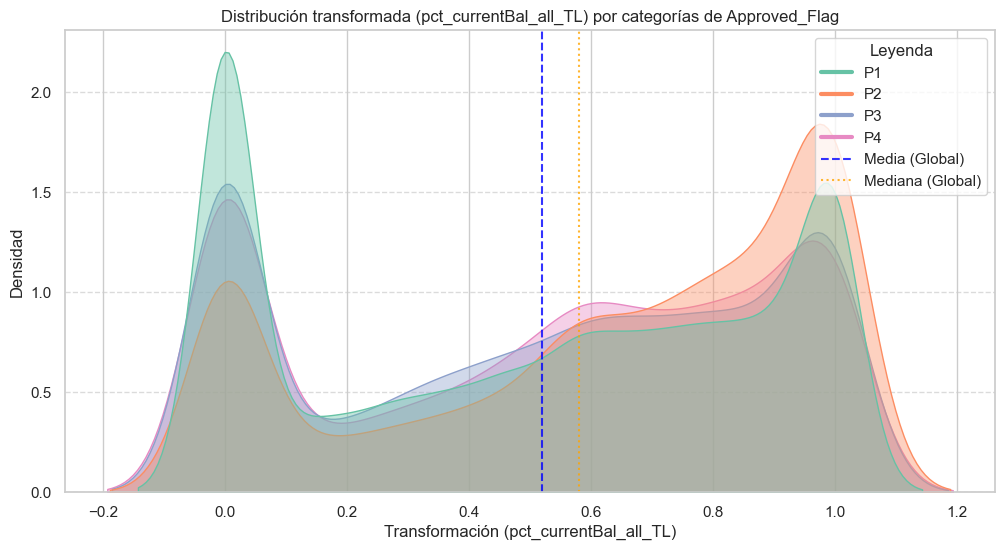

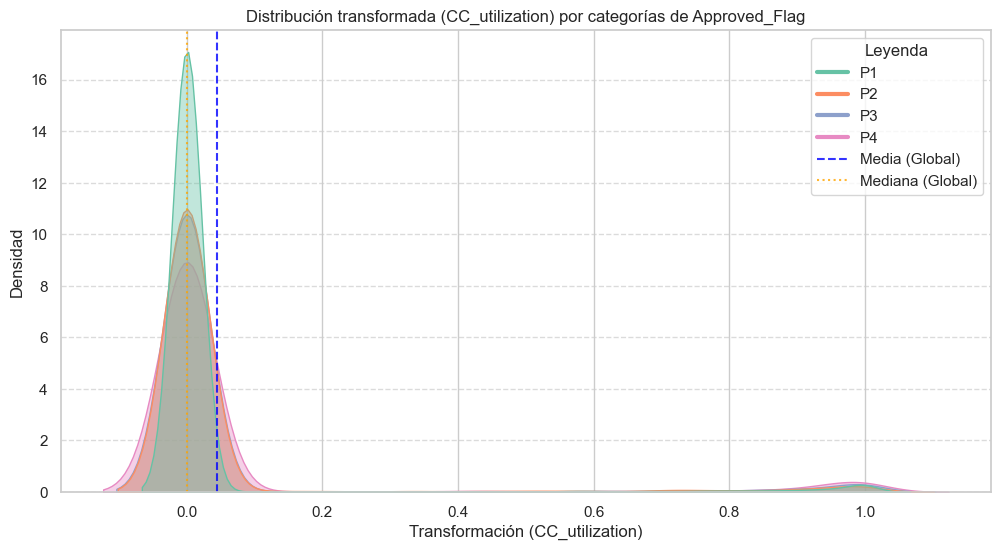

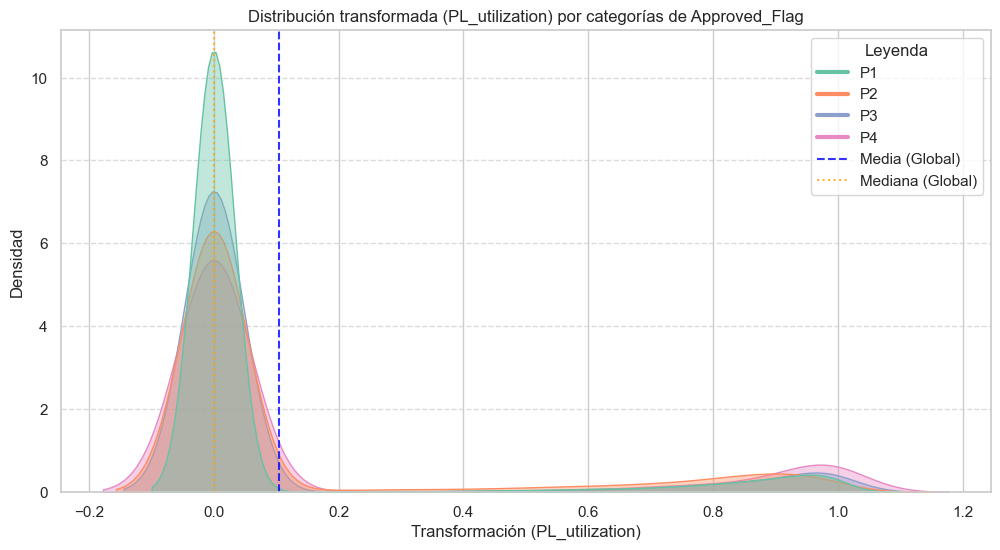

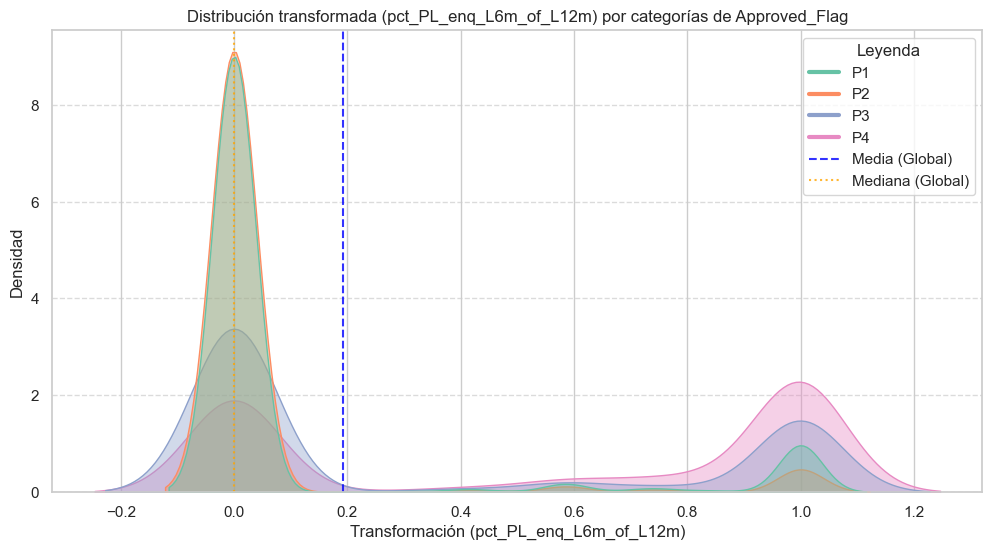

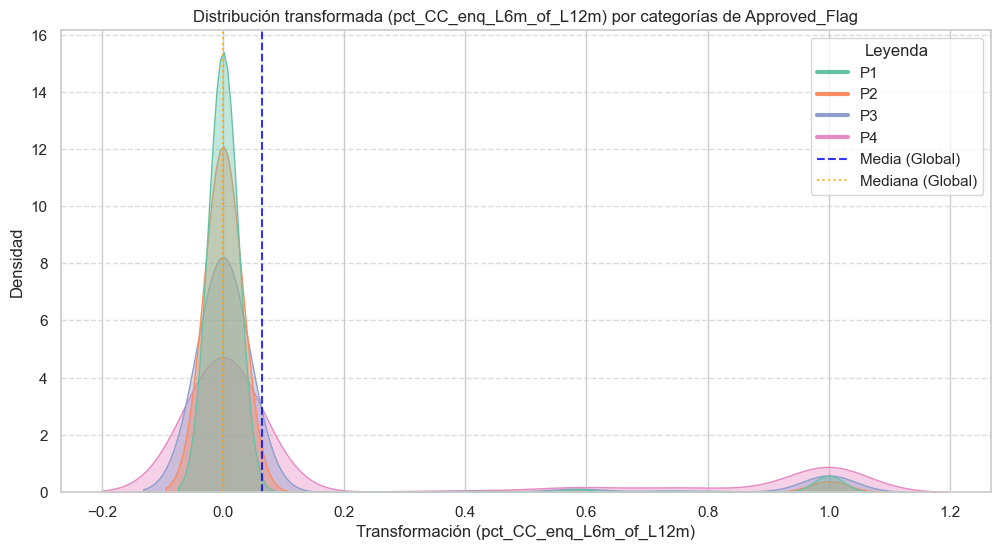

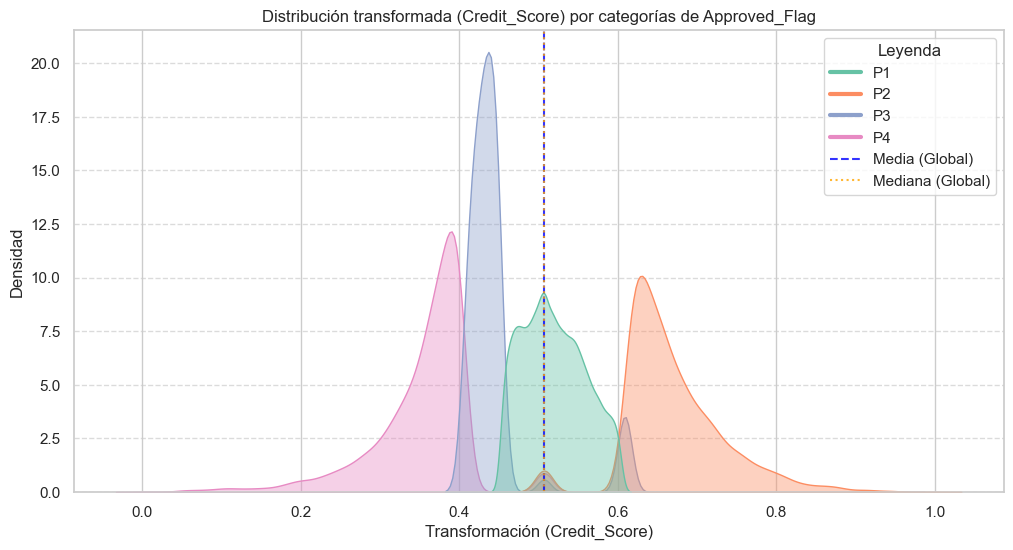

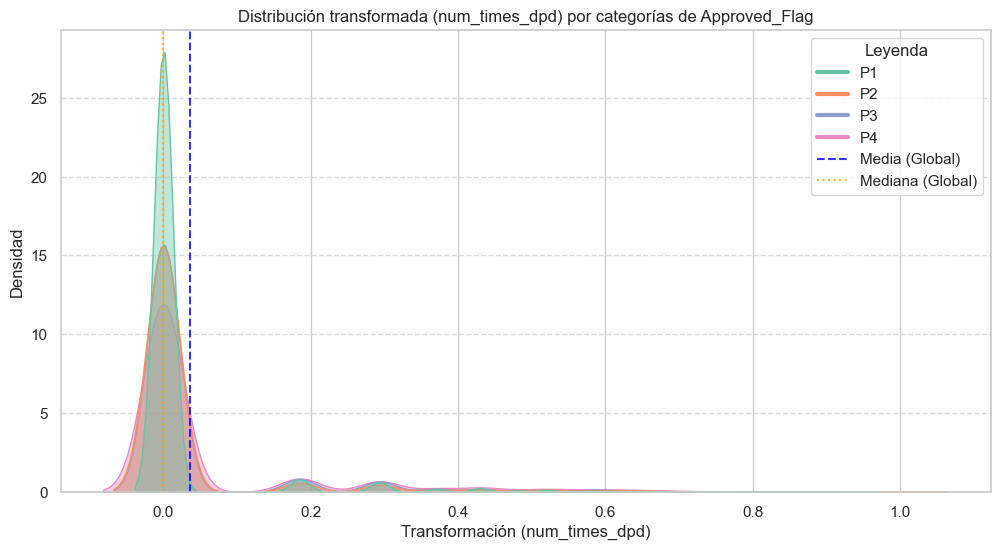

In [56]:
prueba2 = external.copy()

numeric_features = external.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID'])

Analyze_Numeric_Features_Density(prueba, numeric_features, 'Approved_Flag')

In [66]:
prueba.describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count  51336.000000               51336.000000          51336.000000   
mean   25668.500000                   0.434421              0.102358   
std    14819.571046                   0.154438              0.184675   
min        1.000000                   0.000000              0.000000   
25%    12834.750000                   0.335099              0.000000   
50%    25668.500000                   0.381361              0.000000   
75%    38502.250000                   0.506976              0.160544   
max    51336.000000                   1.000000              1.000000   

       max_recent_level_of_deliq  num_deliq_12mts  num_times_30p_dpd  \
count               51336.000000     51336.000000       51336.000000   
mean                    0.140514         0.057029           0.053243   
std                     0.231760         0.145241           0.142590   
min                     0.000000         0.000000           0.000000   
25%                     0.000000         0.000000           0.000000   
50%                     0.000000         0.000000           0.000000   
75%                     0.338441         0.000000           0.000000   
max                     1.000000         1.000000           1.000000   

       num_times_60p_dpd  num_std_12mts  num_sub_12mts  num_dbt_12mts  \
count       51336.000000   51336.000000   51336.000000   51336.000000   
mean            0.032724       0.139473       0.001233       0.000299   
std             0.115748       0.230206       0.025525       0.014005   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.000000       0.000000       0.000000   
50%             0.000000       0.000000       0.000000       0.000000   
75%             0.000000       0.293800       0.000000       0.000000   
max             1.000000       1.000000       1.000000       1.000000   

       num_lss_12mts  recent_level_of_deliq       tot_enq   CC_enq_L12m  \
count   51336.000000           51336.000000  51336.000000  51336.000000   
mean        0.000183               0.133147      0.188159      0.034884   
std         0.011046               0.221134      0.175188      0.113096   
min         0.000000               0.000000      0.000000      0.000000   
25%         0.000000               0.000000      0.000000      0.000000   
50%         0.000000               0.000000      0.172970      0.000000   
75%         0.000000               0.305643      0.312618      0.000000   
max         1.000000               1.000000      1.000000      1.000000   

        PL_enq_L12m  time_since_recent_enq      enq_L12m           AGE  \
count  51336.000000           51336.000000  51336.000000  51336.000000   
mean       0.086296               0.508417      0.221950      0.275721   
std        0.152449               0.234882      0.190545      0.189218   
min        0.000000               0.000000      0.000000      0.000000   
25%        0.000000               0.302891      0.000000      0.130435   
50%        0.000000               0.561345      0.166667      0.239130   
75%        0.200000               0.716497      0.333333      0.391304   
max        1.000000               1.000000      1.000000      1.000000   

       NETMONTHLYINCOME  Time_With_Curr_Empr  pct_of_active_TLs_ever  \
count      51336.000000         51336.000000            51336.000000   
mean           0.497514             0.200751                0.567846   
std            0.072930             0.131742                0.380202   
min            0.000000             0.000000                0.000000   
25%            0.453781             0.112621                0.230779   
50%            0.494993             0.166990                0.538047   
75%            0.536736             0.250485                1.000000   
max            1.000000             1.000000                1.000000   

       pct_opened_TLs_L6m_of_L12m  pct_currentBal_all_TL  CC_

In [73]:
external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PROSPECTID                          51336 non-null  int64  
 1   time_since_recent_payment           51336 non-null  int64  
 2   num_times_delinquent                51336 non-null  int64  
 3   max_recent_level_of_deliq           51336 non-null  int64  
 4   num_deliq_12mts                     51336 non-null  int64  
 5   num_times_30p_dpd                   51336 non-null  int64  
 6   num_times_60p_dpd                   51336 non-null  int64  
 7   num_std_12mts                       51336 non-null  int64  
 8   num_sub_12mts                       51336 non-null  int64  
 9   num_dbt_12mts                       51336 non-null  int64  
 10  num_lss_12mts                       51336 non-null  int64  
 11  recent_level_of_deliq               51336

In [46]:
# Selección de variables en el DataFrame external
variables_seleccionadas = [
     "num_times_dpd", "PL_utilization", "pct_PL_enq_L6m_of_L12m", "pct_CC_enq_L6m_of_L12m",
    "CC_utilization", "CC_enq_L12m", "num_lss_12mts", "num_dbt_12mts", "PL_utilization",
    "num_sub_12mts", "num_times_60p_dpd", "num_times_30p_dpd", "num_deliq_12mts"
]

df_seleccionado = prueba[variables_seleccionadas]


In [47]:
df_seleccionado.describe()

num_times_dpd  PL_utilization  pct_PL_enq_L6m_of_L12m  \
count   51336.000000    51336.000000            51336.000000   
mean        0.035868        0.104294                0.191524   
std         0.118468        0.281158                0.378232   
min         0.000000        0.000000                0.000000   
25%         0.000000        0.000000                0.000000   
50%         0.000000        0.000000                0.000000   
75%         0.000000        0.000000                0.000000   
max         1.000000        1.000000                1.000000   

       pct_CC_enq_L6m_of_L12m  CC_utilization   CC_enq_L12m  num_lss_12mts  \
count            51336.000000    51336.000000  51336.000000   51336.000000   
mean                 0.065172        0.044017      0.034854       0.000183   
std                  0.236537        0.190084      0.113029       0.011046   
min                  0.000000        0.000000      0.000000       0.000000   
25%                  0.000000        0.000000      0.000000       0.000000   
50%                  0.000000        0.000000      0.000000       0.000000   
75%                  0.000000        0.000000      0.000000       0.000000   
max                  1.000000        1.000000      1.000000       1.000000   

       num_dbt_12mts  PL_utilization  num_sub_12mts  num_times_60p_dpd  \
count   51336.000000    51336.000000   51336.000000       51336.000000   
mean        0.000299        0.104294       0.001233           0.032724   
std         0.014005        0.281158       0.025525           0.115748   
min         0.000000        0.000000       0.000000           0.000000   
25%         0.000000        0.000000       0.000000           0.000000   
50%         0.000000        0.000000       0.000000           0.000000   
75%         0.000000        0.000000       0.000000           0.000000   
max         1.000000        1.000000       1.000000           1.000000   

       num_times_30p_dpd  num_deliq_12mts  
count       51336.000000     51336.000000  
mean            0.053246         0.057035  
std             0.142590         0.145246  
min             0.000000         0.000000  
25%             0.000000         0.000000  
50%             0.000000         0.000000  
75%             0.000000         0.000000  
max             1.000000         1.000000

## 5. Cardinalidad y estandarización(nomralización)

Poner aquí la normalización que se ha realizado en el apartado de outliers. Especificar que no se ha realizado en el apartado in situ para poder tener una visión más real en los análisis visuales